In [15]:
import pandas as pd
import plotly as px
import numpy as np
import random
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [16]:
def calcola_media_annuale(df):
    return df['consumption'].mean()

In [17]:
def calcola_media_semestrale(df_final):
    periodi_semestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-12-31'))
    ]
    media_semestrale = []
    for start, end in periodi_semestrali:
        media = df_final.loc[start:end].mean()
        media_semestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_semestrale

In [18]:
def calcola_media_trimestrale(df):
    periodi_trimestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_trimestrale = []
    for start, end in periodi_trimestrali:
        media = df.loc[start:end].mean()
        media_trimestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_trimestrale

In [19]:
def calcola_media_mensile(df):
    periodi_mensili = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-01-31')),
        (pd.Timestamp('2019-02-01'), pd.Timestamp('2019-02-28')),
        (pd.Timestamp('2019-03-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-04-30')),
        (pd.Timestamp('2019-05-01'), pd.Timestamp('2019-05-31')),
        (pd.Timestamp('2019-06-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-07-31')),
        (pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31')),
        (pd.Timestamp('2019-09-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-10-31')),
        (pd.Timestamp('2019-11-01'), pd.Timestamp('2019-11-30')),
        (pd.Timestamp('2019-12-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_mensile = []
    for start, end in periodi_mensili:
        media = df.loc[start:end].mean()
        media_mensile.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_mensile

In [20]:
def read_fixture(fixture: str, rule='T'):
    #Legge CSV
    df = pd.read_csv(f'./data/feed_{fixture}.MYD.csv', delimiter=' ', header=None, names=['date', fixture])
    df['date'] = pd.to_datetime(df['date'], unit='s')
    
    # Rinomina la colonna fixture in 'consumption'
    df.rename(columns={fixture: 'consumption'}, inplace=True)
    df.set_index('date', inplace=True)
    
    # Resample il DataFrame usando la frequenza specificata (minutale 'T')
    df_minutely = df.resample(rule).sum()
    
    # Ora raggruppiamo i dati minutali in giornate
    df_daily = df_minutely.resample('D').sum()

    # Creare un DataFrame vuoto con il range di date specificato
    date_rng = pd.date_range(start='2019-01-01', end='2019-12-31' , freq='D')
    df_final = pd.DataFrame(date_rng, columns=['date'])
    df_final.set_index('date', inplace=True)
    
    # Unire il DataFrame giornaliero con il DataFrame vuoto per assicurarsi che tutte le date siano presenti
    df_final = df_final.join(df_daily, how='left').fillna(0)
    
    return df_final

In [21]:
#CONTROLLO RICORRENZE DEI PATTERN

diz={'0': 125, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 1, 'CHMHLH4_S0': 1, 'CGMHLF3MPP_S0': 1, 'CHMHLG2LM_S0': 1, 'CHMHLH8_S2c': 1, 'CFMHLE5_S1a': 1, 'CHMHLH9_S2a': 2, 'CGMHLE5_S0': 1, 'CFMGLD3MPP_S2f': 1, 'CHMHLG5_S1a': 1, 'CHMHLH8_M1c': 1, 'CGMHLE3LMP_S0': 1, 'CHMHLH6_M1d': 1, 'CEMHLE4_S2a': 1, 'CDMGLD5_S1f': 1, 'CFMHLF5_S2a': 2, 'CFMHLF2MP_S0': 1, 'CDMGLD3PPL_S0': 1, 'CCMDLC3MMP_S2a': 1, 'CCMDLC1M_S0': 1, 'CDMFLC3PPL_P1c': 1, 'CFMHLF7_S2f': 1, 'CAMBLA2PP_P1a': 1, 'CEMGLD3MPP_S2f': 1, 'CDMFLC5_S1f': 1, 'CEMHLE8_S2f': 1, 'CDMGLD3PPM_S0': 1, 'CAMALA1M_S0': 3, 'CDMGLD4_S0': 2, 'CDMGLD3LPP_S0': 1, 'CDMGLD13_M1d': 1, 'CEMHLE3PLM_S0': 1, 'CHMHLH8_S1a': 1, 'CDMFLD2MP_S0': 1, 'CHMHLH8_S2a': 1, 'CCMDLC2MM_S0': 1, 'CFMHLE8_S0': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC2PP_S0': 1, 'CCMDLC2LP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CBMBLC2PL_P1a': 1, 'CCMCLD1M_S0': 1, 'CDMCLE3MMM_S0': 1, 'CEMELF7_S2d': 1, 'CDMCLD5_S1f': 2, 'CFMELH2MM_S0': 1, 'CBMBLB7_S1a': 1, 'CCMBLC3MMM_S2f': 1, 'CBMBLC2MP_S0': 2, 'CEMELG6_S0': 1, 'CFMELH5_S0': 1, 'CAMALA2PP_S0': 5, 'CEMDLF5_S2a': 1, 'CDMDLE7_S2c': 2, 'CEMELF5_M1f': 1, 'CHMHLH3PMP_S2f': 1, 'CBMALB5_M1c': 1, 'CDMDLE7_S2f': 1, 'CFMFLH6_S0': 1, 'CHMHLH9_M1b': 1, 'CHMGLH7_S2c': 1, 'CCMCLD7_S2c': 1, 'CCMCLD2MM_P1f': 1, 'CHMHLH6_S1a': 1, 'CCMBLC4_S0': 1, 'CDMCLD4_M1c': 1, 'CFMDLF6_S2f': 1, 'CCMBLC2PL_S0': 1, 'CDMCLE6_S2a': 1, 'CDMCLD3MPM_S0': 1, 'CEMDLE4_S2a': 1, 'CCMCLD4_S2a': 1, 'CCMCLD2MP_P1f': 1, 'CAMALA3PPP_S2a': 1, 'CDMCLE5_S1f': 1, 'CEMDLF4_S2f': 1, 'CDMCLD1L_S0': 1, 'CDMCLD4_S2f': 1, 'CHMHLH6_S2c': 2, 'CCMCLD9_S2c': 1, 'CBMBLB2PP_S0': 1, 'CGMFLH5_S1a': 1, 'CFMELG4_M1f': 1, 'CGMELG4_S2f': 1, 'CFMELG4_S2f': 1, 'CAMALA4_S2a': 2, 'CDMCLE1M_S0': 1, 'CHMFLH5_M1d': 1, 'CDMELG7_S1f': 1, 'CDMFLH7_M1b': 1, 'CDMFLH8_S1a': 1, 'CBMCLD4_S2a': 1, 'CCMDLF4_S2a': 1, 'CCMDLF9_S2c': 1, 'CBMCLD7_S1f': 1, 'CBMCLD8_S1a': 1, 'CFMHLH12_S2c': 1, 'CBMBLB4_S2f': 1, 'CEMFLH9_S2c': 1, 'CEMGLH8_M1c': 1, 'CHMHLH10_M1b': 1, 'CBMCLD7_S1a': 1, 'CCMDLF7_M1b': 1, 'CCMDLE4_S0': 1, 'CHMHLH11_M2d': 1, 'CBMBLC3MMM_P1c': 1, 'CEMFLH16_M1d': 1, 'CEMFLH11_S2c': 1, 'CBMCLD5_S1f': 1, 'CCMDLF2LM_S0': 1, 'CEMGLH11_S2d': 1, 'CCMCLE11_M2c': 1, 'CAMALA5_M1d': 1, 'CAMALA4_S0': 1, 'CDMELG8_S2a': 1, 'CEMELF1L_S0': 1, 'CAMBLB3MPP_S2a': 1, 'CEMFLG9_S1c': 1, 'CCMCLD2LM_S0': 1, 'CAMALA2MP_S0': 1, 'CHMHLH11_M1a': 1, 'CDMELF7_S1a': 1, 'CFMGLH4_S2a': 1, 'CDMDLE3PLP_S0': 1, 'CGMHLH13_S2d': 1, 'CCMDLD4_S2f': 1, 'CHMHLH11_S2a': 1, 'CEMELF2MP_P1f': 1, 'CDMDLE4_S2a': 1, 'CHMHLH10_S2c': 1, 'CCMCLD4_S2f': 1, 'CCMCLD8_S2c': 1, 'CCMDLD4_M1a': 1, 'CDMELF7_M1d': 1, 'CDMELF4_M1f': 1, 'CDMDLE5_S2c': 1, 'CAMALA5_S2a': 1, 'CCMDLD4_M1c': 1, 'CEMFLG6_S0': 1, 'CEMELF9_S1f': 1, 'CDMDLE7_M1b': 1, 'CFMGLH10_S1c': 1, 'CDMELF2PM_P1f': 1, 'CHMDLE6_M1d': 1, 'CHMHLH16_M1c': 1, 'CDMBLC5_S0': 1, 'CDMBLC1M_S0': 1, 'CCMBLB1P_S0': 1, 'CGMDLE4_S2f': 1, 'CDMBLC3PLP_S2a': 1, 'CFMDLD6_S2a': 1, 'CFMDLD10_M1e': 1, 'CCMBLB2PM_P1a': 1, 'CEMCLC4_P1c': 1, 'CHMFLH3LPP_P1c': 1, 'CDMBLB1M_S0': 1, 'CHMHLH2MP_S0': 1, 'CAMALA2MP_P1a': 1, 'CEMCLD4_S2a': 1, 'CHMHLH6_S2a': 1, 'CDMELF3MPM_S0': 1, 'CBMCLD5_S0': 1, 'CEMGLH10_S2b': 1, 'CDMELF5_S1a': 1, 'CBMCLC4_S2f': 1, 'CCMCLD3PPM_P1a': 1, 'CCMDLE2MM_S0': 1, 'CGMHLH4_S2f': 1, 'CBMCLC2PP_P1a': 1, 'CCMDLE5_S2c': 1, 'CGMHLH7_S2c': 1, 'CAMBLB3PPP_S0': 1, 'CCMCLD2MP_P1a': 1, 'CGMHLH10_M1d': 1, 'CEMGLH11_M1d': 1, 'CEMGLH6_M1a': 1, 'CDMELF2MM_S0': 1, 'CGMHLH8_S2a': 1, 'CCMDLE3PMP_S2f': 1, 'CHMHLH7_S1f': 2, 'CHMHLH8_S2f': 1, 'CFMHLH4_S2f': 1, 'CCMDLE6_S1a': 1, 'CHMHLH5_S0': 1, 'CGMHLH9_S1c': 1, 'CGMHLH8_M1a': 1, 'CEMFLH8_S2c': 1, 'CEMHLH4_S0': 1, 'CAMALA3MMP_P1c': 1, 'CBMELD2MM_S0': 1, 'CGMHLH6_M1c': 1, 'CDMHLH8_S1a': 1, 'CHMHLH4_S2a': 1, 'CBMFLE5_S0': 1, 'CHMHLH6_S1f': 1, 'CEMHLH3MPM_S2f': 1, 'CBMFLE3MPP_S2f': 1, 'CHMHLH10_S2d': 1, 'CHMHLH9_S1a': 1, 'CHMHLH5_S1a': 1, 'CCMHLG5_S1f': 1, 'CCMGLE3MPP_S0': 1, 'CCMHLG4_S0': 1, 'CCMHLG5_M1d': 1, 'CHMHLH8_M1d': 1, 'CAMCLC2PP_S0': 1, 'CBMDLC2PP_S0': 1, 'CEMHLH6_S0': 2, 'CBMFLE3LPP_S2f': 1, 'CCMHLG3LMP_S0': 1, 'CDMHLH4_S0': 1, 'CGMHLH6_S1a': 1, 'CFMHLH10_M1a': 1}

new_diz={}
for key,value in diz.items():
    if value in new_diz:#se lo trova 
        new_diz[value].append(key)
    else:
        new_diz[value]=[]
        new_diz[value].append(key)

for key,value in new_diz.items():
    print(f'{key}:\t{new_diz[key]}\n')


125:	['0']

2:	['CAMALA1P_S0', 'CHMHLH9_S2a', 'CFMHLF5_S2a', 'CDMGLD4_S0', 'CDMCLD5_S1f', 'CBMBLC2MP_S0', 'CDMDLE7_S2c', 'CHMHLH6_S2c', 'CAMALA4_S2a', 'CHMHLH7_S1f', 'CEMHLH6_S0']

1:	['CCMDLB3PMM_S2f', 'CHMHLH4_S0', 'CGMHLF3MPP_S0', 'CHMHLG2LM_S0', 'CHMHLH8_S2c', 'CFMHLE5_S1a', 'CGMHLE5_S0', 'CFMGLD3MPP_S2f', 'CHMHLG5_S1a', 'CHMHLH8_M1c', 'CGMHLE3LMP_S0', 'CHMHLH6_M1d', 'CEMHLE4_S2a', 'CDMGLD5_S1f', 'CFMHLF2MP_S0', 'CDMGLD3PPL_S0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', 'CDMFLC3PPL_P1c', 'CFMHLF7_S2f', 'CAMBLA2PP_P1a', 'CEMGLD3MPP_S2f', 'CDMFLC5_S1f', 'CEMHLE8_S2f', 'CDMGLD3PPM_S0', 'CDMGLD3LPP_S0', 'CDMGLD13_M1d', 'CEMHLE3PLM_S0', 'CHMHLH8_S1a', 'CDMFLD2MP_S0', 'CHMHLH8_S2a', 'CCMDLC2MM_S0', 'CFMHLE8_S0', 'CCMDLC2MP_S0', 'CCMDLC2PP_S0', 'CCMDLC2LP_S0', 'CHMHLH3MPP_S0', 'CBMBLC2PL_P1a', 'CCMCLD1M_S0', 'CDMCLE3MMM_S0', 'CEMELF7_S2d', 'CFMELH2MM_S0', 'CBMBLB7_S1a', 'CCMBLC3MMM_S2f', 'CEMELG6_S0', 'CFMELH5_S0', 'CEMDLF5_S2a', 'CEMELF5_M1f', 'CHMHLH3PMP_S2f', 'CBMALB5_M1c', 'CDMDLE7_S2f', 'CFMF

In [22]:
#TRASFORMA GLI ARRAY DI PATTERN IN ARRAY DA POTER USARE SU MATLAB PER GENERARE NUOVE SETTIMANE
# Inversione del dizionario diz_inverted = {v: k for k, v in diz_patterns.items()}
array_periodo=[
    ['0', '0', 'CAMALA1P_S0', '0', '0', 'CCMDLB3PMM_S2f', 'CHMHLH4_S0','CGMHLF3MPP_S0', 'CHMHLG2LM_S0', 'CHMHLH8_S2c', 'CFMHLE5_S1a', 'CHMHLH9_S2a', 'CGMHLE5_S0', 'CFMGLD3MPP_S2f','CHMHLG5_S1a', 'CHMHLH8_M1c', 'CGMHLE3LMP_S0', 'CHMHLH6_M1d', 'CEMHLE4_S2a', 'CDMGLD5_S1f', 'CFMHLF5_S2a','CFMHLF2MP_S0', 'CDMGLD3PPL_S0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', '0', '0', 'CDMFLC3PPL_P1c']

    ,['CFMHLF7_S2f', 'CAMBLA2PP_P1a', 'CEMGLD3MPP_S2f', 'CDMFLC5_S1f', 'CEMHLE8_S2f', 'CFMHLF5_S2a', 'CDMGLD3PPM_S0','CAMALA1M_S0', 'CDMGLD4_S0', 'CDMGLD4_S0', 'CDMGLD3LPP_S0', 'CDMGLD13_M1d', 'CEMHLE3PLM_S0', 'CHMHLH8_S1a','CDMFLD2MP_S0', 'CHMHLH8_S2a', 'CCMDLC2MM_S0', 'CFMHLE8_S0', 'CCMDLC2MP_S0', 'CCMDLC2PP_S0', 'CCMDLC2LP_S0','CHMHLH3MPP_S0', 'CBMBLC2PL_P1a', 'CCMCLD1M_S0', 'CDMCLE3MMM_S0', 'CEMELF7_S2d', 'CDMCLD5_S1f', 'CFMELH2MM_S0']

    ,['0', 'CBMBLB7_S1a', 'CCMBLC3MMM_S2f', 'CBMBLC2MP_S0', 'CEMELG6_S0', 'CFMELH5_S0', 'CAMALA2PP_S0','CEMDLF5_S2a', 'CDMDLE7_S2c', 'CEMELF5_M1f', 'CHMHLH3PMP_S2f', 'CBMALB5_M1c', 'CDMDLE7_S2f', 'CAMALA2PP_S0','CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c','CCMCLD2MM_P1f', 'CAMALA2PP_S0', 'CHMHLH6_S1a', 'CCMBLC4_S0', 'CDMCLD4_M1c', 'CFMDLF6_S2f', 'CCMBLC2PL_S0']

    ,['CDMCLE6_S2a', 'CDMCLD3MPM_S0', 'CEMDLE4_S2a', 'CCMCLD4_S2a', 'CCMCLD2MP_P1f', '0', '0','CAMALA3PPP_S2a', 'CDMCLE5_S1f', 'CEMDLF4_S2f', 'CDMCLD1L_S0', 'CDMCLD4_S2f', 'CHMHLH6_S2c', 'CCMCLD9_S2c','CBMBLB2PP_S0', 'CGMFLH5_S1a', 'CFMELG4_M1f', 'CGMELG4_S2f', 'CDMCLD5_S1f', 'CFMELG4_S2f', '0','CAMALA4_S2a', 'CDMCLE1M_S0', 'CBMBLC2MP_S0', 'CHMFLH5_M1d', '0', 'CAMALA1P_S0', 'CDMELG7_S1f']

    ,['CDMFLH7_M1b', 'CDMFLH8_S1a', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CBMCLD8_S1a','CFMHLH12_S2c', 'CBMBLB4_S2f', 'CEMFLH9_S2c', 'CEMGLH8_M1c', 'CHMHLH6_S2c', 'CHMHLH10_M1b', 'CBMCLD7_S1a','CCMDLF7_M1b', 'CCMDLE4_S0', 'CHMHLH11_M2d', 'CBMBLC3MMM_P1c', 'CEMFLH16_M1d', 'CEMFLH11_S2c', 'CBMCLD5_S1f','CCMDLF2LM_S0', 'CEMGLH11_S2d', 'CCMCLE11_M2c', 'CAMALA5_M1d', '0', 'CAMALA4_S0', 'CDMELG8_S2a']

    ,['CEMELF1L_S0', 'CAMBLB3MPP_S2a', 'CEMFLG9_S1c', 'CCMCLD2LM_S0', 'CAMALA2MP_S0', 'CHMHLH11_M1a', 'CDMELF7_S1a','CFMGLH4_S2a', 'CDMDLE3PLP_S0', 'CGMHLH13_S2d', 'CCMDLD4_S2f', 'CHMHLH11_S2a', 'CEMELF2MP_P1f', 'CHMHLH9_S2a','CDMDLE4_S2a', 'CHMHLH10_S2c', 'CCMCLD4_S2f', 'CCMCLD8_S2c', 'CAMALA2PP_S0', '0', 'CCMDLD4_M1a','CDMELF7_M1d', 'CDMELF4_M1f', 'CDMDLE5_S2c', 'CAMALA5_S2a', 'CCMDLD4_M1c', 'CEMFLG6_S0', 'CEMELF9_S1f']

    ,['CDMDLE7_M1b', 'CFMGLH10_S1c', 'CDMELF2PM_P1f', '0', '0', '0', 'CHMDLE6_M1d','CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0','0', 'CDMBLC3PLP_S2a', '0', 'CFMDLD6_S2a', 'CFMDLD10_M1e', 'CCMBLB2PM_P1a', 'CEMCLC4_P1c','CHMFLH3LPP_P1c', '0', '0', 'CDMBLB1M_S0', '0', '0', 'CHMHLH2MP_S0']

    ,['0', '0', '0', 'CAMALA2MP_P1a', 'CEMCLD4_S2a', 'CHMHLH6_S2a', 'CAMALA4_S2a','CDMELF3MPM_S0', 'CBMCLD5_S0', 'CEMGLH10_S2b', 'CDMELF5_S1a', 'CBMCLC4_S2f', 'CCMCLD3PPM_P1a', 'CAMALA2PP_S0','CCMDLE2MM_S0', 'CGMHLH4_S2f', 'CBMCLC2PP_P1a', '0', 'CCMDLE5_S2c', 'CGMHLH7_S2c', 'CAMBLB3PPP_S0','CCMCLD2MP_P1a', 'CGMHLH10_M1d', 'CEMGLH11_M1d', 'CEMGLH6_M1a', 'CDMELF2MM_S0', 'CGMHLH8_S2a', 'CCMDLE3PMP_S2f']

    ,['CHMHLH7_S1f', 'CHMHLH8_S2f', 'CFMHLH4_S2f', 'CCMDLE6_S1a', 'CHMHLH5_S0', 'CGMHLH9_S1c', 'CGMHLH8_M1a','CEMFLH8_S2c', 'CEMHLH4_S0', 'CAMALA3MMP_P1c', 'CBMELD2MM_S0', 'CGMHLH6_M1c', 'CDMHLH8_S1a', 'CHMHLH4_S2a','CBMFLE5_S0', 'CHMHLH6_S1f', 'CEMHLH3MPM_S2f', 'CHMHLH7_S1f', 'CBMFLE3MPP_S2f', 'CHMHLH10_S2d', 'CHMHLH9_S1a','CHMHLH5_S1a', 'CCMHLG5_S1f', 'CCMGLE3MPP_S0', 'CCMHLG4_S0', 'CCMHLG5_M1d', 'CHMHLH8_M1d', 'CAMCLC2PP_S0']

    ,['CBMDLC2PP_S0', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CCMHLG3LMP_S0', 'CDMHLH4_S0', 'CEMHLH6_S0', 'CGMHLH6_S1a','CFMHLH10_M1a', '0', '0', '0', '0', '0', '0']
]

diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
array_new=[]
array_stati=[]
# 0 emissioni == stato 1%
# >0 emissioni == stato 2%
for array in array_periodo:
    array_newtemp=[]
    array_statitemp=[]
    for elem in array:
        if elem not in diz_pattern:
            print("errore")
            break
        else:
            array_newtemp.append(diz_pattern[elem])
            if elem=='0':
                array_statitemp.append(1)
            else:
                array_statitemp.append(2)
    array_new.append(array_newtemp)
    array_stati.append(array_statitemp)
print(array_new)
print(array_stati)

#[[1, 1, 2, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 1, 23], [24, 25, 26, 27, 28, 18, 29, 30, 31, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [1, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 55, 62, 63, 30, 30, 57, 64, 65, 66, 55, 67, 68, 69, 70, 71], [72, 73, 74, 75, 76, 1, 1, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 48, 88, 1, 89, 90, 52, 91, 1, 2, 92], [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 82, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 1, 117, 118], [119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143], [144, 145, 146, 1, 1, 1, 147, 148, 149, 150, 151, 152, 1, 1, 1, 153, 1, 154, 155, 156, 157, 158, 1, 1, 159, 1, 1, 160], [1, 1, 1, 161, 162, 163, 89, 164, 165, 166, 167, 168, 169, 55, 170, 171, 172, 1, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], [183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 183, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209], [210, 211, 212, 213, 214, 211, 215, 216, 1, 1, 1, 1, 1, 1]]
#stati[[1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]]


[[1, 1, 2, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 1, 23], [24, 25, 26, 27, 28, 18, 29, 30, 31, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [1, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 55, 62, 63, 30, 30, 57, 64, 65, 66, 55, 67, 68, 69, 70, 71], [72, 73, 74, 75, 76, 1, 1, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 48, 88, 1, 89, 90, 52, 91, 1, 2, 92], [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 82, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 1, 117, 118], [119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143], [144, 145, 146, 1, 1, 1, 147, 148, 149, 150, 151, 152, 1, 1, 1, 153, 1, 154, 155, 156, 157, 158, 1, 1, 159, 1, 1, 160], [1, 1, 1, 161, 162, 163, 89, 164, 165, 166, 167, 168, 169, 55, 170, 171, 172, 1, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], [183, 184, 185, 186, 187, 188, 189, 190, 1

In [23]:
#STESSA COSA DEL CODICE SOPRA MA CON LE DOCCIA
array_periodo=[

    ['0', '0', 'CCMALA1P_S0', '0', '0', '0', '0','0', '0', '0', '0', '0', 'CCMALA2PM_S0', '0','CAMALA1P_S0', 'CAMALA3PPP_S0', 'CHMHLG1P_S0', 'CAMALA4_M1f', 'CAMALA5_S1a', 'CHMHLH2MP_P1a', 'CAMALA2PP_S0','CAMALA3PPP_S0', '0', 'CHMHLH6_S1a', '0', '0', '0', 'CHMHLH1M_S0']

    ,['0', '0', 'CHMHLH1M_S0', '0', '0', '0', '0','0', 'CEMHLF1P_S0', 'CHMHLH1M_S0', '0', 'CAMALA6_S1f', '0', 'CHMHLH3PPM_S0','CAMALA2PP_S0', '0', 'CHMHLH1P_S0', '0', '0', '0', '0','CHMGLH1P_S0', '0', 'CHMHLH1M_S0', '0', 'CHMHLH2PM_S0', '0', 'CHMHLH1M_S0']

    ,['0', 'CHMHLH2PP_S0', '0', '0', 'CAMALA3PPP_S0', 'CAMALA2PP_S0', '0','CHMFLH1P_S0', '0', 'CFMDLG1M_S0', 'CHMHLH1P_S0', 'CHMHLH2PP_P1f', '0', '0','0', 'CHMHLH3PMP_S0', 'CAMALA1P_S0', '0', 'CHMFLH2PP_S0', 'CAMALA3PPP_S0', 'CGMELH1M_S0','0', '0', 'CHMHLH1M_S0', '0', '0', 'CGMFLH1P_S0', '0']

    ,['0', '0', '0', 'CHMHLH1M_S0', '0', '0', '0','CAMALA1P_S0', 'CHMGLH1M_S0', 'CHMHLH3MPP_S2a', '0', '0', 'CGMFLH1P_S0', '0','CCMBLC2MP_S0', 'CHMFLH1P_S0', 'CHMHLH1P_S0', 'CHMHLH2PP_S0', '0', '0', '0','CAMALA1P_S0', 'CHMGLH1M_S0', '0', 'CHMHLH1P_S0', 'CAMALA1P_S0', 'CAMALA6_S1f', 'CGMHLH1P_S0']

    ,['CDMFLH1M_S0', 'CCMDLF1M_S0', 'CHMHLH1M_S0', 'CGMHLH2PP_S0', 'CFMHLH2PP_S0', 'CFMHLH1P_S0', 'CFMHLH1P_S0','CEMHLH2PP_S0', 'CDMFLH1P_S0', 'CFMHLH2MM_S0', 'CEMGLH1M_S0', 'CHMHLH2MP_S0', 'CHMHLH3PMM_S2a', 'CAMBLC1M_S0','0', 'CAMALB3PPP_S0', 'CDMFLH2PP_S0', 'CBMCLD1P_S0', 'CBMCLE1P_S0', 'CBMDLE1P_S0', 'CCMDLF1P_S0','CEMHLH2MP_S0', 'CHMHLH6_S0', 'CAMALA2PP_P1a', 'CDMELH1P_S0', '0', 'CAMALA1P_S0', 'CDMFLH4_S2a']

    ,['CDMDLE1P_S0', '0', 'CHMHLH1M_S0', 'CDMELF1M_S0', '0', 'CHMHLH3PMP_S0', 'CBMBLB1P_S0','CHMHLH2PP_S0', 'CBMCLC1P_S0', 'CHMHLH5_S1a', '0', 'CHMHLH4_S0', '0', 'CHMHLH2PM_S0','CAMALA2PP_S0', 'CFMGLH2PP_S0', 'CBMCLC1P_S0', 'CBMBLC1M_S0', '0', '0', 'CCMCLD3PMP_S2a','CEMFLH3PMP_S2f', 'CFMGLH2PP_S0', 'CCMDLD1P_S0', 'CAMBLB6_S2c', 'CAMALB1M_S0', '0', '0']

    ,['CDMFLG2PP_P1a', 'CHMHLH3MPP_S2a', 'CDMFLG1P_S0', '0', '0', '0', 'CHMHLH1M_S0','CHMFLH2MP_P1f', '0', '0', 'CAMALA1P_S0', '0', '0', '0','0', 'CHMHLH1M_S0', 'CAMALA6_S0', 'CHMGLH2PM_S0', 'CHMHLH4_S2f', '0', 'CAMALA1P_S0','CHMFLG1P_S0', '0', '0', 'CHMHLH1P_S0', '0', '0', '0']

    ,['0', '0', '0', '0', 'CHMELF2PM_S0', 'CHMDLE1M_S0', 'CAMALA2PP_S0','CDMDLE1P_S0', 'CCMDLE2MP_S0', '0', 'CEMFLH1P_S0', 'CEMFLH1P_S0', 'CGMHLH2PM_S0', 'CAMALA1P_S0','CCMDLE2PP_S0', 'CHMHLH2PM_S0', '0', '0', 'CAMALA3PPP_S0', 'CBMCLC3PPP_S2a', '0','CGMHLH1M_S0', 'CAMALA2PP_P1a', 'CHMHLH6_S2c', 'CCMCLD1P_S0', 'CAMALA2PP_P1a', 'CFMHLH4_S0', 'CGMHLH1P_S0']

    ,['CDMELG2PP_S0', 'CFMGLH1P_S0', 'CFMGLH1P_S0', 'CGMHLH1M_S0', 'CDMDLE3PPP_S0', 'CCMCLD1P_S0', 'CHMHLH2MP_P1f','CCMDLE1P_S0', 'CDMHLH1P_S0', '0', 'CHMHLH1M_S0', 'CBMELD1P_S0', 'CCMFLE1P_S0', 'CEMHLH2MP_P1f','CAMALA4_S0', 'CHMHLH2PP_S0', 'CGMHLH3MPM_S2f', 'CCMFLE1P_S0', 'CFMHLH1M_S0', 'CCMHLF1M_S0', 'CHMHLH2MP_S0','CCMHLF4_S0', 'CGMHLH2PP_S0', 'CCMGLE2PP_S0', 'CHMHLH2MP_S0', 'CDMHLG1P_S0', 'CHMHLH4_S0', '0']

    ,['CAMALA1P_S0', 'CDMHLH2MP_S0', '0', 'CGMHLH1M_S0', 'CEMHLH1M_S0', 'CEMHLH3PPM_S0', 'CGMHLH3MMP_S0','CHMHLH3MPP_S0', '0', '0', '0', '0', '0', '0']
        
]


diz_pattern={'0': 1, 'CAMALA4_M1f': 7, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 51, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 4, 'CAMALA4_S0': 94, 'CAMALA6_S0': 70, 'CAMALA5_S1a': 8, 'CAMALA6_S1f': 14, 'CAMALB1M_S0': 66, 'CAMALB3PPP_S0': 43, 'CAMBLB6_S2c': 65, 'CAMBLC1M_S0': 42, 'CBMBLB1P_S0': 56, 'CBMBLC1M_S0': 61, 'CBMCLC3PPP_S2a': 80, 'CBMCLC1P_S0': 57, 'CBMCLD1P_S0': 45, 'CBMCLE1P_S0': 46, 'CBMDLE1P_S0': 47, 'CBMELD1P_S0': 91, 'CCMALA2PM_S0': 3, 'CCMALA1P_S0': 2, 'CCMBLC2MP_S0': 29, 'CCMCLD3PMP_S2a': 62, 'CCMCLD1P_S0': 83, 'CCMDLD1P_S0': 64, 'CCMDLE2MP_S0': 76, 'CCMDLE2PP_S0': 79, 'CCMDLE1P_S0': 89, 'CCMDLF1M_S0': 32, 'CCMDLF1P_S0': 48, 'CCMFLE1P_S0': 92, 'CCMGLE2PP_S0': 99, 'CCMHLF1M_S0': 97, 'CCMHLF4_S0': 98, 'CDMDLE3PPP_S0': 87, 'CDMDLE1P_S0': 54, 'CDMELF1M_S0': 55, 'CDMELG2PP_S0': 85, 'CDMELH1P_S0': 52, 'CDMFLG2PP_P1a': 67, 'CDMFLG1P_S0': 68, 'CDMFLH1M_S0': 31, 'CDMFLH2PP_S0': 44, 'CDMFLH1P_S0': 37, 'CDMFLH4_S2a': 53, 'CDMHLG1P_S0': 100, 'CDMHLH2MP_S0': 101, 'CDMHLH1P_S0': 90, 'CEMFLH3PMP_S2f': 63, 'CEMFLH1P_S0': 77, 'CEMGLH1M_S0': 39, 'CEMHLF1P_S0': 13, 'CEMHLH2MP_P1f': 93, 'CEMHLH2MP_S0': 49, 'CEMHLH1M_S0': 102, 'CEMHLH3PPM_S0': 103, 'CEMHLH2PP_S0': 36, 'CFMDLG1M_S0': 21, 'CFMGLH2PP_S0': 60, 'CFMGLH1P_S0': 86, 'CFMHLH2MM_S0': 38, 'CFMHLH1M_S0': 96, 'CFMHLH2PP_S0': 34, 'CFMHLH1P_S0': 35, 'CFMHLH4_S0': 84, 'CGMELH1M_S0': 25, 'CGMFLH1P_S0': 26, 'CGMHLH3MMP_S0': 104, 'CGMHLH3MPM_S2f': 95, 'CGMHLH1M_S0': 81, 'CGMHLH2PM_S0': 78, 'CGMHLH2PP_S0': 33, 'CGMHLH1P_S0': 30, 'CHMDLE1M_S0': 75, 'CHMELF2PM_S0': 74, 'CHMFLG1P_S0': 73, 'CHMFLH2MP_P1f': 69, 'CHMFLH2PP_S0': 24, 'CHMFLH1P_S0': 20, 'CHMGLH1M_S0': 27, 'CHMGLH2PM_S0': 71, 'CHMGLH1P_S0': 17, 'CHMHLG1P_S0': 6, 'CHMHLH3MPP_S0': 105, 'CHMHLH3MPP_S2a': 28, 'CHMHLH2MP_P1a': 9, 'CHMHLH2MP_P1f': 88, 'CHMHLH2MP_S0': 40, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 41, 'CHMHLH3PMP_S0': 23, 'CHMHLH2PM_S0': 18, 'CHMHLH3PPM_S0': 15, 'CHMHLH2PP_P1f': 22, 'CHMHLH2PP_S0': 19, 'CHMHLH1P_S0': 16, 'CHMHLH4_S0': 59, 'CHMHLH6_S0': 50, 'CHMHLH5_S1a': 58, 'CHMHLH6_S1a': 11, 'CHMHLH6_S2c': 82, 'CHMHLH4_S2f': 72}
array_new=[]
array_stati=[]
# 0 emissioni == stato 1%
# >0 emissioni == stato 2%
for array in array_periodo:
    array_newtemp=[]
    array_statitemp=[]
    for elem in array:
        if elem not in diz_pattern:
            print("errore")
            break
        else:
            array_newtemp.append(diz_pattern[elem])
            if elem=='0':
                array_statitemp.append(1)
            else:
                array_statitemp.append(2)
    array_new.append(array_newtemp)
    array_stati.append(array_statitemp)            
print(array_new)
print(array_stati)
#[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 5, 6, 7, 8, 9, 10, 5, 1, 11, 1, 1, 1, 12], [1, 1, 12, 1, 1, 1, 1, 1, 13, 12, 1, 14, 1, 15, 10, 1, 16, 1, 1, 1, 1, 17, 1, 12, 1, 18, 1, 12], [1, 19, 1, 1, 5, 10, 1, 20, 1, 21, 16, 22, 1, 1, 1, 23, 4, 1, 24, 5, 25, 1, 1, 12, 1, 1, 26, 1], [1, 1, 1, 12, 1, 1, 1, 4, 27, 28, 1, 1, 26, 1, 29, 20, 16, 19, 1, 1, 1, 4, 27, 1, 16, 4, 14, 30], [31, 32, 12, 33, 34, 35, 35, 36, 37, 38, 39, 40, 41, 42, 1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 4, 53], [54, 1, 12, 55, 1, 23, 56, 19, 57, 58, 1, 59, 1, 18, 10, 60, 57, 61, 1, 1, 62, 63, 60, 64, 65, 66, 1, 1], [67, 28, 68, 1, 1, 1, 12, 69, 1, 1, 4, 1, 1, 1, 1, 12, 70, 71, 72, 1, 4, 73, 1, 1, 16, 1, 1, 1], [1, 1, 1, 1, 74, 75, 10, 54, 76, 1, 77, 77, 78, 4, 79, 18, 1, 1, 5, 80, 1, 81, 51, 82, 83, 51, 84, 30], [85, 86, 86, 81, 87, 83, 88, 89, 90, 1, 12, 91, 92, 93, 94, 19, 95, 92, 96, 97, 40, 98, 33, 99, 40, 100, 59, 1], [4, 101, 1, 81, 102, 103, 104, 105, 1, 1, 1, 1, 1, 1]]
#stati[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2], [1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2], [1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1], [1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], [2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1], [2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], [2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]]


[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 5, 6, 7, 8, 9, 10, 5, 1, 11, 1, 1, 1, 12], [1, 1, 12, 1, 1, 1, 1, 1, 13, 12, 1, 14, 1, 15, 10, 1, 16, 1, 1, 1, 1, 17, 1, 12, 1, 18, 1, 12], [1, 19, 1, 1, 5, 10, 1, 20, 1, 21, 16, 22, 1, 1, 1, 23, 4, 1, 24, 5, 25, 1, 1, 12, 1, 1, 26, 1], [1, 1, 1, 12, 1, 1, 1, 4, 27, 28, 1, 1, 26, 1, 29, 20, 16, 19, 1, 1, 1, 4, 27, 1, 16, 4, 14, 30], [31, 32, 12, 33, 34, 35, 35, 36, 37, 38, 39, 40, 41, 42, 1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 4, 53], [54, 1, 12, 55, 1, 23, 56, 19, 57, 58, 1, 59, 1, 18, 10, 60, 57, 61, 1, 1, 62, 63, 60, 64, 65, 66, 1, 1], [67, 28, 68, 1, 1, 1, 12, 69, 1, 1, 4, 1, 1, 1, 1, 12, 70, 71, 72, 1, 4, 73, 1, 1, 16, 1, 1, 1], [1, 1, 1, 1, 74, 75, 10, 54, 76, 1, 77, 77, 78, 4, 79, 18, 1, 1, 5, 80, 1, 81, 51, 82, 83, 51, 84, 30], [85, 86, 86, 81, 87, 83, 88, 89, 90, 1, 12, 91, 92, 93, 94, 19, 95, 92, 96, 97, 40, 98, 33, 99, 40, 100, 59, 1], [4, 101, 1, 81, 102, 103, 104, 105, 1, 1, 1, 1, 1, 1]]
[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 

In [24]:
#TRASFORMA SETTIMANA GENERATA IN PATTERN LAVANDINO
periodo_vero=[
    [1, 1, 2, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 1, 23], 
    [24, 25, 26, 27, 28, 18, 29, 30, 31, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 
    [1, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 55, 62, 63, 30, 30, 57, 64, 65, 66, 55, 67, 68, 69, 70, 71], 
    [72, 73, 74, 75, 76, 1, 1, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 48, 88, 1, 89, 90, 52, 91, 1, 2, 92], 
    [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 82, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 1, 117, 118], 
    [119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143], 
    [144, 145, 146, 1, 1, 1, 147, 148, 149, 150, 151, 152, 1, 1, 1, 153, 1, 154, 155, 156, 157, 158, 1, 1, 159, 1, 1, 160], 
    [1, 1, 1, 161, 162, 163, 89, 164, 165, 166, 167, 168, 169, 55, 170, 171, 172, 1, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], 
    [183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 183, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,210, 211, 212, 213, 214, 211, 215, 216, 1, 1, 1, 1, 1, 1]
]

#PERIODI PER MATLAB
p1=[1, 1, 2, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 1, 1, 22]
p2=[2, 3, 4, 5, 6, 1, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27];
p3=[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 8, 15, 16, 2, 2, 10, 17, 18, 19, 8, 20, 21, 22, 23, 24]
p4=[5, 6, 7, 8, 9, 1, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 3, 21, 1, 22, 23, 4, 24, 1, 2, 25]
p5=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 1, 27, 28]
p6= [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2, 17, 18, 19, 20, 3, 1, 21, 22, 23, 24, 25, 26, 27, 28]
p7=[2, 3, 4, 1, 1, 1, 5, 6, 7, 8, 9, 10, 1, 1, 1, 11, 1, 12, 13, 14, 15, 16, 1, 1, 17, 1, 1, 18]
p8= [1, 1, 1, 4, 5, 6, 3, 7, 8, 9, 10, 11, 12, 2, 13, 14, 15, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
p9=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 2, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 30, 34, 35, 1, 1, 1, 1, 1, 1];
arrays = [p1, p2, p3, p4, p5, p6, p7, p8, p9]


#settimane generate
settimane=[
    [
        [1, 15, 22, 11, 19, 12, 22],
        [1, 2, 1, 1, 20, 21, 13],
        [12, 21, 8, 8, 12, 10, 10],
        [11, 11, 13, 9, 8, 1, 5],
        [13, 7, 9, 16, 19, 8, 11],
        [1, 1, 22, 17, 13, 10, 3],
        [18, 1, 1, 1, 1, 1, 15],
        [1, 1, 20, 1, 22, 3, 1],
        [13, 2, 18, 10, 21, 18, 21],
        [6, 14, 19, 6, 1, 1, 17],
        [14, 13, 10, 12, 4, 21, 18],
        [1, 1, 1, 10, 10, 8, 20],
        [1, 1, 1, 1, 1, 1, 3],
        [1, 10, 19, 13, 14, 1, 1],
        [1, 1, 1, 1, 2, 21, 15],
        [1, 1, 1, 9, 15, 18, 20],
        [1, 4, 9, 14, 15, 10, 13],
        [1, 1, 1, 1, 13, 3, 7],
        [1, 10, 10, 10, 13, 13, 22],
        [10, 16, 5, 8, 1, 1, 19],
        [17, 7, 21, 14, 10, 8, 1],
        [2, 18, 3, 22, 2, 7, 12],
        [10, 5, 11, 10, 12, 12, 9],
        [1, 6, 6, 4, 5, 10, 2],
        [18, 22, 21, 13, 7, 12, 11],
        [1, 17, 2, 9, 10, 5, 10],
        [14, 1, 1, 15, 11, 1, 18],
        [1, 16, 20, 6, 20, 3, 1],
        [1, 17, 1, 1, 4, 22, 17],
        [1, 20, 20, 1, 1, 1, 5],
        [10, 1, 1, 10, 21, 13, 16],
        [1, 14, 10, 1, 6, 1, 15],
        [1, 1, 17, 5, 21, 7, 13],
        [1, 1, 11, 8, 22, 18, 11],
        [1, 20, 13, 7, 10, 2, 3]
    ],
    [    
        [24, 22, 25, 23, 12, 10, 6],
        [15, 22, 20, 11, 19, 12, 16],
        [1, 6, 7, 12, 4, 11, 6],
        [16, 9, 25, 7, 24, 4, 20],
        [18, 12, 15, 7, 9, 24, 21],
        [2, 27, 3, 20, 9, 2, 7],
        [15, 24, 3, 20, 25, 24, 15],
        [27, 21, 7, 16, 16, 9, 6],
        [2, 23, 9, 4, 3, 27, 3],
        [17, 6, 16, 23, 5, 21, 18],
        [12, 24, 24, 2, 21, 23, 21],
        [12, 5, 19, 21, 27, 27, 1],
        [20, 12, 13, 9, 11, 1, 23],
        [14, 26, 17, 23, 11, 9, 6],
        [14, 17, 18, 9, 13, 25, 5],
        [15, 22, 15, 11, 19, 18, 18],
        [20, 7, 15, 22, 4, 25, 24],
        [6, 16, 24, 6, 13, 24, 7],
        [20, 17, 22, 17, 23, 2, 21],
        [24, 2, 10, 6, 21, 1, 22],
        [11, 13, 16, 15, 9, 11, 27],
        [9, 27, 9, 1, 9, 10, 16],
        [17, 4, 9, 25, 3, 8, 27],
        [1, 27, 9, 5, 26, 14, 27],
        [16, 18, 19, 18, 27, 8, 3],
        [13, 24, 9, 24, 5, 6, 4],
        [13, 7, 8, 23, 3, 2, 6],
        [2, 26, 7, 20, 24, 6, 9],
        [6, 25, 25, 27, 23, 19, 11],
        [1, 10, 2, 6, 1, 23, 27],
        [10, 5, 23, 12, 22, 10, 27],
        [23, 8, 15, 16, 7, 16, 23],
        [2, 17, 4, 12, 19, 5, 23],
        [13, 8, 12, 21, 4, 15, 26],
        [9, 14, 25, 21, 21, 22, 22],
    ],
    [
        [8, 16, 16, 2, 24, 6, 6],
        [22, 3, 19, 2, 22, 21, 5],
        [16, 23, 21, 15, 20, 10, 8],
        [18, 7, 24, 8, 12, 24, 7],
        [18, 21, 10, 20, 11, 8, 21],
        [23, 22, 15, 3, 23, 8, 8],
        [17, 21, 24, 4, 21, 22, 8],
        [5, 8, 10, 20, 20, 6, 2],
        [19, 11, 11, 8, 10, 21, 7],
        [8, 5, 10, 6, 12, 3, 10],
        [11, 5, 9, 18, 9, 20, 23],
        [8, 9, 11, 19, 9, 24, 8],
        [15, 23, 15, 16, 10, 15, 2],
        [13, 5, 2, 24, 11, 21, 24],
        [10, 17, 7, 8, 8, 14, 2],
        [11, 19, 7, 22, 3, 13, 8],
        [4, 23, 18, 8, 8, 5, 21],
        [19, 11, 6, 6, 7, 24, 22],
        [18, 2, 8, 20, 6, 6, 23],
        [23, 21, 5, 9, 24, 24, 7],
        [7, 22, 22, 20, 8, 8, 2],
        [4, 7, 13, 24, 21, 18, 3],
        [9, 5, 6, 4, 2, 2, 7],
        [23, 2, 5, 4, 5, 19, 2],
        [20, 10, 12, 17, 3, 2, 8],
        [3, 3, 10, 6, 12, 10, 3],
        [8, 9, 10, 11, 24, 4, 19],
        [20, 9, 6, 14, 22, 10, 14],
        [22, 2, 6, 20, 15, 2, 2],
        [10, 4, 12, 10, 23, 6, 21],
        [8, 21, 7, 14, 8, 8, 3],
        [3, 20, 7, 3, 6, 17, 13],
        [18, 23, 10, 15, 20, 6, 14],
        [5, 21, 4, 12, 10, 5, 9],
        [3, 10, 21, 2, 3, 10, 5],
    ],
    [    
        [12, 22, 24, 21, 1, 9, 1],
        [1, 1, 18, 25, 7, 24, 4],
        [22, 1, 11, 12, 19, 8, 14],
        [1, 5, 5, 13, 17, 10, 24],
        [2, 7, 2, 7, 16, 1, 15],
        [8, 16, 2, 23, 15, 23, 1],
        [22, 21, 19, 9, 17, 2, 10],
        [18, 11, 24, 3, 6, 16, 7],
        [13, 9, 4, 12, 7, 2, 1],
        [6, 19, 18, 20, 2, 12, 1],
        [7, 4, 12, 17, 16, 24, 3],
        [21, 2, 2, 10, 17, 13, 3],
        [6, 6, 15, 22, 6, 2, 11],
        [1, 5, 19, 25, 20, 11, 23],
        [14, 8, 10, 18, 25, 19, 7],
        [23, 12, 19, 6, 25, 13, 6],
        [12, 14, 19, 5, 5, 23, 17],
        [21, 16, 8, 21, 6, 11, 2],
        [8, 8, 1, 1, 13, 13, 10],
        [24, 1, 18, 11, 3, 21, 18],
        [15, 1, 9, 8, 22, 21, 2],
        [17, 5, 4, 1, 21, 22, 3],
        [9, 1, 4, 6, 2, 1, 23],
        [8, 19, 4, 25, 13, 10, 4],
        [1, 5, 6, 3, 1, 1, 11],
        [15, 22, 12, 23, 6, 13, 3],
        [6, 25, 24, 5, 18, 8, 25],
        [1, 22, 11, 12, 5, 18, 1],
        [17, 15, 19, 18, 5, 19, 16],
        [4, 4, 1, 15, 14, 7, 1],
        [22, 21, 3, 22, 22, 16, 1],
        [9, 1, 20, 22, 1, 24, 16],
        [18, 7, 6, 18, 21, 1, 2],
        [1, 11, 23, 19, 1, 24, 20],
        [5, 11, 1, 3, 1, 16, 4]
    ],
    [    
        [11, 23, 5, 11, 6, 1, 25],
        [10, 27, 28, 11, 7, 18, 26],
        [14, 28, 28, 8, 18, 1, 8],
        [16, 4, 25, 22, 24, 14, 22],
        [25, 24, 17, 17, 11, 25, 10],
        [16, 11, 16, 5, 22, 10, 14],
        [27, 17, 24, 19, 7, 8, 6],
        [14, 19, 4, 10, 6, 11, 18],
        [2, 26, 15, 6, 20, 19, 25],
        [3, 7, 13, 6, 9, 15, 18],
        [21, 22, 21, 1, 21, 5, 23],
        [23, 21, 12, 21, 4, 19, 6],
        [22, 17, 15, 17, 16, 6, 26],
        [2, 3, 26, 14, 11, 9, 5],
        [2, 3, 8, 16, 25, 18, 1],
        [22, 9, 15, 7, 24, 28, 24],
        [20, 22, 9, 28, 28, 25, 25],
        [2, 22, 2, 25, 12, 2, 8],
        [7, 5, 5, 18, 11, 19, 2],
        [3, 12, 26, 12, 3, 19, 15],
        [24, 16, 16, 26, 3, 5, 8],
        [14, 18, 14, 1, 6, 14, 11],
        [24, 10, 9, 27, 13, 11, 8],
        [22, 27, 16, 27, 19, 17, 1],
        [24, 2, 7, 15, 15, 23, 25],
        [22, 26, 8, 8, 17, 16, 15],
        [20, 27, 14, 22, 17, 1, 22],
        [26, 16, 25, 12, 21, 16, 22],
        [19, 17, 6, 17, 4, 9, 9],
        [18, 13, 19, 26, 8, 1, 16],
        [9, 20, 5, 6, 24, 27, 25],
        [8, 22, 19, 1, 26, 24, 15],
        [2, 7, 5, 8, 1, 28, 12],
        [13, 1, 5, 19, 10, 27, 20],
        [8, 24, 28, 5, 20, 12, 7]
    ],
    [
        [26, 12, 3, 1, 27, 13, 5],
        [16, 12, 5, 1, 22, 24, 14],
        [9, 27, 10, 4, 4, 10, 14],
        [15, 15, 16, 6, 26, 8, 27],
        [6, 1, 16, 1, 4, 3, 5],
        [25, 11, 1, 20, 23, 15, 24],
        [14, 8, 25, 10, 3, 3, 1],
        [11, 18, 22, 3, 27, 21, 28],
        [6, 10, 2, 1, 10, 16, 14],
        [19, 12, 28, 14, 8, 5, 20],
        [17, 1, 12, 23, 12, 14, 11],
        [25, 22, 10, 19, 17, 25, 22],
        [8, 19, 2, 26, 23, 26, 2],
        [21, 14, 20, 16, 5, 25, 27],
        [16, 1, 18, 20, 7, 15, 27],
        [2, 12, 27, 24, 23, 24, 4],
        [26, 19, 10, 13, 17, 26, 5],
        [21, 7, 16, 5, 28, 23, 15],
        [2, 22, 2, 19, 8, 28, 25],
        [6, 27, 19, 13, 20, 27, 8],
        [24, 1, 5, 26, 24, 4, 2],
        [21, 6, 26, 8, 24, 18, 12],
        [18, 2, 21, 1, 9, 18, 17],
        [13, 18, 25, 23, 10, 8, 2],
        [22, 26, 10, 23, 15, 4, 13],
        [10, 24, 9, 27, 28, 13, 3],
        [9, 26, 24, 15, 22, 28, 18],
        [27, 27, 15, 9, 9, 21, 3],
        [21, 16, 27, 28, 26, 1, 14],
        [21, 3, 14, 11, 14, 27, 22],
        [3, 24, 15, 27, 4, 17, 8],
        [24, 24, 25, 4, 19, 21, 26],
        [25, 18, 19, 6, 9, 27, 16],
        [4, 28, 1, 7, 8, 20, 19],
        [23, 9, 15, 22, 24, 2, 23]
    ],
    [    
        [1, 1, 1, 1, 9, 1, 2],
        [1, 13, 9, 5, 16, 1, 11],
        [2, 1, 3, 1, 1, 1, 12],
        [13, 1, 1, 13, 5, 1, 13],
        [17, 1, 1, 1, 5, 1, 1],
        [1, 1, 17, 8, 1, 1, 1],
        [3, 18, 3, 12, 16, 2, 1],
        [11, 8, 6, 16, 14, 1, 9],
        [1, 1, 15, 1, 5, 3, 9],
        [1, 16, 1, 1, 12, 15, 9],
        [1, 14, 1, 1, 1, 1, 1],
        [15, 1, 5, 12, 4, 12, 2],
        [14, 7, 17, 2, 13, 4, 11],
        [18, 1, 1, 1, 5, 8, 1],
        [1, 1, 1, 1, 9, 3, 18],
        [1, 1, 10, 1, 11, 7, 1],
        [11, 17, 1, 9, 10, 1, 12],
        [13, 16, 6, 1, 18, 13, 15],
        [16, 14, 1, 1, 1, 1, 1],
        [1, 1, 1, 9, 16, 11, 1],
        [1, 1, 4, 7, 1, 1, 5],
        [1, 15, 3, 3, 1, 6, 1],
        [14, 1, 3, 15, 11, 4, 6],
        [6, 1, 1, 2, 8, 3, 1],
        [1, 1, 1, 18, 15, 14, 17],
        [3, 10, 4, 1, 10, 15, 18],
        [9, 15, 2, 2, 1, 1, 16],
        [1, 12, 5, 16, 8, 15, 5],
        [1, 1, 14, 1, 1, 11, 1],
        [1, 12, 2, 1, 15, 8, 7],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 3, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 12, 10],
        [14, 1, 1, 1, 8, 3, 11],
        [1, 1, 1, 16, 2, 7, 8]
    ],
    [    
        [1, 1, 9, 25, 24, 8, 1],
        [1, 1, 1, 10, 21, 23, 18],
        [25, 21, 16, 8, 2, 4, 4],
        [7, 14, 13, 2, 17, 5, 3],
        [1, 1, 1, 12, 22, 1, 1],
        [20, 21, 6, 25, 19, 2, 2],
        [10, 12, 18, 15, 4, 20, 12],
        [1, 21, 19, 25, 15, 25, 12],
        [1, 1, 1, 1, 1, 1, 1],
        [16, 19, 23, 6, 17, 3, 25],
        [1, 3, 22, 1, 19, 10, 1],
        [1, 17, 13, 16, 14, 2, 24],
        [1, 1, 23, 16, 1, 13, 16],
        [1, 7, 10, 6, 20, 3, 11],
        [24, 23, 10, 11, 6, 12, 9],
        [17, 13, 22, 13, 25, 19, 9],
        [23, 20, 5, 5, 10, 23, 4],
        [19, 2, 2, 10, 23, 14, 24],
        [1, 1, 1, 1, 1, 9, 10],
        [1, 3, 8, 4, 25, 17, 19],
        [1, 16, 12, 4, 12, 17, 24],
        [1, 18, 3, 16, 3, 15, 15],
        [1, 17, 10, 17, 14, 17, 21],
        [5, 5, 11, 1, 10, 12, 6],
        [1, 17, 17, 22, 2, 17, 25],
        [1, 1, 1, 8, 7, 13, 10],
        [1, 1, 7, 19, 14, 19, 3],
        [1, 1, 1, 12, 17, 12, 6],
        [23, 4, 14, 13, 22, 14, 7],
        [1, 16, 21, 14, 17, 19, 4],
        [1, 23, 15, 15, 10, 21, 19],
        [1, 1, 13, 24, 16, 18, 19],
        [1, 1, 1, 18, 8, 8, 12],
        [1, 1, 21, 9, 15, 14, 1],
        [1, 1, 1, 1, 11, 12, 13]
    ],
    [    
        [1, 28, 2, 14, 13, 29, 29],
        [28, 12, 14, 1, 5, 18, 12],
        [18, 2, 16, 9, 1, 19, 1],
        [3, 25, 3, 9, 25, 13, 20],
        [26, 1, 20, 22, 2, 18, 1],
        [21, 26, 28, 13, 26, 8, 1],
        [19, 2, 18, 1, 28, 5, 10],
        [7, 1, 27, 22, 10, 1, 5],
        [17, 5, 1, 1, 22, 2, 18],
        [25, 5, 15, 26, 24, 1, 4],
        [21, 22, 1, 14, 7, 22, 23],
        [24, 14, 1, 11, 28, 1, 23],
        [14, 1, 24, 4, 1, 9, 13],
        [8, 1, 16, 16, 26, 1, 9],
        [10, 4, 25, 24, 1, 25, 1],
        [17, 1, 12, 12, 22, 5, 1],
        [12, 25, 6, 1, 10, 3, 28],
        [25, 15, 1, 8, 24, 24, 17],
        [6, 1, 6, 2, 9, 1, 4],
        [25, 1, 12, 16, 21, 20, 1],
        [24, 2, 30, 32, 1, 14, 6],
        [7, 10, 21, 1, 23, 20, 1],
        [8, 10, 10, 26, 1, 20, 14],
        [1, 14, 6, 17, 1, 2, 15],
        [22, 1, 34, 30, 33, 29, 12],
        [4, 28, 27, 1, 13, 26, 17],
        [18, 27, 15, 13, 23, 25, 7],
        [20, 12, 24, 1, 23, 1, 2],
        [1, 12, 1, 1, 10, 9, 5],
        [1, 8, 13, 20, 1, 18, 20],
        [1, 11, 3, 1, 15, 16, 19],
        [1, 26, 1, 7, 25, 17, 16],
        [14, 25, 2, 2, 30, 31, 34],
        [1, 34, 29, 33, 31, 15, 2],
        [18, 19, 6, 20, 1, 12, 1]
    ]
]


# Inversione del dizionario
diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
diz_inverted = {v: k for k, v in diz_pattern.items()}


for i in range(9):#9 perche sono i periodi
    temp_periodo=periodo_vero[i]
    temp_pmat=arrays[i]
    temp_sett=settimane[i]
    print(f"Periodo {i+1}")
    print("[")
    for setty in temp_sett:#prende la singola settimana generata
        pattern1=[]
        
        for elem in setty:
            pattern1.append(diz_inverted[temp_periodo[temp_pmat.index(elem)]])
        print(f"{pattern1},")
    print("]")
    print("\n")


Periodo 1
[
['0', 'CEMHLE4_S2a', 'CDMFLC3PPL_P1c', 'CHMHLG5_S1a', 'CDMGLD3PPL_S0', 'CHMHLH8_M1c', 'CDMFLC3PPL_P1c'],
['0', 'CAMALA1P_S0', '0', '0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', 'CGMHLE3LMP_S0'],
['CHMHLH8_M1c', 'CCMDLC1M_S0', 'CFMHLE5_S1a', 'CFMHLE5_S1a', 'CHMHLH8_M1c', 'CGMHLE5_S0', 'CGMHLE5_S0'],
['CHMHLG5_S1a', 'CHMHLG5_S1a', 'CGMHLE3LMP_S0', 'CHMHLH9_S2a', 'CFMHLE5_S1a', '0', 'CGMHLF3MPP_S0'],
['CGMHLE3LMP_S0', 'CHMHLH8_S2c', 'CHMHLH9_S2a', 'CDMGLD5_S1f', 'CDMGLD3PPL_S0', 'CFMHLE5_S1a', 'CHMHLG5_S1a'],
['0', '0', 'CDMFLC3PPL_P1c', 'CFMHLF5_S2a', 'CGMHLE3LMP_S0', 'CGMHLE5_S0', 'CCMDLB3PMM_S2f'],
['CFMHLF2MP_S0', '0', '0', '0', '0', '0', 'CEMHLE4_S2a'],
['0', '0', 'CCMDLC3MMP_S2a', '0', 'CDMFLC3PPL_P1c', 'CCMDLB3PMM_S2f', '0'],
['CGMHLE3LMP_S0', 'CAMALA1P_S0', 'CFMHLF2MP_S0', 'CGMHLE5_S0', 'CCMDLC1M_S0', 'CFMHLF2MP_S0', 'CCMDLC1M_S0'],
['CHMHLG2LM_S0', 'CHMHLH6_M1d', 'CDMGLD3PPL_S0', 'CHMHLG2LM_S0', '0', '0', 'CFMHLF5_S2a'],
['CHMHLH6_M1d', 'CGMHLE3LMP_S0', 'CGMHLE5_S0', 'CHMHLH8

In [25]:
#TRASFORMA SETTIMANA GENERATA IN PATTERN PER DOCCIA
periodo_vero=[
    [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 5, 6, 7, 8, 9, 10, 5, 1, 11, 1, 1, 1, 12], 
    [1, 1, 12, 1, 1, 1, 1, 1, 13, 12, 1, 14, 1, 15, 10, 1, 16, 1, 1, 1, 1, 17, 1, 12, 1, 18, 1, 12], 
    [1, 19, 1, 1, 5, 10, 1, 20, 1, 21, 16, 22, 1, 1, 1, 23, 4, 1, 24, 5, 25, 1, 1, 12, 1, 1, 26, 1], 
    [1, 1, 1, 12, 1, 1, 1, 4, 27, 28, 1, 1, 26, 1, 29, 20, 16, 19, 1, 1, 1, 4, 27, 1, 16, 4, 14, 30], 
    [31, 32, 12, 33, 34, 35, 35, 36, 37, 38, 39, 40, 41, 42, 1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 4, 53], 
    [54, 1, 12, 55, 1, 23, 56, 19, 57, 58, 1, 59, 1, 18, 10, 60, 57, 61, 1, 1, 62, 63, 60, 64, 65, 66, 1, 1], 
    [67, 28, 68, 1, 1, 1, 12, 69, 1, 1, 4, 1, 1, 1, 1, 12, 70, 71, 72, 1, 4, 73, 1, 1, 16, 1, 1, 1], 
    [1, 1, 1, 1, 74, 75, 10, 54, 76, 1, 77, 77, 78, 4, 79, 18, 1, 1, 5, 80, 1, 81, 51, 82, 83, 51, 84, 30], 
    [85, 86, 86, 81, 87, 83, 88, 89, 90, 1, 12, 91, 92, 93, 94, 19, 95, 92, 96, 97, 40, 98, 33, 99, 40, 100, 59, 1,4, 101, 1, 81, 102, 103, 104, 105, 1, 1, 1, 1, 1, 1]
]

#PERIODI PER MATLAB
p1=[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 5, 6, 7, 8, 9, 10, 5, 1, 11, 1, 1, 1, 12]
p2=[1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 4, 1, 5, 6, 1, 7, 1, 1, 1, 1, 8, 1, 2, 1, 9, 1, 2]
p3=[1, 6, 1, 1, 3, 10, 1, 7, 1, 8, 5, 9, 1, 1, 1, 10, 2, 1, 11, 3, 12, 1, 1, 4, 1, 1, 13, 1]
p4=[1, 1, 1, 3, 1, 1, 1, 2, 9, 10, 1, 1, 8, 1, 11, 7, 5, 6, 1, 1, 1, 2, 9, 1, 5, 2, 4, 12]
p5=[4, 5, 3, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 1, 2, 26]
p6=[6, 1, 2, 7, 1, 5, 8, 4, 9, 10, 1, 11, 1, 3, 10, 12, 9, 13, 1, 1, 14, 15, 12, 16, 17, 18, 1, 1]
p7=[6, 5, 7, 1, 1, 1, 3, 8, 1, 1, 2, 1, 1, 1, 1, 3, 9, 10, 11, 1, 2, 12, 1, 1, 4, 1, 1, 1]
p8=[1, 1, 1, 1, 8, 9, 10, 7, 10, 1, 11, 11, 12, 2, 13, 4, 1, 1, 3, 14, 1, 15, 6, 16, 17, 6, 18, 5]
p9=[10, 11, 11, 8, 12, 9, 13, 14, 15, 1, 3, 16, 17, 18, 19, 4, 20, 17, 21, 22, 6, 23, 5, 24, 6, 25, 7, 1, 2, 26, 1, 8, 27, 28, 29, 30, 1, 1, 1, 1, 1, 1]

arrays = [p1, p2, p3, p4, p5, p6, p7, p8, p9]
#settimane generate
settimane=[
    [
        [1, 1, 1, 5, 4, 1, 5],
        [1, 1, 2, 2, 7, 4, 1],
        [5, 10, 5, 1, 1, 1, 1],
        [4, 1, 3, 1, 1, 1, 1],
        [1, 1, 4, 12, 6, 7, 3],
        [1, 1, 9, 1, 11, 9, 2],
        [1, 1, 1, 2, 1, 1, 8],
        [1, 1, 9, 1, 1, 3, 7],
        [1, 6, 5, 12, 6, 6, 11],
        [1, 5, 1, 1, 1, 1, 1],
        [1, 9, 3, 8, 1, 5, 1],
        [1, 10, 5, 2, 5, 2, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [8, 8, 1, 5, 1, 1, 9],
        [10, 1, 1, 1, 3, 1, 1],
        [1, 2, 1, 12, 12, 8, 7],
        [1, 6, 1, 1, 1, 1, 4],
        [1, 3, 1, 1, 1, 1, 12],
        [11, 6, 2, 5, 1, 5, 1],
        [1, 12, 7, 10, 3, 9, 4],
        [1, 1, 3, 1, 1, 1, 1],
        [1, 1, 3, 1, 7, 1, 8],
        [3, 12, 6, 4, 12, 1, 4],
        [4, 8, 5, 9, 1, 1, 1],
        [10, 3, 7, 12, 1, 1, 12],
        [1, 4, 1, 1, 1, 1, 1],
        [6, 1, 1, 1, 6, 1, 7],
        [1, 1, 5, 3, 1, 1, 1],
        [7, 11, 1, 1, 1, 1, 2],
        [1, 1, 1, 1, 1, 1, 1],
        [6, 11, 1, 1, 1, 10, 9],
        [4, 12, 1, 7, 5, 9, 4],
        [1, 1, 6, 5, 9, 1, 1],
        [1, 1, 5, 1, 11, 12, 4],
        [1, 1, 1, 11, 12, 4, 1]
    ],
    [
        [1, 1, 1, 2, 9, 1, 9],
        [2, 1, 1, 1, 1, 1, 2],
        [2, 1, 2, 1, 3, 1, 2],
        [4, 1, 7, 4, 6, 1, 1],
        [8, 1, 1, 1, 7, 1, 1],
        [1, 2, 2, 1, 6, 1, 1],
        [7, 1, 3, 1, 2, 1, 2],
        [3, 2, 6, 1, 7, 1, 1],
        [3, 1, 9, 1, 9, 1, 6],
        [1, 2, 2, 1, 1, 1, 1],
        [1, 1, 1, 1, 2, 1, 1],
        [2, 1, 4, 1, 1, 2, 1],
        [2, 1, 1, 1, 6, 1, 1],
        [6, 1, 7, 1, 1, 2, 2],
        [1, 1, 2, 1, 8, 8, 1],
        [1, 9, 1, 1, 6, 4, 1],
        [5, 1, 1, 1, 1, 9, 1],
        [5, 1, 1, 4, 1, 1, 1],
        [9, 1, 2, 3, 1, 2, 1],
        [2, 1, 1, 2, 1, 6, 1],
        [1, 1, 1, 1, 5, 2, 1],
        [1, 3, 1, 1, 9, 1, 1],
        [1, 1, 1, 2, 1, 5, 1],
        [6, 5, 1, 1, 1, 3, 1],
        [2, 1, 1, 3, 7, 8, 9],
        [2, 1, 1, 1, 1, 1, 1],
        [4, 1, 2, 1, 2, 3, 1],
        [1, 1, 9, 1, 1, 1, 1],
        [1, 1, 1, 1, 6, 1, 6],
        [1, 2, 3, 1, 1, 1, 2],
        [1, 8, 1, 2, 1, 1, 1],
        [5, 1, 1, 1, 1, 1, 1],
        [1, 2, 1, 3, 1, 1, 8],
        [1, 1, 1, 2, 1, 1, 3],
        [1, 1, 1, 9, 1, 2, 1]
    ],
    [
        [1, 4, 1, 10, 1, 1, 1],
        [3, 8, 1, 1, 1, 3, 2],
        [3, 5, 1, 1, 2, 2, 3],
        [1, 10, 1, 1, 1, 1, 1],
        [8, 1, 1, 12, 1, 11, 1],
        [11, 3, 11, 1, 3, 1, 1],
        [13, 1, 3, 1, 7, 1, 6],
        [3, 1, 7, 9, 1, 9, 8],
        [12, 1, 1, 1, 4, 1, 5],
        [8, 1, 10, 1, 13, 1, 5],
        [1, 3, 1, 2, 1, 1, 1],
        [11, 5, 10, 11, 5, 1, 1],
        [13, 1, 6, 8, 1, 1, 10],
        [1, 3, 7, 3, 10, 1, 10],
        [1, 4, 3, 1, 10, 1, 13],
        [8, 5, 1, 1, 11, 1, 1],
        [1, 1, 1, 1, 13, 10, 6],
        [6, 3, 1, 1, 2, 1, 1],
        [8, 1, 1, 1, 3, 8, 1],
        [9, 6, 1, 1, 1, 12, 1],
        [13, 1, 1, 1, 13, 1, 1],
        [7, 1, 1, 3, 1, 8, 1],
        [12, 7, 8, 9, 1, 1, 10],
        [10, 9, 1, 9, 4, 3, 6],
        [6, 11, 1, 1, 1, 2, 1],
        [1, 3, 1, 13, 1, 2, 1],
        [1, 1, 1, 5, 1, 1, 8],
        [1, 8, 1, 1, 6, 1, 10],
        [2, 7, 1, 1, 6, 1, 2],
        [8, 1, 1, 1, 1, 8, 1],
        [4, 8, 1, 1, 10, 9, 1],
        [13, 1, 6, 1, 1, 1, 10],
        [12, 3, 1, 5, 1, 1, 12],
        [3, 1, 2, 1, 7, 1, 12],
        [6, 1, 11, 1, 4, 1, 6]
    ],
    [
        [5, 1, 1, 3, 2, 11, 9],
        [1, 1, 9, 1, 1, 1, 10],
        [9, 1, 1, 1, 2, 12, 1],
        [1, 1, 11, 9, 1, 3, 2],
        [3, 1, 9, 2, 1, 1, 3],
        [1, 1, 2, 1, 1, 10, 2],
        [1, 1, 5, 11, 5, 12, 1],
        [11, 7, 1, 2, 1, 1, 1],
        [1, 1, 1, 2, 1, 1, 11],
        [1, 1, 1, 2, 8, 1, 6],
        [1, 4, 5, 5, 11, 1, 1],
        [2, 1, 1, 8, 1, 1, 2],
        [1, 9, 9, 1, 12, 1, 1],
        [2, 3, 1, 1, 1, 1, 1],
        [5, 1, 1, 4, 5, 7, 9],
        [3, 1, 1, 6, 2, 3, 4],
        [5, 1, 1, 10, 1, 1, 9],
        [10, 12, 1, 5, 6, 7, 4],
        [1, 2, 9, 12, 1, 2, 2],
        [1, 1, 11, 7, 3, 1, 1],
        [1, 1, 1, 1, 3, 9, 10],
        [4, 10, 1, 9, 1, 11, 3],
        [1, 4, 1, 2, 2, 1, 8],
        [2, 2, 2, 2, 3, 11, 3],
        [1, 1, 4, 7, 3, 2, 1],
        [6, 2, 9, 2, 1, 2, 5],
        [1, 9, 12, 2, 4, 1, 8],
        [2, 1, 2, 1, 1, 9, 1],
        [2, 5, 2, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 9, 1],
        [1, 9, 1, 6, 3, 1, 1],
        [1, 1, 12, 1, 1, 1, 1],
        [1, 8, 11, 5, 11, 1, 1],
        [4, 9, 6, 6, 1, 1, 1],
        [10, 10, 6, 9, 1, 2, 1]
    ],
    [
        [9, 5, 14, 10, 26, 21, 17],
        [5, 19, 15, 14, 21, 8, 16],
        [22, 12, 11, 9, 15, 5, 22],
        [6, 10, 17, 20, 2, 1, 6],
        [2, 25, 8, 9, 17, 20, 16],
        [16, 6, 23, 26, 26, 2, 24],
        [22, 22, 17, 26, 6, 15, 19],
        [8, 12, 8, 25, 9, 13, 12],
        [7, 18, 23, 3, 13, 20, 12],
        [6, 3, 15, 12, 3, 18, 19],
        [22, 13, 8, 19, 22, 26, 16],
        [11, 21, 7, 14, 10, 1, 9],
        [16, 23, 9, 8, 3, 18, 4],
        [8, 19, 4, 8, 1, 24, 2],
        [6, 23, 23, 1, 4, 9, 19],
        [2, 8, 4, 8, 20, 12, 15],
        [17, 13, 26, 20, 8, 17, 6],
        [23, 11, 15, 18, 9, 24, 20],
        [2, 22, 18, 21, 13, 21, 17],
        [25, 16, 9, 21, 14, 8, 20],
        [13, 10, 18, 15, 16, 8, 17],
        [23, 9, 12, 24, 16, 1, 25],
        [4, 4, 25, 4, 17, 12, 3],
        [10, 15, 23, 6, 17, 11, 11],
        [26, 12, 12, 19, 2, 10, 8],
        [3, 26, 24, 17, 16, 20, 6],
        [9, 1, 6, 7, 10, 4, 16],
        [16, 5, 26, 26, 23, 12, 13],
        [6, 9, 1, 19, 11, 23, 10],
        [26, 1, 2, 8, 3, 17, 18],
        [22, 1, 6, 18, 24, 13, 26],
        [5, 8, 5, 5, 13, 13, 20],
        [13, 8, 13, 1, 21, 26, 1],
        [14, 11, 18, 17, 16, 9, 11],
        [10, 6, 1, 9, 12, 16, 5]
    ], 
    [
        [17, 13, 5, 2, 4, 13, 1],
        [1, 9, 1, 1, 1, 15, 1],
        [1, 9, 1, 10, 1, 1, 15],
        [14, 9, 1, 1, 1, 14, 4],
        [14, 1, 16, 7, 1, 1, 3],
        [5, 10, 12, 2, 12, 1, 2],
        [1, 15, 8, 2, 9, 1, 11],
        [1, 12, 3, 17, 7, 10, 11],
        [1, 7, 9, 13, 9, 1, 9],
        [12, 15, 18, 2, 12, 10, 1],
        [1, 1, 11, 10, 18, 4, 12],
        [18, 10, 18, 1, 15, 6, 13],
        [1, 1, 14, 11, 14, 1, 17],
        [12, 11, 16, 1, 12, 15, 17],
        [1, 1, 10, 9, 16, 16, 6],
        [12, 10, 2, 1, 3, 11, 10],
        [8, 1, 10, 1, 17, 12, 9],
        [1, 14, 10, 17, 1, 1, 9],
        [3, 9, 1, 11, 1, 14, 3],
        [1, 14, 1, 10, 2, 1, 4],
        [9, 3, 10, 1, 4, 18, 15],
        [11, 1, 3, 3, 13, 14, 6],
        [1, 17, 10, 10, 3, 3, 14],
        [5, 3, 10, 1, 1, 12, 6],
        [16, 1, 1, 9, 1, 8, 2],
        [12, 12, 9, 5, 10, 17, 1],
        [8, 3, 15, 1, 2, 1, 1],
        [14, 1, 12, 9, 10, 7, 10],
        [3, 1, 10, 1, 3, 9, 18],
        [18, 8, 5, 16, 10, 16, 18],
        [1, 13, 14, 6, 10, 7, 2],
        [12, 18, 12, 15, 16, 16, 3],
        [14, 6, 17, 9, 1, 1, 1],
        [14, 2, 5, 2, 1, 15, 1],
        [16, 5, 8, 15, 7, 15, 16]
    ],
    [
        [1, 11, 1, 1, 12, 1, 1],
        [1, 1, 4, 3, 1, 1, 3],
        [1, 3, 4, 1, 1, 1, 1],
        [1, 1, 1, 10, 5, 6, 1],
        [1, 1, 12, 3, 2, 11, 2],
        [1, 1, 3, 1, 1, 9, 1],
        [6, 3, 10, 1, 2, 11, 1],
        [1, 2, 2, 1, 1, 9, 10],
        [1, 1, 1, 12, 1, 1, 1],
        [1, 1, 3, 1, 2, 1, 1],
        [3, 1, 2, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 3, 11],
        [9, 12, 1, 1, 1, 1, 1],
        [1, 1, 1, 8, 1, 1, 3],
        [2, 6, 1, 1, 1, 1, 7],
        [5, 10, 1, 1, 1, 1, 1],
        [2, 12, 1, 1, 1, 1, 9],
        [8, 1, 7, 1, 1, 1, 3],
        [1, 3, 2, 7, 9, 7, 1],
        [2, 1, 2, 4, 8, 1, 11],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 5, 9, 2, 1, 10],
        [1, 1, 1, 2, 11, 2, 2],
        [1, 3, 8, 12, 3, 2, 8],
        [1, 10, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 7, 1, 3],
        [1, 1, 12, 1, 6, 2, 2],
        [8, 6, 2, 1, 1, 2, 8],
        [2, 6, 2, 9, 1, 2, 8],
        [1, 7, 1, 3, 1, 1, 1],
        [1, 1, 1, 1, 5, 1, 1],
        [1, 1, 1, 1, 5, 1, 1],
        [1, 3, 10, 2, 7, 5, 1],
        [4, 7, 4, 3, 4, 3, 12],
        [4, 3, 1, 10, 6, 1, 1]
    ],
    [
        [9, 6, 16, 1, 1, 1, 1],
        [10, 16, 7, 3, 11, 11, 5],
        [1, 12, 3, 8, 12, 6, 4],
        [6, 16, 17, 1, 11, 11, 3],
        [10, 3, 14, 11, 10, 18, 13],
        [1, 15, 7, 5, 1, 3, 1],
        [6, 6, 16, 2, 13, 5, 8],
        [12, 15, 18, 17, 11, 1, 13],
        [1, 1, 1, 1, 1, 10, 10],
        [14, 1, 1, 10, 17, 6, 11],
        [3, 1, 15, 6, 6, 3, 4],
        [7, 5, 18, 1, 1, 1, 1],
        [7, 11, 8, 12, 7, 1, 1],
        [10, 16, 15, 15, 3, 11, 3],
        [1, 1, 12, 10, 4, 1, 17],
        [1, 1, 16, 3, 2, 14, 1],
        [6, 1, 4, 2, 17, 1, 5],
        [1, 1, 18, 1, 1, 1, 1],
        [11, 12, 1, 9, 2, 10, 1],
        [7, 10, 12, 10, 6, 1, 11],
        [10, 16, 1, 8, 14, 15, 1],
        [10, 10, 10, 11, 1, 1, 10],
        [1, 11, 12, 1, 1, 6, 6],
        [1, 1, 15, 15, 15, 1, 1],
        [6, 1, 3, 9, 15, 8, 13],
        [1, 1, 1, 18, 3, 14, 1],
        [9, 14, 10, 8, 11, 2, 9],
        [8, 15, 10, 16, 10, 8, 3],
        [1, 5, 6, 10, 4, 1, 4],
        [1, 1, 18, 14, 17, 1, 4],
        [1, 1, 2, 11, 1, 2, 3],
        [11, 12, 11, 16, 2, 15, 18],
        [2, 1, 8, 11, 10, 6, 12],
        [15, 12, 5, 3, 1, 1, 1],
        [6, 1, 2, 6, 10, 1, 6]
    ],
    [
        [1, 1, 1, 12, 12, 26, 14],
        [21, 17, 29, 6, 16, 24, 24],
        [21, 1, 2, 4, 24, 19, 18],
        [1, 17, 3, 11, 20, 3, 22],
        [1, 1, 1, 1, 1, 1, 1],
        [20, 11, 13, 10, 1, 1, 1],
        [1, 1, 1, 12, 24, 11, 1],
        [3, 7, 1, 1, 22, 1, 4],
        [10, 9, 28, 1, 1, 11, 14],
        [1, 23, 15, 30, 19, 18, 26],
        [1, 1, 6, 15, 15, 11, 30],
        [1, 1, 1, 1, 1, 25, 1],
        [1, 1, 25, 4, 17, 12, 1],
        [13, 15, 17, 22, 12, 8, 20],
        [28, 1, 30, 13, 2, 11, 8],
        [1, 20, 3, 1, 1, 10, 1],
        [1, 1, 15, 3, 18, 27, 22],
        [11, 26, 8, 6, 15, 24, 2],
        [1, 1, 3, 29, 7, 11, 15],
        [9, 1, 1, 1, 2, 7, 14],
        [16, 14, 6, 4, 25, 1, 1],
        [1, 1, 1, 23, 26, 11, 7],
        [1, 1, 1, 1, 19, 22, 2],
        [1, 1, 11, 4, 11, 17, 11],
        [14, 8, 8, 30, 19, 14, 18],
        [12, 25, 23, 30, 25, 28, 14],
        [1, 1, 19, 1, 28, 12, 11],
        [1, 1, 1, 1, 30, 22, 26],
        [1, 1, 1, 1, 1, 1, 17],
        [1, 22, 25, 28, 13, 25, 19],
        [1, 17, 7, 5, 1, 17, 8],
        [7, 22, 8, 27, 12, 7, 11],
        [1, 17, 23, 10, 6, 26, 27],
        [11, 18, 23, 18, 28, 3, 1],
        [1, 1, 1, 28, 22, 14, 1]
    ]
]
# Inversione del dizionario
diz_pattern={'0': 1, 'CAMALA4_M1f': 7, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 51, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 4, 'CAMALA4_S0': 94, 'CAMALA6_S0': 70, 'CAMALA5_S1a': 8, 'CAMALA6_S1f': 14, 'CAMALB1M_S0': 66, 'CAMALB3PPP_S0': 43, 'CAMBLB6_S2c': 65, 'CAMBLC1M_S0': 42, 'CBMBLB1P_S0': 56, 'CBMBLC1M_S0': 61, 'CBMCLC3PPP_S2a': 80, 'CBMCLC1P_S0': 57, 'CBMCLD1P_S0': 45, 'CBMCLE1P_S0': 46, 'CBMDLE1P_S0': 47, 'CBMELD1P_S0': 91, 'CCMALA2PM_S0': 3, 'CCMALA1P_S0': 2, 'CCMBLC2MP_S0': 29, 'CCMCLD3PMP_S2a': 62, 'CCMCLD1P_S0': 83, 'CCMDLD1P_S0': 64, 'CCMDLE2MP_S0': 76, 'CCMDLE2PP_S0': 79, 'CCMDLE1P_S0': 89, 'CCMDLF1M_S0': 32, 'CCMDLF1P_S0': 48, 'CCMFLE1P_S0': 92, 'CCMGLE2PP_S0': 99, 'CCMHLF1M_S0': 97, 'CCMHLF4_S0': 98, 'CDMDLE3PPP_S0': 87, 'CDMDLE1P_S0': 54, 'CDMELF1M_S0': 55, 'CDMELG2PP_S0': 85, 'CDMELH1P_S0': 52, 'CDMFLG2PP_P1a': 67, 'CDMFLG1P_S0': 68, 'CDMFLH1M_S0': 31, 'CDMFLH2PP_S0': 44, 'CDMFLH1P_S0': 37, 'CDMFLH4_S2a': 53, 'CDMHLG1P_S0': 100, 'CDMHLH2MP_S0': 101, 'CDMHLH1P_S0': 90, 'CEMFLH3PMP_S2f': 63, 'CEMFLH1P_S0': 77, 'CEMGLH1M_S0': 39, 'CEMHLF1P_S0': 13, 'CEMHLH2MP_P1f': 93, 'CEMHLH2MP_S0': 49, 'CEMHLH1M_S0': 102, 'CEMHLH3PPM_S0': 103, 'CEMHLH2PP_S0': 36, 'CFMDLG1M_S0': 21, 'CFMGLH2PP_S0': 60, 'CFMGLH1P_S0': 86, 'CFMHLH2MM_S0': 38, 'CFMHLH1M_S0': 96, 'CFMHLH2PP_S0': 34, 'CFMHLH1P_S0': 35, 'CFMHLH4_S0': 84, 'CGMELH1M_S0': 25, 'CGMFLH1P_S0': 26, 'CGMHLH3MMP_S0': 104, 'CGMHLH3MPM_S2f': 95, 'CGMHLH1M_S0': 81, 'CGMHLH2PM_S0': 78, 'CGMHLH2PP_S0': 33, 'CGMHLH1P_S0': 30, 'CHMDLE1M_S0': 75, 'CHMELF2PM_S0': 74, 'CHMFLG1P_S0': 73, 'CHMFLH2MP_P1f': 69, 'CHMFLH2PP_S0': 24, 'CHMFLH1P_S0': 20, 'CHMGLH1M_S0': 27, 'CHMGLH2PM_S0': 71, 'CHMGLH1P_S0': 17, 'CHMHLG1P_S0': 6, 'CHMHLH3MPP_S0': 105, 'CHMHLH3MPP_S2a': 28, 'CHMHLH2MP_P1a': 9, 'CHMHLH2MP_P1f': 88, 'CHMHLH2MP_S0': 40, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 41, 'CHMHLH3PMP_S0': 23, 'CHMHLH2PM_S0': 18, 'CHMHLH3PPM_S0': 15, 'CHMHLH2PP_P1f': 22, 'CHMHLH2PP_S0': 19, 'CHMHLH1P_S0': 16, 'CHMHLH4_S0': 59, 'CHMHLH6_S0': 50, 'CHMHLH5_S1a': 58, 'CHMHLH6_S1a': 11, 'CHMHLH6_S2c': 82, 'CHMHLH4_S2f': 72}
diz_inverted = {v: k for k, v in diz_pattern.items()}

pattern1=[]
for i in range(9):#9 perche sono i periodi
    temp_periodo=periodo_vero[i]
    temp_pmat=arrays[i]
    temp_sett=settimane[i]
    print(f"Periodo {i+1}")
    print("[")
    for setty in temp_sett:#prende la singola settimana generata
        pattern1=[]
        for elem in setty:
            pattern1.append(diz_inverted[temp_periodo[temp_pmat.index(elem)]])
        print(f"{pattern1},")
    print("]")
    print("\n")

Periodo 1
[
['0', '0', '0', 'CAMALA3PPP_S0', 'CAMALA1P_S0', '0', 'CAMALA3PPP_S0'],
['0', '0', 'CCMALA1P_S0', 'CCMALA1P_S0', 'CAMALA4_M1f', 'CAMALA1P_S0', '0'],
['CAMALA3PPP_S0', 'CAMALA2PP_S0', 'CAMALA3PPP_S0', '0', '0', '0', '0'],
['CAMALA1P_S0', '0', 'CCMALA2PM_S0', '0', '0', '0', '0'],
['0', '0', 'CAMALA1P_S0', 'CHMHLH1M_S0', 'CHMHLG1P_S0', 'CAMALA4_M1f', 'CCMALA2PM_S0'],
['0', '0', 'CHMHLH2MP_P1a', '0', 'CHMHLH6_S1a', 'CHMHLH2MP_P1a', 'CCMALA1P_S0'],
['0', '0', '0', 'CCMALA1P_S0', '0', '0', 'CAMALA5_S1a'],
['0', '0', 'CHMHLH2MP_P1a', '0', '0', 'CCMALA2PM_S0', 'CAMALA4_M1f'],
['0', 'CHMHLG1P_S0', 'CAMALA3PPP_S0', 'CHMHLH1M_S0', 'CHMHLG1P_S0', 'CHMHLG1P_S0', 'CHMHLH6_S1a'],
['0', 'CAMALA3PPP_S0', '0', '0', '0', '0', '0'],
['0', 'CHMHLH2MP_P1a', 'CCMALA2PM_S0', 'CAMALA5_S1a', '0', 'CAMALA3PPP_S0', '0'],
['0', 'CAMALA2PP_S0', 'CAMALA3PPP_S0', 'CCMALA1P_S0', 'CAMALA3PPP_S0', 'CCMALA1P_S0', '0'],
['0', '0', '0', '0', '0', '0', '0'],
['CAMALA5_S1a', 'CAMALA5_S1a', '0', 'CAMALA3PPP_S0', '0

In [26]:
#OTTENIAMO IL VALORE DELLE EMISSIONI IN QUEL GIORNO IN BASE AL PATTERN E IL PERIODO 
def max_emissione(pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese):
    maxvalue=minvalue=0

    #TO DO: ottenere questi array in modo dinamico  
    valori_mensile=[2,3,4,5,6,8] #valori da cui scegliere se abbiamo CH
    percentuali_mensile=[0.289,0.395,0.105,0.132,0.053,0.026] #percentuali (somma=1)

    valori_trimestrale=[2,3,4,5,6,7,9,11] #valori da cui scegliere se abbiamo MH
    percentuali_trimestrale=[0.1176,0.4118,0.2353,0.0882,0.0441,0.0735,0.0147,0.0147] #la somma qui e' 0,9999

    valori_semestrale=[2,3,4,5,6,16] #valori da cui scegliere se abbiamo LH
    percentuali_semestrale=[0.257,0.371,0.143,0.157,0.057,0.014] #la somma qui e' 0,9999

    temp1 = pattern[pattern.index('C') + 1]#carattere che ci specifica il tipo di emissione secondo la media mensile
    temp2 = pattern[pattern.index('M') + 1]
    temp3 = pattern[pattern.index('L') + 1]

    #MEDIA MENSILE

    num_max1=num_min1=0
    if temp1=="A":
        num_min1=0
        num_max1=mm_array[mese-1]/4
    elif temp1=="B":
        num_min1=mm_array[mese-1]/4
        num_max1=mm_array[mese-1]/2
    elif temp1=="C":
        num_min1=mm_array[mese-1]/2
        num_max1=mm_array[mese-1]*(3/4)
    elif temp1=="D":
        num_min1=mm_array[mese-1]*(3/4)
        num_max1=mm_array[mese-1]
    elif temp1=="E":
        num_min1=mm_array[mese-1]
        num_max1=mm_array[mese-1]*(5/4)
    elif temp1=="F":
        num_min1=mm_array[mese-1]*(5/4)
        num_max1=mm_array[mese-1]*(3/2)
    elif temp1=="G":
        num_min1=mm_array[mese-1]*(3/2)
        num_max1=mm_array[mese-1]*(7/4)
    elif temp1=="H":
        num_min1=mm_array[mese-1]*(7/4)
        scelta = random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
        num_max1=mm_array[mese-1]*scelta

    #MEDIA TRIMESTRALE
    num_max2=num_min2=0
    trimestre=0
    
    #trimestrale
    if (mese)<=3: trimestre=mt_array[0]
    elif (mese)<=6: trimestre=mt_array[1]
    elif (mese)<=9: trimestre=mt_array[2]
    else: trimestre=mt_array[3]

    if temp2=="A":
        num_min2=0
        num_max2=trimestre/4
    elif temp2=="B":
        num_min2=trimestre/4
        num_max2=trimestre/2  
    elif temp2=="C":
        num_min2=trimestre/2
        num_max2=trimestre*(3/4)
    elif temp2=="D":
        num_min2=trimestre*(3/4)
        num_max2=trimestre
    elif temp2=="E":
        num_min2=trimestre
        num_max2=trimestre*(5/4)
    elif temp2=="F":
        num_min2=trimestre*(5/4)
        num_max2=trimestre*(3/2)
    elif temp2=="G":
        num_min2=trimestre*(3/2)
        num_max2=trimestre*(7/4)
    elif temp2=="H":
        num_min2=trimestre*(7/4)
        scelta = random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
        num_max2=trimestre*scelta
    
    #MEDIA SEMESTRALE
    num_max3=num_min3=0
    semestrale=0
    #semestrale
    if (mese)<=6: semestrale=ms_array[0]
    else: semestrale=ms_array[1]

    if temp3=="A":
        num_min3=0
        num_max3=semestrale/4
    elif temp3=="B":
        num_min3=semestrale/4
        num_max3=semestrale/2
    elif temp3=="C":
        num_min3=semestrale/2
        num_max3=semestrale*(3/4)
    elif temp3=="D":
        num_min3=semestrale*(3/4)
        num_max3=semestrale
    elif temp3=="E":
        num_min3=semestrale
        num_max3=semestrale*(5/4)
    elif temp3=="F":
        num_min3=semestrale*(5/4)
        num_max3=semestrale*(3/2)
    elif temp3=="G":
        num_min3=semestrale*(3/2)
        num_max3=semestrale*(7/4)
    elif temp3=="H":
        num_min3=semestrale*(7/4)
        scelta = random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
        num_max3=semestrale*scelta
    
    minvalue=max(num_min1,num_min2,num_min3)
    
    max_giri=0

    if temp1=="H" or temp2=="H" or temp3=="H":#CASO PARTICOLARE CHMHLH
        while(maxvalue-1<minvalue) and max_giri<20:
            max_giri+=1
            if temp1=="H": num_max1=mm_array[mese-1]*random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
            if temp2=="H": num_max2=trimestre*random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
            if temp3=="H": num_max3=semestrale*random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
            maxvalue=min(num_max1,num_max2 ,num_max3)
    else:
        maxvalue=min(num_max1,num_max2 ,num_max3)

    if max_giri==20:
        return 0,True

    #DOPO TUTTO QUESTO ABBIAMO IL VALORE MASSIMO CHE SI PUO OTTENERE IN UN PERIODO DEL GENERE CON QUEL PATTERN
    #ORA OTTENIAMO IL VALORE PRECISO DELLE EMISSIONI IN QUEL GIORNO, TRAMITE LA FUNZIONE RANDOM CON UN MINIMO DEL 0,1% DELLA MEDIA ANNUALE

    #DEBUG 
    #debug print(f"dove min1: {num_min1} min2: {num_min2} min3: {num_min3}")
    #debug print(f"min_value per questo pattern: {minvalue}")
    #debug print(f"dove max1: {num_max1} max2: {num_max2} max3: {num_max3}")
    #debug print(f"max_value per questo pattern: {maxvalue}")
        
    #minimo sindacale per la funzione dell'algoritmo, devo avere almeno 1L per ogni intervallo
    #(ma/100)*0.1 minimo giornaliero
    if ((ma/100)*0.1)>num_intervalli:
        min_sindacale=(ma/100)*0.1
    else:
        min_sindacale=num_intervalli

    if min_sindacale>minvalue:
        emissione = int(random.uniform(min_sindacale, maxvalue-1))#minimo per ogni giorno, massimo 
    else:
        emissione = int(random.uniform(minvalue, maxvalue-1))#minimo per ogni giorno, massimo

    return emissione,(maxvalue-1<minvalue)

In [27]:
def max_emissione_shower(pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese):
    maxvalue=minvalue=0

    #TO DO: ottenere questi array in modo dinamico  
    valori_mensile=[2,3,4,5,6,27] #valori da cui scegliere se abbiamo CH
    percentuali_mensile=[9/56 ,18/56 ,17/56 ,8/56 ,3/56 ,1/56 ] #percentuali (somma=1)

    valori_trimestrale=[2,3,4,5,6,7,8,10] #valori da cui scegliere se abbiamo MH
    percentuali_trimestrale=[9/91 ,31/91 ,24/91 ,11/91 ,9/91 ,5/91 ,1/91 ,1/91 ] 

    valori_semestrale=[2,3,4,5,6,7,8,9,11,12,13,15] #valori da cui scegliere se abbiamo LH
    percentuali_semestrale=[ 13/72, 24/72, 10/72, 9/72, 4/72, 2/72, 2/72, 2/72, 2/72, 1/72, 1/72, 2/72] 

    temp1 = pattern[pattern.index('C') + 1]#carattere che ci specifica il tipo di emissione secondo la media mensile
    temp2 = pattern[pattern.index('M') + 1]
    temp3 = pattern[pattern.index('L') + 1]

    #MEDIA MENSILE

    num_max1=num_min1=0
    if temp1=="A":
        num_min1=0
        num_max1=mm_array[mese-1]/4
    elif temp1=="B":
        num_min1=mm_array[mese-1]/4
        num_max1=mm_array[mese-1]/2
    elif temp1=="C":
        num_min1=mm_array[mese-1]/2
        num_max1=mm_array[mese-1]*(3/4)
    elif temp1=="D":
        num_min1=mm_array[mese-1]*(3/4)
        num_max1=mm_array[mese-1]
    elif temp1=="E":
        num_min1=mm_array[mese-1]
        num_max1=mm_array[mese-1]*(5/4)
    elif temp1=="F":
        num_min1=mm_array[mese-1]*(5/4)
        num_max1=mm_array[mese-1]*(3/2)
    elif temp1=="G":
        num_min1=mm_array[mese-1]*(3/2)
        num_max1=mm_array[mese-1]*(7/4)
    elif temp1=="H":
        num_min1=mm_array[mese-1]*(7/4)
        scelta = random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
        num_max1=mm_array[mese-1]*scelta

    #MEDIA TRIMESTRALE
    num_max2=num_min2=0
    trimestre=0
    
    #trimestrale
    if (mese)<=3: trimestre=mt_array[0]
    elif (mese)<=6: trimestre=mt_array[1]
    elif (mese)<=9: trimestre=mt_array[2]
    else: trimestre=mt_array[3]

    if temp2=="A":
        num_min2=0
        num_max2=trimestre/4
    elif temp2=="B":
        num_min2=trimestre/4
        num_max2=trimestre/2  
    elif temp2=="C":
        num_min2=trimestre/2
        num_max2=trimestre*(3/4)
    elif temp2=="D":
        num_min2=trimestre*(3/4)
        num_max2=trimestre
    elif temp2=="E":
        num_min2=trimestre
        num_max2=trimestre*(5/4)
    elif temp2=="F":
        num_min2=trimestre*(5/4)
        num_max2=trimestre*(3/2)
    elif temp2=="G":
        num_min2=trimestre*(3/2)
        num_max2=trimestre*(7/4)
    elif temp2=="H":
        num_min2=trimestre*(7/4)
        scelta = random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
        num_max2=trimestre*scelta
    
    #MEDIA SEMESTRALE
    num_max3=num_min3=0
    semestrale=0
    #semestrale
    if (mese)<=6: semestrale=ms_array[0]
    else: semestrale=ms_array[1]

    if temp3=="A":
        num_min3=0
        num_max3=semestrale/4
    elif temp3=="B":
        num_min3=semestrale/4
        num_max3=semestrale/2
    elif temp3=="C":
        num_min3=semestrale/2
        num_max3=semestrale*(3/4)
    elif temp3=="D":
        num_min3=semestrale*(3/4)
        num_max3=semestrale
    elif temp3=="E":
        num_min3=semestrale
        num_max3=semestrale*(5/4)
    elif temp3=="F":
        num_min3=semestrale*(5/4)
        num_max3=semestrale*(3/2)
    elif temp3=="G":
        num_min3=semestrale*(3/2)
        num_max3=semestrale*(7/4)
    elif temp3=="H":
        num_min3=semestrale*(7/4)
        scelta = random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
        num_max3=semestrale*scelta
    
    minvalue=max(num_min1,num_min2,num_min3)
    
    max_giri=0

    if temp1=="H" or temp2=="H" or temp3=="H":#CASO PARTICOLARE CHMHLH
        while(maxvalue-1<minvalue) and max_giri<20:
            max_giri+=1
            if temp1=="H": num_max1=mm_array[mese-1]*random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
            if temp2=="H": num_max2=trimestre*random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
            if temp3=="H": num_max3=semestrale*random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
            maxvalue=min(num_max1,num_max2 ,num_max3)
    else:
        maxvalue=min(num_max1,num_max2 ,num_max3)

    if max_giri==20:
        return 0,True
    #DOPO TUTTO QUESTO ABBIAMO IL VALORE MASSIMO CHE SI PUO OTTENERE IN UN PERIODO DEL GENERE CON QUEL PATTERN
    #ORA OTTENIAMO IL VALORE PRECISO DELLE EMISSIONI IN QUEL GIORNO, TRAMITE LA FUNZIONE RANDOM CON UN MINIMO DEL 0,1% DELLA MEDIA ANNUALE

    #DEBUG 
    #debug print(f"dove min1: {num_min1} min2: {num_min2} min3: {num_min3}")
    #debug print(f"min_value per questo pattern: {minvalue}")
    #debug print(f"dove max1: {num_max1} max2: {num_max2} max3: {num_max3}")
    #debug print(f"max_value per questo pattern: {maxvalue}")
        
    #minimo sindacale per la funzione dell'algoritmo, devo avere almeno 1L per ogni intervallo
    #(ma/100)*0.1 minimo giornaliero
    if ((ma/100)*0.1)>num_intervalli:
        min_sindacale=(ma/100)*0.1
    else:
        min_sindacale=num_intervalli

    if min_sindacale>minvalue:
        emissione = int(random.uniform(min_sindacale, maxvalue-1))#minimo per ogni giorno, massimo 
    else:
        emissione = int(random.uniform(minvalue, maxvalue-1))#minimo per ogni giorno, massimo

    return emissione,(maxvalue-1<minvalue)

In [57]:
#TIPI SPAZI DEGLI INTERVALLI, IN MODO RANDOMICO (count_l  count_m  count_p)
def tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli):
    count_l = count_m = count_p = 0
    tot = spazi_intervalli
    if tot==0: return count_l, count_m, count_p

    if temp_spazio_intervalli == "S0":
        count_l = tot


    elif temp_spazio_intervalli == "S1a":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "S1b":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
    
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1c":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1d":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1e":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1f":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "S2a":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "S2b":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2c":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2d":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():####
                print(int((1/4)*(tot-count_l))+1)
                print(int((1/2)*(tot-count_l))-1)
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2e":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))
    
        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )
    
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2f":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "M1a":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "M1b":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            if int((3/4)*(tot-count_l))+1 == tot-count_l-1: count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1c":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1d":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1e":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1f":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        count_p = tot-count_l


    ###############################################################################
    elif temp_spazio_intervalli == "M2a":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "M2b":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2c":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2d":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2e":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "P0":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_p = tot-count_l

    ###############################################################
    elif temp_spazio_intervalli == "P1a":
        count_m = tot


    elif temp_spazio_intervalli == "P1b":
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*tot), tot-1)
        else:#valore non intero
            count_m = random.randint(int((3/4)*tot)+1, tot-1)

        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1c":
        if ((1/2)*(tot)).is_integer():#valore intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot))
        else:#valore non intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1d":
        if ((1/4)*(tot)).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot))
        else:#valore non intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1e":
        if ((1/4)*tot).is_integer():
            count_m = random.randint(1, int((1/4)*tot)-1)
        else:
            count_m = random.randint(1, int((1/4)*tot))
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1f":
        count_p = tot

    #print(f"L: {count_l} M: {count_m} P: {count_p}")
    return count_l, count_m, count_p

In [65]:
#TIPI SPAZI DEGLI INTERVALLI, IN MODO RANDOMICO (count_l  count_m  count_p)
def tipo_spazi_intervalli_try(spazi_intervalli, temp_spazio_intervalli):
    count_l = count_m = count_p = 0
    tot = spazi_intervalli
    if tot==0: return count_l, count_m, count_p

    while True:
        try:
            if temp_spazio_intervalli == "S0":
                count_l = tot
                break


            elif temp_spazio_intervalli == "S1a":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore non intero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)
                
                count_m = tot-count_l
                break


            elif temp_spazio_intervalli == "S1b":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore non intero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)
            
                if ((3/4)*(tot-count_l)).is_integer():#valore intero
                    count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
                else:#valore non intero
                    count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S1c":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore nonintero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)
                
                if ((1/2)*(tot-count_l)).is_integer():
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
                else:
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S1d":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore nonintero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)

                if ((1/4)*(tot-count_l)).is_integer():#valore intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
                else:#valore non intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S1e":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore nonintero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)

                if ((1/4)*(tot-count_l)).is_integer():
                    count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
                else:
                    count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S1f":
                if ((3/4)*tot).is_integer():#valore intero
                    count_l = random.randint(int((3/4)*tot) , tot-1)
                else:#valore nonintero
                    count_l = random.randint(int((3/4)*tot)+1 , tot-1)
                
                count_p = tot-count_l
                break

            ############################################################################################
            elif temp_spazio_intervalli == "S2a":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

                count_m = tot-count_l
                break


            elif temp_spazio_intervalli == "S2b":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

                if ((3/4)*(tot-count_l)).is_integer():#valore intero
                    count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
                else:#valore non intero
                    count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )
                
                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S2c":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

                if ((1/2)*(tot-count_l)).is_integer():
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
                else:
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))
                
                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S2d":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

                if ((1/4)*(tot-count_l)).is_integer():#valore intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
                else:#valore non intero
                    if ((1/2)*(tot-count_l)).is_integer():####
                        print(int((1/4)*(tot-count_l))+1)
                        print(int((1/2)*(tot-count_l))-1)
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S2e":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))
            
                if ((1/4)*(tot-count_l)).is_integer():
                    count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
                else:
                    count_m = random.randint(1 , int((1/4)*(tot-count_l)) )
            
                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "S2f":
                if ((1/2)*tot).is_integer():#valore intero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
                else:#valore nonintero
                    if ((3/4)*tot).is_integer():
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

                count_p = tot-count_l
                break

            ############################################################################################
            elif temp_spazio_intervalli == "M1a":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))
                
                count_m = tot-count_l
                break


            elif temp_spazio_intervalli == "M1b":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

                if ((3/4)*(tot-count_l)).is_integer():#valore intero
                    count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
                else:#valore non intero
                    if int((3/4)*(tot-count_l))+1 == tot-count_l-1: count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M1c":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

                if ((1/2)*(tot-count_l)).is_integer():
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
                else:
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M1d":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

                if ((1/4)*(tot-count_l)).is_integer():#valore intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
                else:#valore non intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M1e":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

                if ((1/4)*(tot-count_l)).is_integer():
                    count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
                else:
                    count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M1f":
                if ((1/4)*tot).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
                else:#valore nonintero
                    if ((1/2)*tot).is_integer():
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
                    else: 
                        count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

                count_p = tot-count_l
                break


            ###############################################################################
            elif temp_spazio_intervalli == "M2a":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                count_m = tot-count_l
                break


            elif temp_spazio_intervalli == "M2b":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                if ((3/4)*(tot-count_l)).is_integer():#valore intero
                    count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
                else:#valore non intero
                    count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M2c":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                if ((1/2)*(tot-count_l)).is_integer():
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
                else:
                    if ((3/4)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M2d":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                if ((1/4)*(tot-count_l)).is_integer():#valore intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
                else:#valore non intero
                    if ((1/2)*(tot-count_l)).is_integer():
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
                    else:
                        count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "M2e":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                if ((1/4)*(tot-count_l)).is_integer():
                    count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
                else:
                    count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

                count_p = tot-count_l-count_m
                break


            elif temp_spazio_intervalli == "P0":
                if ((1/4)*tot).is_integer():
                    count_l = random.randint(1 , int((1/4)*tot)-1)
                else:
                    count_l = random.randint(1 , int((1/4)*tot))

                count_p = tot-count_l
                break

            ###############################################################
            elif temp_spazio_intervalli == "P1a":
                count_m = tot
                break


            elif temp_spazio_intervalli == "P1b":
                if ((3/4)*(tot-count_l)).is_integer():#valore intero
                    count_m = random.randint(int((3/4)*tot), tot-1)
                else:#valore non intero
                    count_m = random.randint(int((3/4)*tot)+1, tot-1)

                count_p = tot-count_m
                break


            elif temp_spazio_intervalli == "P1c":
                if ((1/2)*(tot)).is_integer():#valore intero
                    if ((3/4)*(tot)).is_integer():
                        count_m = random.randint(int((1/2)*tot), int((3/4)*tot)-1)
                    else:
                        count_m = random.randint(int((1/2)*tot), int((3/4)*tot))
                else:#valore non intero
                    if ((3/4)*(tot)).is_integer():
                        count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot)-1)
                    else:
                        count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot))
                
                count_p = tot-count_m
                break


            elif temp_spazio_intervalli == "P1d":
                if ((1/4)*(tot)).is_integer():#valore intero
                    if ((1/2)*tot).is_integer():
                        count_m = random.randint(int((1/4)*tot), int((1/2)*tot)-1)
                    else:
                        count_m = random.randint(int((1/4)*tot), int((1/2)*tot))
                else:#valore non intero
                    if ((1/2)*tot).is_integer():
                        count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot)-1)
                    else:
                        count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot))
                
                count_p = tot-count_m
                break


            elif temp_spazio_intervalli == "P1e":
                if ((1/4)*tot).is_integer():
                    count_m = random.randint(1, int((1/4)*tot)-1)
                else:
                    count_m = random.randint(1, int((1/4)*tot))
                count_p = tot-count_m
                break


            elif temp_spazio_intervalli == "P1f":
                count_p = tot
                break

        except Exception as e:
            print("Errore tipo intervalli")

    #print(f"L: {count_l} M: {count_m} P: {count_p}")
    return count_l, count_m, count_p

In [29]:
#CREA GLI INTERVALLI IN MODO CASUALE, SE num_intervalli>3
def random_intervalli(num_intervalli,totale_intervalli):
    gruppi_intervalli = []
    while len(gruppi_intervalli) < num_intervalli:
        # Seleziona casualmente intervalli fino a raggiungere il numero richiesto
        intervalli_scelti = sorted(random.sample(range(totale_intervalli), num_intervalli * 2))
        
        # Raggruppa gli intervalli consecutivi
        gruppi_intervalli = []
        gruppo_corrente = [intervalli_scelti[0]]
        
        for i in range(1, len(intervalli_scelti)):
            if intervalli_scelti[i] == intervalli_scelti[i - 1] + 1:
                # Se l'intervallo è consecutivo al precedente, aggiungilo al gruppo corrente
                gruppo_corrente.append(intervalli_scelti[i])
            else:
                # Se non è consecutivo, salva il gruppo corrente e inizia un nuovo gruppo
                gruppi_intervalli.append(gruppo_corrente)
                gruppo_corrente = [intervalli_scelti[i]]
        
        # Aggiungi l'ultimo gruppo alla lista
        gruppi_intervalli.append(gruppo_corrente)
        
        # Riduci il numero dei gruppi se è superiore al necessario
        if len(gruppi_intervalli) > num_intervalli:
            gruppi_intervalli = random.sample(gruppi_intervalli, num_intervalli)
    
    # Ordinamento in base al primo elemento di ciascuna sotto-lista
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [30]:
#CREA GLI INTERVALLI SAPENDO LA GRANDEZZA DI ESSI, SE num_intervalli<4
def random_intervalli_minore(totale_intervalli,temp_durata_intervalli):
    #se L >3
    #se M= 2 o 3
    #se P= 1

    #OTTENGO GRANDEZZA DEGLI INTERVALLI
    grandezze_intervalli=[]
    temp_sommma=0
    for i, elem in enumerate(temp_durata_intervalli):
        if elem=="P": 
            grandezze_intervalli.append(1)
            temp_sommma+=1
        elif elem=="M":  
            add=random.randint(2,3)
            grandezze_intervalli.append(add)
            temp_sommma+=add
        elif elem=="L": 
            # Dizionario per mappare i caratteri ai loro valori
            valori = {'L': 4, 'M': 3, 'P': 1}
            somma=0
            if i+1<len(temp_durata_intervalli):
                somma = sum(valori[carattere] for carattere in temp_durata_intervalli[i+1:] if carattere in valori)
            max_temp=totale_intervalli-temp_sommma-somma
            if max_temp<4:
                random_intervalli_minore(totale_intervalli,temp_durata_intervalli)
            add=random.randint(4,max_temp)
            grandezze_intervalli.append(add)
            temp_sommma+=add

    if len(grandezze_intervalli) < len(temp_durata_intervalli):
        raise ValueError("La lista di grandezze deve contenere almeno num_intervalli elementi.")

    gruppi_intervalli = []
    
    count=0

    while len(gruppi_intervalli) < len(temp_durata_intervalli) and count<10:
        # Seleziona casualmente i punti di inizio per gli intervalli
        punti_inizio = random.sample(range(totale_intervalli), len(temp_durata_intervalli))

        # Crea gli intervalli basati sui punti di inizio e le rispettive grandezze
        gruppi_intervalli = []
        for i in range(len(temp_durata_intervalli)):
            grandezza = grandezze_intervalli[i]
            punto_inizio = punti_inizio[i]
            intervallo=[]
            for k in range(grandezza):
                intervallo.append(punto_inizio+k)
            gruppi_intervalli.append(intervallo)
        
        # Controlla se ci sono sovrapposizioni
        sovrapposizioni = False
        for i in range(1, len(gruppi_intervalli)):
            if gruppi_intervalli[i][0] <= gruppi_intervalli[i - 1][-1]:
                sovrapposizioni = True
                break
        
        # Se ci sono sovrapposizioni, rigenera gli intervalli
        if sovrapposizioni:
            count+=1
            gruppi_intervalli = []
    #end

    if count==10:
        return random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

    # Ordinamento in base al primo elemento di ciascun intervallo
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [31]:
#CONTROLLA SE RISPETTA GLI SPAZI E SE CON QUALCHE SPOSTAMENTO SI POSSA OTTENERE LA COMBINAZIONE GIUSTA
def check_intervalli(lista_ordinata,spazi,totale_intervalli):
    #a questi valori va aggiunto un +1 poiche facciamo i calcoli solo tra i valori iniziali dell'intervallo
    #CODICE CHE CALCOLA SPAZI E ALGORITMO SAPENDO LE EMISSIONI
    # ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
    # questa riga di codice spiega il +1 in questo codice per ottenere gli stessi tipi di intervalli 

    #L >3
    #P =1
    #M =2,3

    for i in range(len(spazi)):
        prec=lista_ordinata[i] 
        succ=lista_ordinata[i+1]
        #calcolo la differenza tra primo elemento di succ e ultimo elemento di prec
        primo_elem=succ[0]
        prec_elem=prec[-1]
        diff=primo_elem-prec_elem
        tipo_salto=""
        #aggiorno tipo salto
        if diff==2:
            tipo_salto="P"
        elif diff==3 or diff==4:
            tipo_salto="M"
        elif diff>4:
            tipo_salto="L" 
        #controlla se il salto dell'intervallo rispetta quello dell'array spazi
        if tipo_salto!=spazi[i]:#se non rispetto il salto vado avanti di quello che ci serve
            
            if spazi[i]=="P":#DOBBIAMO AVERE SOLO UNO SPAZIO, TRA PRECEDENTE E PROSSIMO 
                for k in range(len(succ)):
                    succ[k]=prec_elem+2+k

            elif spazi[i]=="M":#DOBBIAMO AVERE TRA 3 E 4, TRA PRECEDENTE E PROSSIMO 
                add=random.randint(3,4)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
                            
            elif spazi[i]=="L":
                #dopo prec abbiamo tot intervalli
                elementi_dopo_i = sum(len(sotto_lista) for sotto_lista in lista_ordinata[i + 1:])
                sum_spazi=0
                if (i+1)<len(spazi):
                    for temp in spazi[i+1]:
                        if temp=="L":sum_spazi+=5
                        elif temp=="M":sum_spazi+=4
                        elif temp=="P":sum_spazi+=2

                temp_max=totale_intervalli-prec_elem-elementi_dopo_i-sum_spazi
                if temp_max<5: return False #non abbiamo abbastanza spazio per spostare i valori
                add=random.randint(5,temp_max)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
    return True

In [63]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n>3
def scegli_intervalli(num_intervalli, temp_spazio_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli_try(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli(num_intervalli,totale_intervalli)
        #print(lista_ordinata)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
    
    print(f"spazi: {spazi}\n")
    return sorted(lista_ordinata, key=lambda x: x[0])    

In [64]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n<4
def scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli_try(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
        
    print(f"spazi: {spazi}\n")
    return lista_ordinata   

In [34]:
#FUNZIONE AUSILIARIE, Genera un numero casuale di punti da m(minimo) a n(massimo)
def get_random_points(max_value, m, n):
    max_value=max_value-1
    if n>1:
        num_points = random.randint(m, n-1)
    else: 
        num_points = 1
    # Seleziona num_points punti casuali unici da 0 a max_value
    return sorted(random.sample(range(max_value + 1), min(num_points, max_value + 1)))

In [35]:
#FUNZIONE AUSILIARIE, divide le emissioni in modo casuale sapendo solo il numero di "addendi" e con un valore minimo "und_value" per emissione
def div_emissioni(inter_emiss,und_value,num_intervalli):
    count=0
    while True and count<5:    
        if num_intervalli >= inter_emiss :
            print("errore div emissioni ")
            return True
        
        # Genera N-1 punti di divisione casuali tra 0 e inter_emiss
        division_points = sorted(random.sample(range(0, inter_emiss), num_intervalli - 1))
        # Aggiungi gli estremi 0 e inter_emiss per calcolare le differenze
        division_points = [0] + division_points + [inter_emiss]
        # Calcola la differenza tra i punti successivi per ottenere i valori degli intervalli
        emissioni = [division_points[i+1] - division_points[i] for i in range(int(num_intervalli))]
        #debug print print(f"emissioni divise: {emissioni}")
        count+=1

        if all(emiss > und_value for emiss in emissioni):
            return emissioni  # Tutte le emissioni soddisfano il requisito
        
    return True

In [36]:
#FUNZIONE PRINCIPALE, DIVISIONE DELLE EMISSIONE IN n INTERVALLI 
def suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma):
    durata_intervallo = 770
    percvalue=5
    und_value=0
    check_giri=0
    check_value=True
    emissioni_finale=[]
    while check_value and check_giri<5:
        check_giri+=1
        check_value=False
        emissioni_gintervalli=div_emissioni(day_emiss,und_value,num_intervalli)#per tutto il giorno
        if emissioni_gintervalli==True:
            check_value=True
            print("errore 1")
            continue
        
        emissioni_finale=[]#contiene tutte le emissioni divise correttamente
        for i in range(num_intervalli):#divide se ci sono intervalli grandi, con piu di 770s
            temp=len(intervallo[i])
            if temp==1:
                emissioni_finale.append(emissioni_gintervalli[i])
            else:#se l'intervallo e' composto da piu intervalli da 770s allora dividiamo ancora le emissioni
                temppppp=div_emissioni(emissioni_gintervalli[i],und_value,temp)
                if temppppp==True:
                    check_value=True
                    break
                emissioni_finale.append(temppppp)
        if emissioni_gintervalli==True or check_value==True:
            print("errore 3")
            continue
        #debug per vedere che il codice funziona
        print(f"divisione dell'emissioni in intervalli: {emissioni_finale}")


        # Creo il dataframe che conterra i dati delle emissioni
        start_date = datetime(2019, mese, giorno, 0, 0, 0)
        end_date=datetime(2019, mese, giorno, 23, 59, 59)
        date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
        df = pd.DataFrame(date_rng, columns=['date'])
        df.set_index('date', inplace=True)
        df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0

        for emiss,inter in zip(emissioni_finale,intervallo):#ciclo che ci fa andare in ogni singolo INTERVALLO 
            #print(f"{emiss} size: {len(emiss)}")
            #print(f"{inter} size: {len(inter)}")

            if isinstance(emiss, int):#singolo elemento
                #per ogni singolo intervallo piccolo di INTERVALLO
                if emiss>durata_intervallo:
                    punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                else:
                    punti=get_random_points(durata_intervallo, 1, emiss)

                temp_emiss=div_emissioni(emiss,und_value,len(punti))
                if temp_emiss==True:
                    print("debug temp esmissioni 1")
                    check_value=True
                    break
                #MODIFICA DEL SINGOLO INTERVALLO
                for singola_emiss,addendo  in zip(temp_emiss,punti):
                    tot_secondi=(inter[0]*durata_intervallo)+addendo
                    temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                    df.loc[temp_date, 'consumption'] = singola_emiss

            else:#lista 
                for i in range(len(emiss)):
                    if emiss[i]>durata_intervallo: 
                        punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                    else:
                        punti=get_random_points(durata_intervallo, 1, emiss[i])

                    temp_emiss=div_emissioni(emiss[i],und_value,len(punti))
                    if temp_emiss==True:
                        print("debug temp esmissioni 2")
                        check_value=True
                        break
                    #MODIFICA DEL SINGOLO INTERVALLO
                    for singola_emiss,addendo  in zip(temp_emiss,punti):
                        tot_secondi=(inter[i]*durata_intervallo)+addendo #addendo deve essere massimo 769
                        temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                        df.loc[temp_date, 'consumption'] = singola_emiss


        if check_value!=True:
            #IL DF DEVE RISPETTARE QUESTA CONDIZIONE, come per l'altro algoritmo
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            und_value=(max_value/100)*percvalue
            #controllo della soglia minima
            for index, row in df.iterrows():
                if row['consumption']>0 and row['consumption'] < und_value:
                    check_value=True
                    print("non rispetta und_value")
                    break
                #debug
                #print(f"consumo: {row['consumption']}, under_value: {und_value}")    
    
        
    if check_giri==5:
        return True,emissioni_finale
    
    return df,emissioni_finale    

In [37]:
#FUNZIONE AUSILIARIE, serve per dividere la stringa che ci descrive gli intervalli nel numero degli intervalli
#e la grandezza degli intervalli
def parti_numerica_e_non_numerica(stringa):
    parte_numerica = ""
    indice = 0
    for char in stringa:
        if char.isdigit():
            parte_numerica += char
            indice += 1
        else:
            break
    parte_non_numerica = stringa[indice:]  # Il resto della stringa
    return int(parte_numerica), parte_non_numerica

In [38]:
#CREAZIONE DEL GRAFICO
def grafico(df,max_value,start_date):
    graf=df.resample('30S').mean()
    plt.figure(figsize=(20, 6))

    #Grafico per tutte le emissioni
    plt.plot(graf.index, graf['consumption'], label={'consumption': 'VolumeMedia [L]'}, color='red', linewidth=0.5)

    #Formatta le date sull'asse x
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=770))

    #Tick per i giorni con colore differenti
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    plt.tick_params(axis='x', which='minor', colors='red')

    # Impostazioni dell'asse y con tick ogni 100 unità
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
    if max_value>1000:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))
    else:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))
    plt.tick_params(axis='y', which='minor', colors='red')


    #Impostazioni della griglia
    plt.xlabel('Date')
    plt.ylabel('Consumption (L)')
    plt.title(f'Emissioni del pattern {start_date}')
    plt.legend()
    plt.grid(True, which='major', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', linestyle='-', linewidth=5)
    plt.grid(True, which='major', axis='y', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', axis='y', linestyle='-', linewidth=1)
    plt.xticks(rotation=90)

    plt.show() #X CONTROLLI GRAFIIC

    # Chiudere il grafico per liberare memoria
    plt.close()

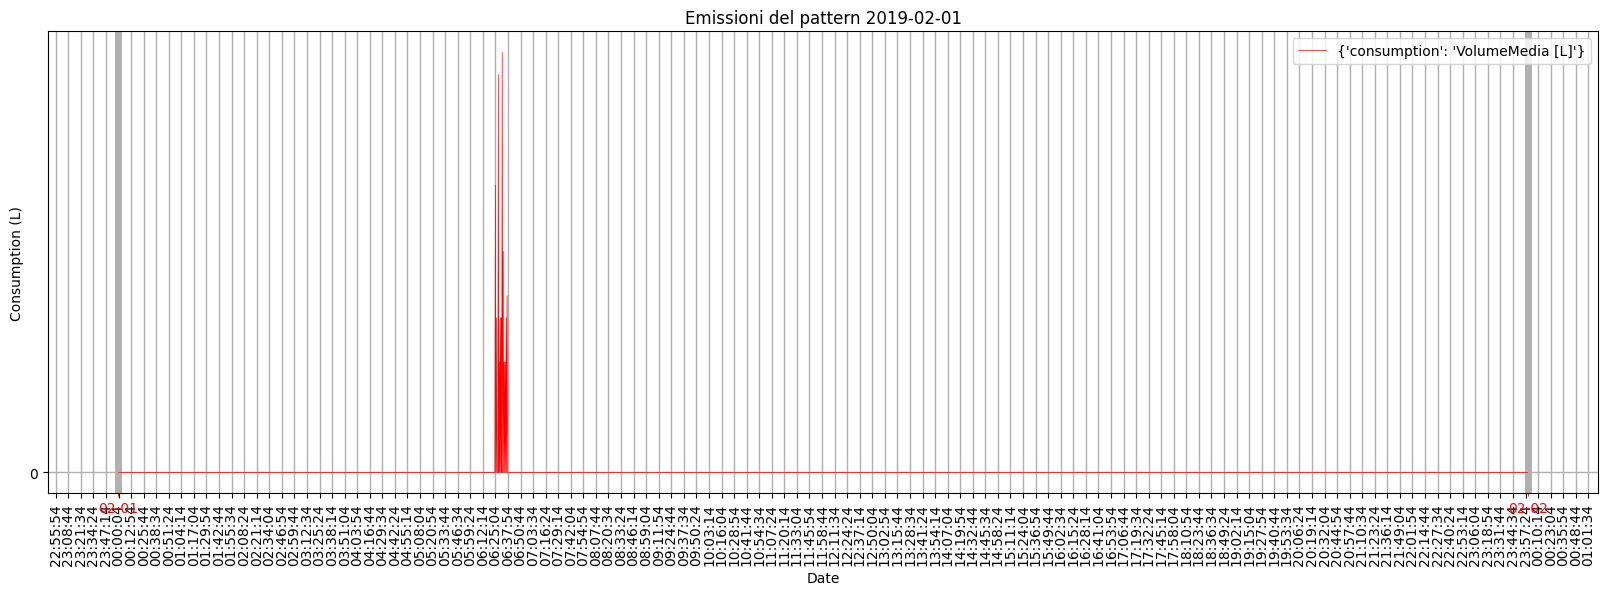

In [73]:
def read_fixture_sec(fixture: str, rule='T'):
    #Legge CSV
    df = pd.read_csv(f'./cartellacsvgenerati/shower2CAMALA1P_S05', delimiter=' ', header=None, names=['date', fixture])
    df['date'] = pd.to_datetime(df['date'], unit='s')
    
    # Rinomina la colonna fixture in 'consumption'
    df.rename(columns={fixture: 'consumption'}, inplace=True)
    df.set_index('date', inplace=True)
    
    # Resample il DataFrame usando la frequenza specificata (secondi 'S')
    df_secondly = df.resample(rule).sum()
    
    # Creare un DataFrame vuoto con il range di date specificato a livello di secondi
    date_rng = pd.date_range(start='2019-02-01', end='2019-2-1 23:59:59', freq='S')
    df_final = pd.DataFrame(date_rng, columns=['date'])
    df_final.set_index('date', inplace=True)
    
    # Unire il DataFrame secondario con il DataFrame vuoto per assicurarsi che tutte le date siano presenti
    df_final = df_final.join(df_secondly, how='left').fillna(0)
    
    grafico(df_final,1,'2019-02-01')
read_fixture_sec('')

In [69]:
#NOME FILE= DISPOSITIVO+MESE+PATTERN+INDICECSV
def creazione_filecsv(df,mese,daypattern,indice_csv,dispositivo):
    df['date'] = df.index
    df['date'] = df['date'].astype('int64') // 10**9  # Conversione in Unix timestamp
    # Salva il DataFrame in un file con solo spazio come separatore, senza intestazioni e indice
    filename = f'cartellacsvgenerati\{dispositivo}{mese}{daypattern}{indice_csv}.csv'
    df = df[['date','consumption' ]] 
    df.to_csv(filename, index=False, header=False, sep=' ')

mese=giorno=1
start_date = datetime(2019, mese, giorno, 0, 0, 0)
end_date=datetime(2019, mese, giorno, 23, 59, 59)
date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
df = pd.DataFrame(date_rng, columns=['date'])
df.set_index('date', inplace=True)
df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0
creazione_filecsv(df,mese,'0',1,'washbasin')

In [40]:
def scelta_pattern(df_final_sec,day_emiss,mm,mt,ms,num):
    #Intervalli sul grafico 770sec=12,8m, media valori ogni 30sec

    df_inter =df_final_sec.resample('770S').mean() #abbiamo solo emissioni 'importanti'
    
    #VEDE GLI INTERVALLI E DURATA
    in_interval = False
    start_date = None
    end_date = None
    duration=0
    intervals = []
    for date, consumption in df_inter['consumption'].items():
        if consumption > 0:#abbiamo delle emissioni
            if not in_interval:#inizio intervallo
                in_interval = True
                start_date = date
                duration = 1 
            else:#continuo intervallo
                duration += 1
        else:#no emissioni
            if in_interval:
                in_interval = False
                end_date=date
                intervals.append((start_date, end_date, duration))    
    if in_interval:
        end_date=date
        intervals.append((start_date, end_date, duration))
    
    print(f"\tintervalli trovati: {intervals}")

    #CREAZIONE PATTERN
    #ANALISI EMISSIONI 
    #print(f'{day_emiss }')
    #mm
    pattern=""
    if day_emiss<(mm/4):
        pattern+= "CA"
    elif day_emiss<(mm/2):
        pattern+= "CB"
    elif day_emiss<(mm*(3/4)):
        pattern+= "CC"
    elif day_emiss<mm:
        pattern+= "CD"
    elif day_emiss<(mm*(5/4)):
        pattern+= "CE"
    elif day_emiss<(mm*(3/2)):
        pattern+= "CF"
    elif day_emiss<(mm*(7/4)):
        pattern+= "CG"
    else:
        pattern+= "CH"

    #mt
    if day_emiss<(mt/4):
        pattern+= "MA"
    elif day_emiss<(mt/2):
        pattern+= "MB"
    elif day_emiss<(mt*(3/4)):
        pattern+= "MC"
    elif day_emiss<mt:
        pattern+= "MD"
    elif day_emiss<(mt*(5/4)):
        pattern+= "ME"
    elif day_emiss<(mt*(3/2)):
        pattern+= "MF"
    elif day_emiss<(mt*(7/4)):
        pattern+= "MG"
    else:
        pattern+= "MH"

    #ms
    if day_emiss<(ms / 4):
        pattern+= "LA"
    elif day_emiss<(ms / 2):
        pattern+= "LB"
    elif day_emiss<(ms * (3 / 4)):
        pattern+= "LC"
    elif day_emiss<ms:
        pattern+= "LD"
    elif day_emiss<(ms * (5 / 4)):
        pattern+= "LE"
    elif day_emiss<(ms * (3 / 2)):
        pattern+= "LF"
    elif day_emiss<(ms * (7 / 4)):
        pattern+= "LG"
    else:
        pattern+= "LH"
    
    #ANALISI INTERVALLI
    count_intervalli=len(intervals)
    pattern+= str(count_intervalli) #NUMERO DI INTERVALLI 

    #AGGIUNTA SULL'ANANLISI PER MENO DI 4 INTERVALLI
    if count_intervalli<4:#osservazione potrei farlo per tutti o allargare il numero 
        for _,_, durata in intervals:
            if durata>3: pattern += "L"#INTERVALLO LUNGO
            elif durata>1:  pattern += "M"#INTERVALLO MEDIO
            else: pattern += "P"#INTERVALLO PICCOLO     

    pattern += "_"   
    
    #CHANGE
    count_l=0
    count_m=0
    count_p=0
    for i in range(len(intervals) - 1):
        ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
        if ris>3: count_l += 1#intervallo di tempo LUNGO
        elif ris>1:  count_m += 1#intervallo di tempo MEDIO
        else: count_p += 1#intervallo di tempo PICCOLO
        #diff_tra_intervalli.append(  ris )
    
    #debug print count
    #if num==5: 
    print(f'\tspazi: lungo={count_l} medio={count_m} piccolo={count_p}\n')

    tot=count_l+(count_m+count_p)
    #ANALISI GENERALE INTERVALLI
    if count_l==tot: pattern+="S0"#MOLTO MOLTO SPARSO
    elif count_l>=(3/4)*tot:#MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="S1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S1d"
        elif count_m>0: pattern+="S1e"
        elif count_m==0: pattern+="S1f"
    elif count_l>=(1/2)*tot:#SPARSO
        if count_m==(count_m+count_p): pattern+="S2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S2d"
        elif count_m>0: pattern+="S2e"
        elif count_m==0: pattern+="S2f"
    elif count_l>=(1/4)*tot:#MEDIAMENTE SPARSO
        if count_m==(count_m+count_p): pattern+="M1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M1d"
        elif count_m>0: pattern+="M1e"
        elif count_m==0: pattern+="M1f"
    elif count_l>0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="M2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M2d"
        elif count_m>0: pattern+="M2e"
        elif count_m==0: pattern+="P0" #CONCENTRATO
    elif count_l==0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="P1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="P1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="P1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="P1d"
        elif count_m>0: pattern+="P1e"
        elif count_m==0: pattern+="P1f" #CONCENTRATO
    #print("DEBUG")
    return pattern

In [41]:
def funzione_main(mm_array,mt_array,ms_array,ma, mese_input,giorno ,array_settimana,indice_csv):
    count=0
    #array_df=[]
    for i in range(7): 
        indice_csv+=1
    #DIVISIONE DEL PATTERN
        daypattern=array_settimana[i] #da cambiare 0 con i
        max_emiss=0
        if daypattern!="0":
            print("ANALISI PATTERN INSERITO")
            #INTENSITA
            temp_pattern = daypattern[:6]
            #print(f"pattern_intensita: {temp_pattern}")
            
            indice = daypattern.index("_")#INDICE DEL CARATTERE
            #print(indice)

            temp_spazio_intervalli=daypattern[ (indice+1):] #numero spazi= numero interventi - 1
            print(f"\tspazio tra gli intervalli: {temp_spazio_intervalli}")#GRANDEZZA DEGLI SPAZI TRA GLI INTERVALLI
            
            #NUMERO INTERVALLI
            temp_intervalli = daypattern[6:indice]
            num_intervalli,temp_durata_intervalli=parti_numerica_e_non_numerica(temp_intervalli)
            print(f"\tnumero di intervalli: {num_intervalli}")

            #OTTENGO IL VALORE DELLE EMISSIONI IN QUEL GIORNO
            #mese e un possibile array
            if isinstance(mese_input, int):
                mese=mese_input
                day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)
            else:
                x=True
                while x:
                    for mese in mese_input:
                        day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)  
                        print(mese,x) 
                        if x==False: 
                            break 
            
            #DEBUG
            print(f"\temissione giornaliera: {day_emiss}")
            
            print("\nCOSTRUZIONE DEL DATAFRAME...............")
            while True:
                if num_intervalli<4 :
                    print(f"tipo degli intervalli: {temp_durata_intervalli}")
                    intervallo=scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli)
                else:
                    intervallo=scegli_intervalli(num_intervalli, temp_spazio_intervalli)
                
                #debug print(f"intervallo: {intervallo}")

                #DIVISIONE DELLE EMISSIONI, CREAZIONE DEL DATAFRAME PER IL PLOT
                df,emissioni_finale=suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma)
                #print(f"Dataframe\n{df}")
                if isinstance(df, bool):
                    #debug print("tentativo")
                    continue
                else:
                    break
            
            print("\nDATAFRAME  COSTRUITO")
            print(f"\tintervallo finale: {intervallo}")
            print(f"\tdivisione finale dell'emissioni in intervalli: {emissioni_finale}")
            print(f"\temissione totale giornaliera: {day_emiss}")
            #end 
            start_date = datetime(2019, mese, giorno, 0, 0, 0)
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            print(f"\tpicco di emissione giornaliera: {max_value}")

            #PROVA DEL NOVE, CONTROLLA SE IL DATAFRAME RISPETTA IL PATTERN INSERITO 
            if (mese)<=3: mt=mt_array[0]
            elif (mese)<=6: mt=mt_array[1]
            elif (mese)<=9: mt=mt_array[2]
            else: mt=mt_array[3]

            if (mese)<=6: ms=ms_array[0]
            else: ms=ms_array[1]

            print("\nPROVA DEL NOVE")
            pattern_calcolato=scelta_pattern(df,day_emiss,mm_array[mese-1],mt,ms,1)
            if pattern_calcolato==daypattern:#tutto giusto
                print(f"\tpattern identici: {daypattern}")
            else:
                count+=1
                print(f"\tpattern_nostro: {daypattern}    pattern_calcolato: {pattern_calcolato}")
            #grafico(df,max_value,start_date)     
            #array_df.append(df) 
            creazione_filecsv(df,mese,daypattern,indice_csv,'washbasin')
        else:#caso di pattern '0' quindi non faccio i calcoli
            #DEBUG
            print(f"emissione giornaliera: {max_emiss}\n")
            #if isinstance(mese_input, int):
            #    mese=mese_input
            #else:
            #    mese=mese_input[0]
            #start_date = datetime(2019, mese, giorno, 0, 0, 0)
            #end_date=datetime(2019, mese, giorno, 23, 59, 59)
            #date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
            #df = pd.DataFrame(date_rng, columns=['date'])
            #df.set_index('date', inplace=True)
            #df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0
            #array_df.append(df) 
    return count #,array_df

In [42]:
def funzione_main_shower(mm_array,mt_array,ms_array,ma, mese_input,giorno ,array_settimana,indice_csv):
    count=0
    #array_df=[]
    for i in range(7): 
        indice_csv+=1
    #DIVISIONE DEL PATTERN
        daypattern=array_settimana[i] #da cambiare 0 con i
        max_emiss=0
        if daypattern!="0":
            print("ANALISI PATTERN INSERITO")
            #INTENSITA
            temp_pattern = daypattern[:6]
            print(f"pattern_intensita: {temp_pattern}")
            
            indice = daypattern.index("_")#INDICE DEL CARATTERE
            #print(indice)

            temp_spazio_intervalli=daypattern[ (indice+1):] #numero spazi= numero interventi - 1
            print(f"\tspazio tra gli intervalli: {temp_spazio_intervalli}")#GRANDEZZA DEGLI SPAZI TRA GLI INTERVALLI
            
            #NUMERO INTERVALLI
            temp_intervalli = daypattern[6:indice]
            num_intervalli,temp_durata_intervalli=parti_numerica_e_non_numerica(temp_intervalli)
            print(f"\tnumero di intervalli: {num_intervalli}")
            print(f"\ttempo degli intervalli: {temp_durata_intervalli}")

            #OTTENGO IL VALORE DELLE EMISSIONI IN QUEL GIORNO
            #mese e un possibile array
            if isinstance(mese_input, int):
                mese=mese_input
                print(f"\tmese: {mese}")
                day_emiss,x=max_emissione_shower(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)
            else:
                x=True
                while x:
                    for mese in mese_input:
                        print(f"\tmese: {mese}")
                        day_emiss,x=max_emissione_shower(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)  
                        print(mese,x) 
                        if x==False: 
                            break 
            print(f"\tmese finale: {mese}")
            
            #DEBUG
            print(f"\temissione giornaliera: {day_emiss}")
            
            print("\nCOSTRUZIONE DEL DATAFRAME...............")
            while True:
                if num_intervalli<4 :
                    print(f"tipo degli intervalli: {temp_durata_intervalli}")
                    intervallo=scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli)
                else:
                    intervallo=scegli_intervalli(num_intervalli, temp_spazio_intervalli)
                
                print(f"intervallo: {intervallo}")

                #DIVISIONE DELLE EMISSIONI, CREAZIONE DEL DATAFRAME PER IL PLOT
                df,emissioni_finale=suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma)
                #print(f"Dataframe\n{df}")
                if isinstance(df, bool):
                    print("tentativo")
                    continue
                else:
                    break
            
            print("\nDATAFRAME  COSTRUITO")
            print(f"\tintervallo finale: {intervallo}")
            print(f"\tdivisione finale dell'emissioni in intervalli: {emissioni_finale}")
            print(f"\temissione totale giornaliera: {day_emiss}")
            #end 
            start_date = datetime(2019, mese, giorno, 0, 0, 0)
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            print(f"\tpicco di emissione giornaliera: {max_value}")

            #PROVA DEL NOVE, CONTROLLA SE IL DATAFRAME RISPETTA IL PATTERN INSERITO 
            if (mese)<=3: mt=mt_array[0]
            elif (mese)<=6: mt=mt_array[1]
            elif (mese)<=9: mt=mt_array[2]
            else: mt=mt_array[3]

            if (mese)<=6: ms=ms_array[0]
            else: ms=ms_array[1]

            print("\nPROVA DEL NOVE")
            pattern_calcolato=scelta_pattern(df,day_emiss,mm_array[mese-1],mt,ms,1)
            if pattern_calcolato==daypattern:#tutto giusto
                print(f"\tpattern identici: {daypattern}")
            else:
                count+=1
                print(f"\tpattern_nostro: {daypattern}    pattern_calcolato: {pattern_calcolato}")
            #per troppi grafici grafico(df,max_value,start_date)
            #array_df.append(df)  
            creazione_filecsv(df,mese,daypattern,indice_csv,'shower')
        else:#caso di pattern '0' quindi non faccio i calcoli
            #DEBUG
            print(f"emissione giornaliera: {max_emiss}\n")
            #if isinstance(mese_input, int):
            #    mese=mese_input
            #else:
            #    mese=mese_input[0]
            #start_date = datetime(2019, mese, giorno, 0, 0, 0)
            #end_date=datetime(2019, mese, giorno, 23, 59, 59)
            #date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
            #df = pd.DataFrame(date_rng, columns=['date'])
            #df.set_index('date', inplace=True)
            #df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0
            #array_df.append(df) 
    return count #,array_df

In [ ]:
# ANALISI SULL'OCCORRENZA DEI PATTERN 
diz_washbasin={'0': 125, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 1, 'CHMHLH4_S0': 1, 'CGMHLF3MPP_S0': 1, 'CHMHLG2LM_S0': 1, 'CHMHLH8_S2c': 1, 'CFMHLE5_S1a': 1, 'CHMHLH9_S2a': 2, 'CGMHLE5_S0': 1, 'CFMGLD3MPP_S2f': 1, 'CHMHLG5_S1a': 1, 'CHMHLH8_M1c': 1, 'CGMHLE3LMP_S0': 1, 'CHMHLH6_M1d': 1, 'CEMHLE4_S2a': 1, 'CDMGLD5_S1f': 1, 'CFMHLF5_S2a': 2, 'CFMHLF2MP_S0': 1, 'CDMGLD3PPL_S0': 1, 'CCMDLC3MMP_S2a': 1, 'CCMDLC1M_S0': 1, 'CDMFLC3PPL_P1c': 1, 'CFMHLF7_S2f': 1, 'CAMBLA2PP_P1a': 1, 'CEMGLD3MPP_S2f': 1, 'CDMFLC5_S1f': 1, 'CEMHLE8_S2f': 1, 'CDMGLD3PPM_S0': 1, 'CAMALA1M_S0': 3, 'CDMGLD4_S0': 2, 'CDMGLD3LPP_S0': 1, 'CDMGLD13_M1d': 1, 'CEMHLE3PLM_S0': 1, 'CHMHLH8_S1a': 1, 'CDMFLD2MP_S0': 1, 'CHMHLH8_S2a': 1, 'CCMDLC2MM_S0': 1, 'CFMHLE8_S0': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC2PP_S0': 1, 'CCMDLC2LP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CBMBLC2PL_P1a': 1, 'CCMCLD1M_S0': 1, 'CDMCLE3MMM_S0': 1, 'CEMELF7_S2d': 1, 'CDMCLD5_S1f': 2, 'CFMELH2MM_S0': 1, 'CBMBLB7_S1a': 1, 'CCMBLC3MMM_S2f': 1, 'CBMBLC2MP_S0': 2, 'CEMELG6_S0': 1, 'CFMELH5_S0': 1, 'CAMALA2PP_S0': 5, 'CEMDLF5_S2a': 1, 'CDMDLE7_S2c': 2, 'CEMELF5_M1f': 1, 'CHMHLH3PMP_S2f': 1, 'CBMALB5_M1c': 1, 'CDMDLE7_S2f': 1, 'CFMFLH6_S0': 1, 'CHMHLH9_M1b': 1, 'CHMGLH7_S2c': 1, 'CCMCLD7_S2c': 1, 'CCMCLD2MM_P1f': 1, 'CHMHLH6_S1a': 1, 'CCMBLC4_S0': 1, 'CDMCLD4_M1c': 1, 'CFMDLF6_S2f': 1, 'CCMBLC2PL_S0': 1, 'CDMCLE6_S2a': 1, 'CDMCLD3MPM_S0': 1, 'CEMDLE4_S2a': 1, 'CCMCLD4_S2a': 1, 'CCMCLD2MP_P1f': 1, 'CAMALA3PPP_S2a': 1, 'CDMCLE5_S1f': 1, 'CEMDLF4_S2f': 1, 'CDMCLD1L_S0': 1, 'CDMCLD4_S2f': 1, 'CHMHLH6_S2c': 2, 'CCMCLD9_S2c': 1, 'CBMBLB2PP_S0': 1, 'CGMFLH5_S1a': 1, 'CFMELG4_M1f': 1, 'CGMELG4_S2f': 1, 'CFMELG4_S2f': 1, 'CAMALA4_S2a': 2, 'CDMCLE1M_S0': 1, 'CHMFLH5_M1d': 1, 'CDMELG7_S1f': 1, 'CDMFLH7_M1b': 1, 'CDMFLH8_S1a': 1, 'CBMCLD4_S2a': 1, 'CCMDLF4_S2a': 1, 'CCMDLF9_S2c': 1, 'CBMCLD7_S1f': 1, 'CBMCLD8_S1a': 1, 'CFMHLH12_S2c': 1, 'CBMBLB4_S2f': 1, 'CEMFLH9_S2c': 1, 'CEMGLH8_M1c': 1, 'CHMHLH10_M1b': 1, 'CBMCLD7_S1a': 1, 'CCMDLF7_M1b': 1, 'CCMDLE4_S0': 1, 'CHMHLH11_M2d': 1, 'CBMBLC3MMM_P1c': 1, 'CEMFLH16_M1d': 1, 'CEMFLH11_S2c': 1, 'CBMCLD5_S1f': 1, 'CCMDLF2LM_S0': 1, 'CEMGLH11_S2d': 1, 'CCMCLE11_M2c': 1, 'CAMALA5_M1d': 1, 'CAMALA4_S0': 1, 'CDMELG8_S2a': 1, 'CEMELF1L_S0': 1, 'CAMBLB3MPP_S2a': 1, 'CEMFLG9_S1c': 1, 'CCMCLD2LM_S0': 1, 'CAMALA2MP_S0': 1, 'CHMHLH11_M1a': 1, 'CDMELF7_S1a': 1, 'CFMGLH4_S2a': 1, 'CDMDLE3PLP_S0': 1, 'CGMHLH13_S2d': 1, 'CCMDLD4_S2f': 1, 'CHMHLH11_S2a': 1, 'CEMELF2MP_P1f': 1, 'CDMDLE4_S2a': 1, 'CHMHLH10_S2c': 1, 'CCMCLD4_S2f': 1, 'CCMCLD8_S2c': 1, 'CCMDLD4_M1a': 1, 'CDMELF7_M1d': 1, 'CDMELF4_M1f': 1, 'CDMDLE5_S2c': 1, 'CAMALA5_S2a': 1, 'CCMDLD4_M1c': 1, 'CEMFLG6_S0': 1, 'CEMELF9_S1f': 1, 'CDMDLE7_M1b': 1, 'CFMGLH10_S1c': 1, 'CDMELF2PM_P1f': 1, 'CHMDLE6_M1d': 1, 'CHMHLH16_M1c': 1, 'CDMBLC5_S0': 1, 'CDMBLC1M_S0': 1, 'CCMBLB1P_S0': 1, 'CGMDLE4_S2f': 1, 'CDMBLC3PLP_S2a': 1, 'CFMDLD6_S2a': 1, 'CFMDLD10_M1e': 1, 'CCMBLB2PM_P1a': 1, 'CEMCLC4_P1c': 1, 'CHMFLH3LPP_P1c': 1, 'CDMBLB1M_S0': 1, 'CHMHLH2MP_S0': 1, 'CAMALA2MP_P1a': 1, 'CEMCLD4_S2a': 1, 'CHMHLH6_S2a': 1, 'CDMELF3MPM_S0': 1, 'CBMCLD5_S0': 1, 'CEMGLH10_S2b': 1, 'CDMELF5_S1a': 1, 'CBMCLC4_S2f': 1, 'CCMCLD3PPM_P1a': 1, 'CCMDLE2MM_S0': 1, 'CGMHLH4_S2f': 1, 'CBMCLC2PP_P1a': 1, 'CCMDLE5_S2c': 1, 'CGMHLH7_S2c': 1, 'CAMBLB3PPP_S0': 1, 'CCMCLD2MP_P1a': 1, 'CGMHLH10_M1d': 1, 'CEMGLH11_M1d': 1, 'CEMGLH6_M1a': 1, 'CDMELF2MM_S0': 1, 'CGMHLH8_S2a': 1, 'CCMDLE3PMP_S2f': 1, 'CHMHLH7_S1f': 2, 'CHMHLH8_S2f': 1, 'CFMHLH4_S2f': 1, 'CCMDLE6_S1a': 1, 'CHMHLH5_S0': 1, 'CGMHLH9_S1c': 1, 'CGMHLH8_M1a': 1, 'CEMFLH8_S2c': 1, 'CEMHLH4_S0': 1, 'CAMALA3MMP_P1c': 1, 'CBMELD2MM_S0': 1, 'CGMHLH6_M1c': 1, 'CDMHLH8_S1a': 1, 'CHMHLH4_S2a': 1, 'CBMFLE5_S0': 1, 'CHMHLH6_S1f': 1, 'CEMHLH3MPM_S2f': 1, 'CBMFLE3MPP_S2f': 1, 'CHMHLH10_S2d': 1, 'CHMHLH9_S1a': 1, 'CHMHLH5_S1a': 1, 'CCMHLG5_S1f': 1, 'CCMGLE3MPP_S0': 1, 'CCMHLG4_S0': 1, 'CCMHLG5_M1d': 1, 'CHMHLH8_M1d': 1, 'CAMCLC2PP_S0': 1, 'CBMDLC2PP_S0': 1, 'CEMHLH6_S0': 2, 'CBMFLE3LPP_S2f': 1, 'CCMHLG3LMP_S0': 1, 'CDMHLH4_S0': 1, 'CGMHLH6_S1a': 1, 'CFMHLH10_M1a': 1}
diz_bidet={'0': 135, 'CAMALA5_M1d': 1, 'CAMALA2PM_P1f': 1, 'CAMALA3PPP_S0': 1, 'CAMALA2PP_S0': 1, 'CAMALA1P_S0': 9, 'CAMBLB2PP_S0': 1, 'CAMBLB1P_S0': 1, 'CAMCLB3PPP_S0': 1, 'CBMALA3PPP_S2a': 1, 'CBMBLB2MP_S0': 1, 'CBMBLB2PM_S0': 1, 'CBMBLB3PPP_S0': 1, 'CBMBLB4_S2a': 1, 'CBMBLC2MP_S0': 1, 'CBMBLC3PPP_P1c': 1, 'CBMBLC2PP_P1a': 1, 'CBMBLC2PP_S0': 1, 'CBMBLC1P_S0': 7, 'CBMBLC6_S2c': 1, 'CBMBLC4_S2f': 1, 'CBMCLC3PPP_S0': 1, 'CBMCLC3PPP_S2a': 1, 'CBMCLC2PP_S0': 1, 'CBMCLC4_S2f': 1, 'CBMCLD1M_S0': 1, 'CBMCLD2PP_P1a': 1, 'CBMCLD2PP_S0': 2, 'CBMCLD1P_S0': 1, 'CBMDLC9_M2c': 1, 'CBMDLC2PP_S0': 1, 'CBMDLC1P_S0': 4, 'CBMELD2PM_S0': 1, 'CBMELD2PP_S0': 1, 'CBMFLD3MPP_S2f': 1, 'CBMFLD2MP_S0': 1, 'CCMALB6_M2c': 1, 'CCMBLC1M_S0': 1, 'CCMBLC1P_S0': 1, 'CCMCLC3PPP_S0': 1, 'CCMCLC5_S2c': 1, 'CCMCLD2MP_S0': 1, 'CCMCLD3PPP_S0': 1, 'CCMCLD2PP_S0': 1, 'CCMCLD1P_S0': 3, 'CCMCLD7_S2d': 1, 'CCMCLD4_S2f': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC1P_S0': 2, 'CCMDLD1P_S0': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE6_M1c': 1, 'CCMDLE4_M1f': 1, 'CCMDLE2PM_S0': 2, 'CCMDLE3PPP_S0': 2, 'CCMDLE3PPP_S2f': 1, 'CCMDLE2PP_P1f': 1, 'CCMDLE2PP_S0': 1, 'CCMDLE1P_S0': 1, 'CCMDLF4_S2a': 1, 'CCMELC3PPP_S0': 1, 'CCMELC2PP_S0': 1, 'CCMELC1P_S0': 2, 'CCMELD1P_S0': 2, 'CCMFLD1P_S0': 2, 'CCMGLE3MPP_S0': 1, 'CCMGLE3PPP_S0': 1, 'CCMGLE4_S2f': 2, 'CCMHLF2MP_S0': 1, 'CCMHLF2PP_S0': 1, 'CDMCLD4_M1c': 1, 'CDMCLD2PM_S0': 1, 'CDMCLD1P_S0': 2, 'CDMDLE3PPP_S0': 1, 'CDMDLE2PP_S0': 1, 'CDMDLE1P_S0': 1, 'CDMDLF4_S2a': 1, 'CDMELF2PP_P1a': 1, 'CDMELF2PP_S0': 3, 'CDMELF7_S2a': 1, 'CDMELG12_M1c': 1, 'CDMELG5_S0': 1, 'CDMFLD3MPP_S0': 1, 'CDMFLG1M_S0': 1, 'CDMFLG3PPP_S2a': 2, 'CDMFLG4_S2a': 1, 'CDMFLH3PPP_S0': 1, 'CDMFLH2PP_S0': 1, 'CDMGLD2PP_S0': 1, 'CDMHLE1M_S0': 1, 'CDMHLH4_S0': 1, 'CDMHLH5_S1a': 1, 'CDMHLH8_S1a': 1, 'CEMBLC2PP_S0': 1, 'CEMBLC1P_S0': 2, 'CEMBLC5_S0': 1, 'CEMDLE2PP_S0': 1, 'CEMDLE1P_S0': 3, 'CEMDLE5_S0': 1, 'CEMDLF4_P1d': 1, 'CEMDLF4_S0': 1, 'CEMELF1M_S0': 1, 'CEMELF2PP_S0': 1, 'CEMELG2PP_S0': 2, 'CEMFLG3PPP_S2f': 1, 'CEMFLH3PMP_S0': 1, 'CEMFLH2PP_S0': 1, 'CEMFLH5_S0': 1, 'CEMFLH6_S1a': 1, 'CEMGLH4_S2a': 1, 'CEMGLH6_S2c': 1, 'CEMHLH3MPP_S0': 1, 'CEMHLH3PMP_S2a': 1, 'CEMHLH3PPP_S0': 1, 'CEMHLH4_S0': 1, 'CEMHLH11_S2b': 1, 'CFMDLF3PPP_S2f': 1, 'CFMELG5_M1d': 1, 'CFMELG2PP_S0': 1, 'CFMELG6_S0': 1, 'CFMFLH2MP_P1f': 1, 'CFMFLH3PPP_S0': 1, 'CFMFLH2PP_S0': 1, 'CFMGLE2PP_S0': 1, 'CFMGLH7_S2a': 1, 'CFMHLG3PPP_S2a': 1, 'CFMHLH10_M1d': 1, 'CFMHLH2PP_S0': 1, 'CFMHLH5_S1a': 1, 'CFMHLH8_S2d': 1, 'CFMHLH9_S2d': 1, 'CFMHLH11_S2f': 1, 'CGMCLD5_M1c': 1, 'CGMCLD2PP_P1f': 1, 'CGMFLG7_S0': 1, 'CGMFLH3PPP_S2a': 1, 'CGMFLH2PP_S0': 1, 'CGMFLH4_S2f': 1, 'CGMGLE3PPP_S2a': 1, 'CGMHLE3MPM_S2a': 1, 'CGMHLH3MPM_S2a': 1, 'CGMHLH1P_S0': 1, 'CGMHLH5_S0': 1, 'CGMHLH7_S0': 1, 'CHMDLE2PM_S0': 1, 'CHMELF8_S1a': 1, 'CHMGLH3MPP_S0': 1, 'CHMGLH2MP_S0': 1, 'CHMGLH5_S2c': 1, 'CHMGLH6_S2f': 1, 'CHMHLF1P_S0': 2, 'CHMHLF4_S0': 1, 'CHMHLF5_S2f': 1, 'CHMHLG4_S0': 1, 'CHMHLG4_S2a': 1, 'CHMHLH3MMP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CHMHLH2MP_S0': 1, 'CHMHLH1M_S0': 3, 'CHMHLH4_M1c': 1, 'CHMHLH7_M1c': 1, 'CHMHLH8_M1c': 1, 'CHMHLH3PMP_S0': 1, 'CHMHLH2PM_S0': 1, 'CHMHLH3PPP_S0': 1, 'CHMHLH3PPP_S2a': 1, 'CHMHLH2PP_S0': 1, 'CHMHLH4_S0': 1, 'CHMHLH6_S0': 1, 'CHMHLH4_S2a': 1, 'CHMHLH5_S1a': 2, 'CHMHLH6_S1a': 2, 'CHMHLH6_S2a': 1, 'CHMHLH9_S1a': 1, 'CHMHLH6_S2c': 1, 'CHMHLH7_S2c': 2, 'CHMHLH5_S1f': 3, 'CHMHLH5_S2f': 1, 'CHMHLH7_S1f': 1, 'CHMHLH7_S2f': 1}
diz_shower={'0': 193, 'CAMALA4_M1f': 1, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 3, 'CAMALA2PP_S0': 5, 'CAMALA1P_S0': 10, 'CAMALA4_S0': 1, 'CAMALA6_S0': 1, 'CAMALA5_S1a': 1, 'CAMALA6_S1f': 2, 'CAMALB1M_S0': 1, 'CAMALB3PPP_S0': 1, 'CAMBLB6_S2c': 1, 'CAMBLC1M_S0': 1, 'CBMBLB1P_S0': 1, 'CBMBLC1M_S0': 1, 'CBMCLC3PPP_S2a': 1, 'CBMCLC1P_S0': 2, 'CBMCLD1P_S0': 1, 'CBMCLE1P_S0': 1, 'CBMDLE1P_S0': 1, 'CBMELD1P_S0': 1, 'CCMALA2PM_S0': 1, 'CCMALA1P_S0': 1, 'CCMBLC2MP_S0': 1, 'CCMCLD3PMP_S2a': 1, 'CCMCLD1P_S0': 2, 'CCMDLD1P_S0': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE2PP_S0': 1, 'CCMDLE1P_S0': 1, 'CCMDLF1M_S0': 1, 'CCMDLF1P_S0': 1, 'CCMFLE1P_S0': 2, 'CCMGLE2PP_S0': 1, 'CCMHLF1M_S0': 1, 'CCMHLF4_S0': 1, 'CDMDLE3PPP_S0': 1, 'CDMDLE1P_S0': 2, 'CDMELF1M_S0': 1, 'CDMELG2PP_S0': 1, 'CDMELH1P_S0': 1, 'CDMFLG2PP_P1a': 1, 'CDMFLG1P_S0': 1, 'CDMFLH1M_S0': 1, 'CDMFLH2PP_S0': 1, 'CDMFLH1P_S0': 1, 'CDMFLH4_S2a': 1, 'CDMHLG1P_S0': 1, 'CDMHLH2MP_S0': 1, 'CDMHLH1P_S0': 1, 'CEMFLH3PMP_S2f': 1, 'CEMFLH1P_S0': 2, 'CEMGLH1M_S0': 1, 'CEMHLF1P_S0': 1, 'CEMHLH2MP_P1f': 1, 'CEMHLH2MP_S0': 1, 'CEMHLH1M_S0': 1, 'CEMHLH3PPM_S0': 1, 'CEMHLH2PP_S0': 1, 'CFMDLG1M_S0': 1, 'CFMGLH2PP_S0': 2, 'CFMGLH1P_S0': 2, 'CFMHLH2MM_S0': 1, 'CFMHLH1M_S0': 1, 'CFMHLH2PP_S0': 1, 'CFMHLH1P_S0': 2, 'CFMHLH4_S0': 1, 'CGMELH1M_S0': 1, 'CGMFLH1P_S0': 2, 'CGMHLH3MMP_S0': 1, 'CGMHLH3MPM_S2f': 1, 'CGMHLH1M_S0': 3, 'CGMHLH2PM_S0': 1, 'CGMHLH2PP_S0': 2, 'CGMHLH1P_S0': 2, 'CHMDLE1M_S0': 1, 'CHMELF2PM_S0': 1, 'CHMFLG1P_S0': 1, 'CHMFLH2MP_P1f': 1, 'CHMFLH2PP_S0': 1, 'CHMFLH1P_S0': 2, 'CHMGLH1M_S0': 2, 'CHMGLH2PM_S0': 1, 'CHMGLH1P_S0': 1, 'CHMHLG1P_S0': 1, 'CHMHLH3MPP_S0': 1, 'CHMHLH3MPP_S2a': 2, 'CHMHLH2MP_P1a': 1, 'CHMHLH2MP_P1f': 1, 'CHMHLH2MP_S0': 3, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 1, 'CHMHLH3PMP_S0': 2, 'CHMHLH2PM_S0': 3, 'CHMHLH3PPM_S0': 1, 'CHMHLH2PP_P1f': 1, 'CHMHLH2PP_S0': 4, 'CHMHLH1P_S0': 5, 'CHMHLH4_S0': 2, 'CHMHLH6_S0': 1, 'CHMHLH5_S1a': 1, 'CHMHLH6_S1a': 1, 'CHMHLH6_S2c': 1, 'CHMHLH4_S2f': 1}
diz_kitchenfaucet={'0': 142, 'CAMALA3MMP_S2a': 1, 'CAMALA3MPP_P1a': 1, 'CAMALA3MPP_S0': 1, 'CAMALA3MPP_S2a': 1, 'CAMALA2MP_P1a': 1, 'CAMALA2MP_S0': 3, 'CAMALA1M_S0': 4, 'CAMALA3PMP_S2f': 1, 'CAMALA2PM_S0': 3, 'CAMALA3PPM_S2a': 1, 'CAMALA3PPP_S0': 4, 'CAMALA2PP_P1a': 1, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 18, 'CAMALA4_S0': 1, 'CAMALA5_S0': 1, 'CAMALA4_S2a': 1, 'CAMALA5_S1a': 1, 'CAMALB2MP_P1f': 1, 'CAMALB1M_S0': 2, 'CAMALB2PP_S0': 1, 'CAMALB4_S2a': 1, 'CAMBLA3MPP_S2a': 1, 'CAMBLA2MP_S0': 1, 'CAMBLA1M_S0': 1, 'CAMBLA5_M1c': 1, 'CAMBLA4_M1f': 1, 'CAMBLA2PM_S0': 1, 'CAMBLA2PP_S0': 1, 'CAMBLA4_S0': 2, 'CAMBLA10_S2c': 1, 'CAMBLB4_S0': 1, 'CAMCLB2MM_S0': 1, 'CAMCLB2MP_S0': 1, 'CAMCLB1P_S0': 1, 'CBMALA2PM_P1f': 1, 'CBMALB4_M1c': 1, 'CBMALB4_S2a': 1, 'CBMBLB1M_S0': 1, 'CBMBLB2PM_S0': 1, 'CBMBLB3PPP_S2a': 1, 'CBMBLB5_S1f': 1, 'CBMBLB8_S1f': 1, 'CBMBLC2MP_S0': 1, 'CBMBLC6_M1f': 1, 'CBMBLC3PMP_S0': 2, 'CBMBLC3PMP_S2a': 1, 'CBMBLC3PMP_S2f': 1, 'CBMBLC3PPM_S0': 1, 'CBMBLC2PP_P1f': 1, 'CBMBLC4_S0': 1, 'CBMBLC5_S0': 1, 'CBMBLC5_S1a': 2, 'CBMCLC2MP_S0': 1, 'CBMCLC3PPM_S0': 1, 'CBMCLC4_S0': 1, 'CBMCLC5_S2f': 1, 'CBMCLC6_S1f': 1, 'CBMCLD4_S2a': 2, 'CBMCLD5_S1a': 1, 'CBMDLB1M_S0': 1, 'CBMDLB2PP_S0': 1, 'CBMDLB4_S2f': 1, 'CBMFLC2MP_S0': 1, 'CBMFLD2PM_S0': 1, 'CBMFLD4_S2f': 1, 'CCMBLB7_S1a': 1, 'CCMBLC2MP_P1a': 1, 'CCMBLC1M_S0': 1, 'CCMBLC5_S2a': 1, 'CCMCLD2MP_S0': 1, 'CCMCLD3PMP_P1a': 1, 'CCMCLD2PM_S0': 1, 'CCMCLD4_S2a': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE3PMP_S0': 1, 'CCMDLE3PPM_S2a': 1, 'CCMDLE4_P1c': 1, 'CCMDLE6_S1a': 1, 'CCMDLE4_S2f': 2, 'CCMDLE6_S2f': 1, 'CCMDLF5_S2c': 1, 'CCMELG4_S2a': 1, 'CCMGLD4_S2f': 1, 'CCMHLE10_S1a': 1, 'CCMHLF1P_S0': 1, 'CDMCLD3PPP_S0': 1, 'CDMCLD2PP_P1a': 1, 'CDMCLD6_S1f': 1, 'CDMDLE2PP_S0': 1, 'CDMDLF5_S0': 1, 'CDMDLF4_S2f': 1, 'CDMDLF5_S1f': 1, 'CDMELF5_M1d': 1, 'CDMELF7_S2f': 1, 'CDMELG2PL_S0': 1, 'CDMELH8_M1e': 1, 'CDMFLH8_S1a': 1, 'CDMHLE5_S1a': 1, 'CDMHLF6_S2a': 1, 'CDMHLG5_S1a': 1, 'CEMCLE3MPM_S2a': 1, 'CEMCLE5_S1f': 1, 'CEMELG3PMP_S2a': 1, 'CEMELG4_S0': 1, 'CEMELH5_S2c': 1, 'CEMFLG1L_S0': 1, 'CEMFLH2PM_S0': 1, 'CEMFLH4_S2a': 1, 'CEMHLF3MMM_S2f': 1, 'CFMDLF1M_S0': 1, 'CFMFLH7_M2c': 1, 'CFMFLH6_M2d': 1, 'CFMFLH4_S0': 1, 'CFMFLH5_S2a': 1, 'CFMFLH7_S2f': 1, 'CFMGLH10_S2b': 1, 'CFMHLH1L_S0': 1, 'CFMHLH11_M1c': 1, 'CFMHLH5_S1a': 2, 'CFMHLH7_S2c': 1, 'CFMHLH11_S2c': 1, 'CGMDLF4_S0': 1, 'CGMDLF5_S1a': 1, 'CGMHLH7_M1c': 3, 'CGMHLH5_S1a': 1, 'CGMHLH5_S2c': 2, 'CGMHLH7_S2c': 1, 'CGMHLH4_S2f': 1, 'CHMFLH4_S2f': 1, 'CHMGLH9_S2c': 1, 'CHMHLH3MPL_S0': 1, 'CHMHLH3MPM_S0': 1, 'CHMHLH7_M1a': 1, 'CHMHLH8_M1c': 1, 'CHMHLH10_M1c': 1, 'CHMHLH11_M1c': 1, 'CHMHLH11_M1d': 1, 'CHMHLH11_M1e': 1, 'CHMHLH3PLL_P1a': 1, 'CHMHLH4_P1d': 1, 'CHMHLH5_S0': 2, 'CHMHLH6_S0': 1, 'CHMHLH7_S0': 1, 'CHMHLH4_S2a': 1, 'CHMHLH5_S2a': 2, 'CHMHLH6_S1a': 2, 'CHMHLH6_S2a': 4, 'CHMHLH9_S2a': 1, 'CHMHLH9_S2b': 1, 'CHMHLH7_S2c': 1, 'CHMHLH8_S2c': 3, 'CHMHLH9_S1c': 1, 'CHMHLH10_S2c': 1, 'CHMHLH7_S2d': 1, 'CHMHLH8_S2d': 1, 'CHMHLH5_S1f': 2, 'CHMHLH6_S2f': 1, 'CHMHLH7_S1f': 1, 'CHMHLH7_S2f': 1}

new_diz={}
for key,value in diz_kitchenfaucet.items():
    if value in new_diz:#se lo trova 
        new_diz[value].append(key)
    else:
        new_diz[value]=[]
        new_diz[value].append(key)

for key,value in new_diz.items():
    print(f'occorrenza {key}:\t pattern {new_diz[key]}')
    print(f'pattern con questa occorrenza {len(new_diz[key])}\n')

In [62]:
#CODICE PER GENERARE LE TIMESERIES DELLE SETTIMANE GENERATE DAL PRIMO AL NONO PERIODO
mesegenerate=[ [2,3], [3,4], [4,5], [5,6], 6, 7, [7,8], [8,9], [9,10] ]
#MAIN PER SHOWER
df_dispositivo_emissioni=read_fixture('Shower')
mm_array=calcola_media_mensile(df_dispositivo_emissioni)
mt_array=calcola_media_trimestrale(df_dispositivo_emissioni)
ms_array=calcola_media_semestrale(df_dispositivo_emissioni)
ma=calcola_media_annuale(df_dispositivo_emissioni)


per1=[
    ['0', '0', '0', 'CAMALA3PPP_S0', 'CAMALA1P_S0', '0', 'CAMALA3PPP_S0'],
    ['0', '0', 'CCMALA1P_S0', 'CCMALA1P_S0', 'CAMALA4_M1f', 'CAMALA1P_S0', '0'],
    ['CAMALA3PPP_S0', 'CAMALA2PP_S0', 'CAMALA3PPP_S0', '0', '0', '0', '0'],
    ['CAMALA1P_S0', '0', 'CCMALA2PM_S0', '0', '0', '0', '0'],
    ['0', '0', 'CAMALA1P_S0', 'CHMHLH1M_S0', 'CHMHLG1P_S0', 'CAMALA4_M1f', 'CCMALA2PM_S0'],
    ['0', '0', 'CHMHLH2MP_P1a', '0', 'CHMHLH6_S1a', 'CHMHLH2MP_P1a', 'CCMALA1P_S0'],
    ['0', '0', '0', 'CCMALA1P_S0', '0', '0', 'CAMALA5_S1a'],
    ['0', '0', 'CHMHLH2MP_P1a', '0', '0', 'CCMALA2PM_S0', 'CAMALA4_M1f'],
    ['0', 'CHMHLG1P_S0', 'CAMALA3PPP_S0', 'CHMHLH1M_S0', 'CHMHLG1P_S0', 'CHMHLG1P_S0', 'CHMHLH6_S1a'],
    ['0', 'CAMALA3PPP_S0', '0', '0', '0', '0', '0'],
    ['0', 'CHMHLH2MP_P1a', 'CCMALA2PM_S0', 'CAMALA5_S1a', '0', 'CAMALA3PPP_S0', '0'],
    ['0', 'CAMALA2PP_S0', 'CAMALA3PPP_S0', 'CCMALA1P_S0', 'CAMALA3PPP_S0', 'CCMALA1P_S0', '0'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['CAMALA5_S1a', 'CAMALA5_S1a', '0', 'CAMALA3PPP_S0', '0', '0', 'CHMHLH2MP_P1a'],
    ['CAMALA2PP_S0', '0', '0', '0', 'CCMALA2PM_S0', '0', '0'],
    ['0', 'CCMALA1P_S0', '0', 'CHMHLH1M_S0', 'CHMHLH1M_S0', 'CAMALA5_S1a', 'CAMALA4_M1f'],
    ['0', 'CHMHLG1P_S0', '0', '0', '0', '0', 'CAMALA1P_S0'],
    ['0', 'CCMALA2PM_S0', '0', '0', '0', '0', 'CHMHLH1M_S0'],
    ['CHMHLH6_S1a', 'CHMHLG1P_S0', 'CCMALA1P_S0', 'CAMALA3PPP_S0', '0', 'CAMALA3PPP_S0', '0'],
    ['0', 'CHMHLH1M_S0', 'CAMALA4_M1f', 'CAMALA2PP_S0', 'CCMALA2PM_S0', 'CHMHLH2MP_P1a', 'CAMALA1P_S0'],
    ['0', '0', 'CCMALA2PM_S0', '0', '0', '0', '0'],
    ['0', '0', 'CCMALA2PM_S0', '0', 'CAMALA4_M1f', '0', 'CAMALA5_S1a'],
    ['CCMALA2PM_S0', 'CHMHLH1M_S0', 'CHMHLG1P_S0', 'CAMALA1P_S0', 'CHMHLH1M_S0', '0', 'CAMALA1P_S0'],
    ['CAMALA1P_S0', 'CAMALA5_S1a', 'CAMALA3PPP_S0', 'CHMHLH2MP_P1a', '0', '0', '0'],
    ['CAMALA2PP_S0', 'CCMALA2PM_S0', 'CAMALA4_M1f', 'CHMHLH1M_S0', '0', '0', 'CHMHLH1M_S0'],
    ['0', 'CAMALA1P_S0', '0', '0', '0', '0', '0'],
    ['CHMHLG1P_S0', '0', '0', '0', 'CHMHLG1P_S0', '0', 'CAMALA4_M1f'],
    ['0', '0', 'CAMALA3PPP_S0', 'CCMALA2PM_S0', '0', '0', '0'],
    ['CAMALA4_M1f', 'CHMHLH6_S1a', '0', '0', '0', '0', 'CCMALA1P_S0'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['CHMHLG1P_S0', 'CHMHLH6_S1a', '0', '0', '0', 'CAMALA2PP_S0', 'CHMHLH2MP_P1a'],
    ['CAMALA1P_S0', 'CHMHLH1M_S0', '0', 'CAMALA4_M1f', 'CAMALA3PPP_S0', 'CHMHLH2MP_P1a', 'CAMALA1P_S0'],
    ['0', '0', 'CHMHLG1P_S0', 'CAMALA3PPP_S0', 'CHMHLH2MP_P1a', '0', '0'],
    ['0', '0', 'CAMALA3PPP_S0', '0', 'CHMHLH6_S1a', 'CHMHLH1M_S0', 'CAMALA1P_S0'],
    ['0', '0', '0', 'CHMHLH6_S1a', 'CHMHLH1M_S0', 'CAMALA1P_S0', '0']
]
per2=[
    ['0', '0', '0', 'CHMHLH1M_S0', 'CHMHLH2PM_S0', '0', 'CHMHLH2PM_S0'],
    ['CHMHLH1M_S0', '0', '0', '0', '0', '0', 'CHMHLH1M_S0'],
    ['CHMHLH1M_S0', '0', 'CHMHLH1M_S0', '0', 'CEMHLF1P_S0', '0', 'CHMHLH1M_S0'],
    ['CAMALA6_S1f', '0', 'CHMHLH1P_S0', 'CAMALA6_S1f', 'CAMALA2PP_S0', '0', '0'],
    ['CHMGLH1P_S0', '0', '0', '0', 'CHMHLH1P_S0', '0', '0'],
    ['0', 'CHMHLH1M_S0', 'CHMHLH1M_S0', '0', 'CAMALA2PP_S0', '0', '0'],
    ['CHMHLH1P_S0', '0', 'CEMHLF1P_S0', '0', 'CHMHLH1M_S0', '0', 'CHMHLH1M_S0'],
    ['CEMHLF1P_S0', 'CHMHLH1M_S0', 'CAMALA2PP_S0', '0', 'CHMHLH1P_S0', '0', '0'],
    ['CEMHLF1P_S0', '0', 'CHMHLH2PM_S0', '0', 'CHMHLH2PM_S0', '0', 'CAMALA2PP_S0'],
    ['0', 'CHMHLH1M_S0', 'CHMHLH1M_S0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', 'CHMHLH1M_S0', '0', '0'],
    ['CHMHLH1M_S0', '0', 'CAMALA6_S1f', '0', '0', 'CHMHLH1M_S0', '0'],
    ['CHMHLH1M_S0', '0', '0', '0', 'CAMALA2PP_S0', '0', '0'],
    ['CAMALA2PP_S0', '0', 'CHMHLH1P_S0', '0', '0', 'CHMHLH1M_S0', 'CHMHLH1M_S0'],
    ['0', '0', 'CHMHLH1M_S0', '0', 'CHMGLH1P_S0', 'CHMGLH1P_S0', '0'],
    ['0', 'CHMHLH2PM_S0', '0', '0', 'CAMALA2PP_S0', 'CAMALA6_S1f', '0'],
    ['CHMHLH3PPM_S0', '0', '0', '0', '0', 'CHMHLH2PM_S0', '0'],
    ['CHMHLH3PPM_S0', '0', '0', 'CAMALA6_S1f', '0', '0', '0'],
    ['CHMHLH2PM_S0', '0', 'CHMHLH1M_S0', 'CEMHLF1P_S0', '0', 'CHMHLH1M_S0', '0'],
    ['CHMHLH1M_S0', '0', '0', 'CHMHLH1M_S0', '0', 'CAMALA2PP_S0', '0'],
    ['0', '0', '0', '0', 'CHMHLH3PPM_S0', 'CHMHLH1M_S0', '0'],
    ['0', 'CEMHLF1P_S0', '0', '0', 'CHMHLH2PM_S0', '0', '0'],
    ['0', '0', '0', 'CHMHLH1M_S0', '0', 'CHMHLH3PPM_S0', '0'],
    ['CAMALA2PP_S0', 'CHMHLH3PPM_S0', '0', '0', '0', 'CEMHLF1P_S0', '0'],
    ['CHMHLH1M_S0', '0', '0', 'CEMHLF1P_S0', 'CHMHLH1P_S0', 'CHMGLH1P_S0', 'CHMHLH2PM_S0'],
    ['CHMHLH1M_S0', '0', '0', '0', '0', '0', '0'],
    ['CAMALA6_S1f', '0', 'CHMHLH1M_S0', '0', 'CHMHLH1M_S0', 'CEMHLF1P_S0', '0'],
    ['0', '0', 'CHMHLH2PM_S0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', 'CAMALA2PP_S0', '0', 'CAMALA2PP_S0'],
    ['0', 'CHMHLH1M_S0', 'CEMHLF1P_S0', '0', '0', '0', 'CHMHLH1M_S0'],
    ['0', 'CHMGLH1P_S0', '0', 'CHMHLH1M_S0', '0', '0', '0'],
    ['CHMHLH3PPM_S0', '0', '0', '0', '0', '0', '0'],
    ['0', 'CHMHLH1M_S0', '0', 'CEMHLF1P_S0', '0', '0', 'CHMGLH1P_S0'],
    ['0', '0', '0', 'CHMHLH1M_S0', '0', '0', 'CEMHLF1P_S0'],
    ['0', '0', '0', 'CHMHLH2PM_S0', '0', 'CHMHLH1M_S0', '0']
]
per3=[
    ['0', 'CHMHLH1M_S0', '0', 'CAMALA2PP_S0', '0', '0', '0'],
    ['CAMALA3PPP_S0', 'CFMDLG1M_S0', '0', '0', '0', 'CAMALA3PPP_S0', 'CAMALA1P_S0'],
    ['CAMALA3PPP_S0', 'CHMHLH1P_S0', '0', '0', 'CAMALA1P_S0', 'CAMALA1P_S0', 'CAMALA3PPP_S0'],
    ['0', 'CAMALA2PP_S0', '0', '0', '0', '0', '0'],
    ['CFMDLG1M_S0', '0', '0', 'CGMELH1M_S0', '0', 'CHMFLH2PP_S0', '0'],
    ['CHMFLH2PP_S0', 'CAMALA3PPP_S0', 'CHMFLH2PP_S0', '0', 'CAMALA3PPP_S0', '0', '0'],
    ['CGMFLH1P_S0', '0', 'CAMALA3PPP_S0', '0', 'CHMFLH1P_S0', '0', 'CHMHLH2PP_S0'],
    ['CAMALA3PPP_S0', '0', 'CHMFLH1P_S0', 'CHMHLH2PP_P1f', '0', 'CHMHLH2PP_P1f', 'CFMDLG1M_S0'],
    ['CGMELH1M_S0', '0', '0', '0', 'CHMHLH1M_S0', '0', 'CHMHLH1P_S0'],
    ['CFMDLG1M_S0', '0', 'CAMALA2PP_S0', '0', 'CGMFLH1P_S0', '0', 'CHMHLH1P_S0'],
    ['0', 'CAMALA3PPP_S0', '0', 'CAMALA1P_S0', '0', '0', '0'],
    ['CHMFLH2PP_S0', 'CHMHLH1P_S0', 'CAMALA2PP_S0', 'CHMFLH2PP_S0', 'CHMHLH1P_S0', '0', '0'],
    ['CGMFLH1P_S0', '0', 'CHMHLH2PP_S0', 'CFMDLG1M_S0', '0', '0', 'CAMALA2PP_S0'],
    ['0', 'CAMALA3PPP_S0', 'CHMFLH1P_S0', 'CAMALA3PPP_S0', 'CAMALA2PP_S0', '0', 'CAMALA2PP_S0'],
    ['0', 'CHMHLH1M_S0', 'CAMALA3PPP_S0', '0', 'CAMALA2PP_S0', '0', 'CGMFLH1P_S0'],
    ['CFMDLG1M_S0', 'CHMHLH1P_S0', '0', '0', 'CHMFLH2PP_S0', '0', '0'],
    ['0', '0', '0', '0', 'CGMFLH1P_S0', 'CAMALA2PP_S0', 'CHMHLH2PP_S0'],
    ['CHMHLH2PP_S0', 'CAMALA3PPP_S0', '0', '0', 'CAMALA1P_S0', '0', '0'],
    ['CFMDLG1M_S0', '0', '0', '0', 'CAMALA3PPP_S0', 'CFMDLG1M_S0', '0'],
    ['CHMHLH2PP_P1f', 'CHMHLH2PP_S0', '0', '0', '0', 'CGMELH1M_S0', '0'],
    ['CGMFLH1P_S0', '0', '0', '0', 'CGMFLH1P_S0', '0', '0'],
    ['CHMFLH1P_S0', '0', '0', 'CAMALA3PPP_S0', '0', 'CFMDLG1M_S0', '0'],
    ['CGMELH1M_S0', 'CHMFLH1P_S0', 'CFMDLG1M_S0', 'CHMHLH2PP_P1f', '0', '0', 'CAMALA2PP_S0'],
    ['CAMALA2PP_S0', 'CHMHLH2PP_P1f', '0', 'CHMHLH2PP_P1f', 'CHMHLH1M_S0', 'CAMALA3PPP_S0', 'CHMHLH2PP_S0'],
    ['CHMHLH2PP_S0', 'CHMFLH2PP_S0', '0', '0', '0', 'CAMALA1P_S0', '0'],
    ['0', 'CAMALA3PPP_S0', '0', 'CGMFLH1P_S0', '0', 'CAMALA1P_S0', '0'],
    ['0', '0', '0', 'CHMHLH1P_S0', '0', '0', 'CFMDLG1M_S0'],
    ['0', 'CFMDLG1M_S0', '0', '0', 'CHMHLH2PP_S0', '0', 'CAMALA2PP_S0'],
    ['CAMALA1P_S0', 'CHMFLH1P_S0', '0', '0', 'CHMHLH2PP_S0', '0', 'CAMALA1P_S0'],
    ['CFMDLG1M_S0', '0', '0', '0', '0', 'CFMDLG1M_S0', '0'],
    ['CHMHLH1M_S0', 'CFMDLG1M_S0', '0', '0', 'CAMALA2PP_S0', 'CHMHLH2PP_P1f', '0'],
    ['CGMFLH1P_S0', '0', 'CHMHLH2PP_S0', '0', '0', '0', 'CAMALA2PP_S0'],
    ['CGMELH1M_S0', 'CAMALA3PPP_S0', '0', 'CHMHLH1P_S0', '0', '0', 'CGMELH1M_S0'],
    ['CAMALA3PPP_S0', '0', 'CAMALA1P_S0', '0', 'CHMFLH1P_S0', '0', 'CGMELH1M_S0'],
    ['CHMHLH2PP_S0', '0', 'CHMFLH2PP_S0', '0', 'CHMHLH1M_S0', '0', 'CHMHLH2PP_S0']
]
per4=[
    ['CHMHLH1P_S0', '0', '0', 'CHMHLH1M_S0', 'CAMALA1P_S0', 'CCMBLC2MP_S0', 'CHMGLH1M_S0'],
    ['0', '0', 'CHMGLH1M_S0', '0', '0', '0', 'CHMHLH3MPP_S2a'],
    ['CHMGLH1M_S0', '0', '0', '0', 'CAMALA1P_S0', 'CGMHLH1P_S0', '0'],
    ['0', '0', 'CCMBLC2MP_S0', 'CHMGLH1M_S0', '0', 'CHMHLH1M_S0', 'CAMALA1P_S0'],
    ['CHMHLH1M_S0', '0', 'CHMGLH1M_S0', 'CAMALA1P_S0', '0', '0', 'CHMHLH1M_S0'],
    ['0', '0', 'CAMALA1P_S0', '0', '0', 'CHMHLH3MPP_S2a', 'CAMALA1P_S0'],
    ['0', '0', 'CHMHLH1P_S0', 'CCMBLC2MP_S0', 'CHMHLH1P_S0', 'CGMHLH1P_S0', '0'],
    ['CCMBLC2MP_S0', 'CHMFLH1P_S0', '0', 'CAMALA1P_S0', '0', '0', '0'],
    ['0', '0', '0', 'CAMALA1P_S0', '0', '0', 'CCMBLC2MP_S0'],
    ['0', '0', '0', 'CAMALA1P_S0', 'CGMFLH1P_S0', '0', 'CHMHLH2PP_S0'],
    ['0', 'CAMALA6_S1f', 'CHMHLH1P_S0', 'CHMHLH1P_S0', 'CCMBLC2MP_S0', '0', '0'],
    ['CAMALA1P_S0', '0', '0', 'CGMFLH1P_S0', '0', '0', 'CAMALA1P_S0'],
    ['0', 'CHMGLH1M_S0', 'CHMGLH1M_S0', '0', 'CGMHLH1P_S0', '0', '0'],
    ['CAMALA1P_S0', 'CHMHLH1M_S0', '0', '0', '0', '0', '0'],
    ['CHMHLH1P_S0', '0', '0', 'CAMALA6_S1f', 'CHMHLH1P_S0', 'CHMFLH1P_S0', 'CHMGLH1M_S0'],
    ['CHMHLH1M_S0', '0', '0', 'CHMHLH2PP_S0', 'CAMALA1P_S0', 'CHMHLH1M_S0', 'CAMALA6_S1f'],
    ['CHMHLH1P_S0', '0', '0', 'CHMHLH3MPP_S2a', '0', '0', 'CHMGLH1M_S0'],
    ['CHMHLH3MPP_S2a', 'CGMHLH1P_S0', '0', 'CHMHLH1P_S0', 'CHMHLH2PP_S0', 'CHMFLH1P_S0', 'CAMALA6_S1f'],
    ['0', 'CAMALA1P_S0', 'CHMGLH1M_S0', 'CGMHLH1P_S0', '0', 'CAMALA1P_S0', 'CAMALA1P_S0'],
    ['0', '0', 'CCMBLC2MP_S0', 'CHMFLH1P_S0', 'CHMHLH1M_S0', '0', '0'],
    ['0', '0', '0', '0', 'CHMHLH1M_S0', 'CHMGLH1M_S0', 'CHMHLH3MPP_S2a'],
    ['CAMALA6_S1f', 'CHMHLH3MPP_S2a', '0', 'CHMGLH1M_S0', '0', 'CCMBLC2MP_S0', 'CHMHLH1M_S0'],
    ['0', 'CAMALA6_S1f', '0', 'CAMALA1P_S0', 'CAMALA1P_S0', '0', 'CGMFLH1P_S0'],
    ['CAMALA1P_S0', 'CAMALA1P_S0', 'CAMALA1P_S0', 'CAMALA1P_S0', 'CHMHLH1M_S0', 'CCMBLC2MP_S0', 'CHMHLH1M_S0'],
    ['0', '0', 'CAMALA6_S1f', 'CHMFLH1P_S0', 'CHMHLH1M_S0', 'CAMALA1P_S0', '0'],
    ['CHMHLH2PP_S0', 'CAMALA1P_S0', 'CHMGLH1M_S0', 'CAMALA1P_S0', '0', 'CAMALA1P_S0', 'CHMHLH1P_S0'],
    ['0', 'CHMGLH1M_S0', 'CGMHLH1P_S0', 'CAMALA1P_S0', 'CAMALA6_S1f', '0', 'CGMFLH1P_S0'],
    ['CAMALA1P_S0', '0', 'CAMALA1P_S0', '0', '0', 'CHMGLH1M_S0', '0'],
    ['CAMALA1P_S0', 'CHMHLH1P_S0', 'CAMALA1P_S0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', 'CHMGLH1M_S0', '0'],
    ['0', 'CHMGLH1M_S0', '0', 'CHMHLH2PP_S0', 'CHMHLH1M_S0', '0', '0'],
    ['0', '0', 'CGMHLH1P_S0', '0', '0', '0', '0'],
    ['0', 'CGMFLH1P_S0', 'CCMBLC2MP_S0', 'CHMHLH1P_S0', 'CCMBLC2MP_S0', '0', '0'],
    ['CAMALA6_S1f', 'CHMGLH1M_S0', 'CHMHLH2PP_S0', 'CHMHLH2PP_S0', '0', '0', '0'],
    ['CHMHLH3MPP_S2a', 'CHMHLH3MPP_S2a', 'CHMHLH2PP_S0', 'CHMGLH1M_S0', '0', 'CAMALA1P_S0', '0']
]
per5=[
    ['CEMHLH2PP_S0', 'CCMDLF1M_S0', 'CHMHLH3PMM_S2a', 'CDMFLH1P_S0', 'CDMFLH4_S2a', 'CCMDLF1P_S0', 'CDMFLH2PP_S0'],
    ['CCMDLF1M_S0', 'CBMCLE1P_S0', 'CAMBLC1M_S0', 'CHMHLH3PMM_S2a', 'CCMDLF1P_S0', 'CFMHLH1P_S0', 'CAMALB3PPP_S0'],
    ['CEMHLH2MP_S0', 'CEMGLH1M_S0', 'CFMHLH2MM_S0', 'CEMHLH2PP_S0', 'CAMBLC1M_S0', 'CCMDLF1M_S0', 'CEMHLH2MP_S0'],
    ['CGMHLH2PP_S0', 'CDMFLH1P_S0', 'CDMFLH2PP_S0', 'CBMDLE1P_S0', 'CAMALA1P_S0', '0', 'CGMHLH2PP_S0'],
    ['CAMALA1P_S0', 'CDMELH1P_S0', 'CFMHLH1P_S0', 'CEMHLH2PP_S0', 'CDMFLH2PP_S0', 'CBMDLE1P_S0', 'CAMALB3PPP_S0'],
    ['CAMALB3PPP_S0', 'CGMHLH2PP_S0', 'CHMHLH6_S0', 'CDMFLH4_S2a', 'CDMFLH4_S2a', 'CAMALA1P_S0', 'CAMALA2PP_P1a'],
    ['CEMHLH2MP_S0', 'CEMHLH2MP_S0', 'CDMFLH2PP_S0', 'CDMFLH4_S2a', 'CGMHLH2PP_S0', 'CAMBLC1M_S0', 'CBMCLE1P_S0'],
    ['CFMHLH1P_S0', 'CEMGLH1M_S0', 'CFMHLH1P_S0', 'CDMELH1P_S0', 'CEMHLH2PP_S0', 'CHMHLH2MP_S0', 'CEMGLH1M_S0'],
    ['CFMHLH2PP_S0', 'CBMCLD1P_S0', 'CHMHLH6_S0', 'CHMHLH1M_S0', 'CHMHLH2MP_S0', 'CBMDLE1P_S0', 'CEMGLH1M_S0'],
    ['CGMHLH2PP_S0', 'CHMHLH1M_S0', 'CAMBLC1M_S0', 'CEMGLH1M_S0', 'CHMHLH1M_S0', 'CBMCLD1P_S0', 'CBMCLE1P_S0'],
    ['CEMHLH2MP_S0', 'CHMHLH2MP_S0', 'CFMHLH1P_S0', 'CBMCLE1P_S0', 'CEMHLH2MP_S0', 'CDMFLH4_S2a', 'CAMALB3PPP_S0'],
    ['CFMHLH2MM_S0', 'CCMDLF1P_S0', 'CFMHLH2PP_S0', 'CHMHLH3PMM_S2a', 'CDMFLH1P_S0', '0', 'CEMHLH2PP_S0'],
    ['CAMALB3PPP_S0', 'CHMHLH6_S0', 'CEMHLH2PP_S0', 'CFMHLH1P_S0', 'CHMHLH1M_S0', 'CBMCLD1P_S0', 'CDMFLH1M_S0'],
    ['CFMHLH1P_S0', 'CBMCLE1P_S0', 'CDMFLH1M_S0', 'CFMHLH1P_S0', '0', 'CAMALA2PP_P1a', 'CAMALA1P_S0'],
    ['CGMHLH2PP_S0', 'CHMHLH6_S0', 'CHMHLH6_S0', '0', 'CDMFLH1M_S0', 'CEMHLH2PP_S0', 'CBMCLE1P_S0'],
    ['CAMALA1P_S0', 'CFMHLH1P_S0', 'CDMFLH1M_S0', 'CFMHLH1P_S0', 'CBMDLE1P_S0', 'CEMGLH1M_S0', 'CAMBLC1M_S0'],
    ['CDMFLH2PP_S0', 'CHMHLH2MP_S0', 'CDMFLH4_S2a', 'CBMDLE1P_S0', 'CFMHLH1P_S0', 'CDMFLH2PP_S0', 'CGMHLH2PP_S0'],
    ['CHMHLH6_S0', 'CFMHLH2MM_S0', 'CAMBLC1M_S0', 'CBMCLD1P_S0', 'CEMHLH2PP_S0', 'CAMALA2PP_P1a', 'CBMDLE1P_S0'],
    ['CAMALA1P_S0', 'CEMHLH2MP_S0', 'CBMCLD1P_S0', 'CCMDLF1P_S0', 'CHMHLH2MP_S0', 'CCMDLF1P_S0', 'CDMFLH2PP_S0'],
    ['CDMELH1P_S0', 'CAMALB3PPP_S0', 'CEMHLH2PP_S0', 'CCMDLF1P_S0', 'CHMHLH3PMM_S2a', 'CFMHLH1P_S0', 'CBMDLE1P_S0'],
    ['CHMHLH2MP_S0', 'CDMFLH1P_S0', 'CBMCLD1P_S0', 'CAMBLC1M_S0', 'CAMALB3PPP_S0', 'CFMHLH1P_S0', 'CDMFLH2PP_S0'],
    ['CHMHLH6_S0', 'CEMHLH2PP_S0', 'CEMGLH1M_S0', 'CAMALA2PP_P1a', 'CAMALB3PPP_S0', '0', 'CDMELH1P_S0'],
    ['CDMFLH1M_S0', 'CDMFLH1M_S0', 'CDMELH1P_S0', 'CDMFLH1M_S0', 'CDMFLH2PP_S0', 'CEMGLH1M_S0', 'CHMHLH1M_S0'],
    ['CDMFLH1P_S0', 'CAMBLC1M_S0', 'CHMHLH6_S0', 'CGMHLH2PP_S0', 'CDMFLH2PP_S0', 'CFMHLH2MM_S0', 'CFMHLH2MM_S0'],
    ['CDMFLH4_S2a', 'CEMGLH1M_S0', 'CEMGLH1M_S0', 'CBMCLE1P_S0', 'CAMALA1P_S0', 'CDMFLH1P_S0', 'CFMHLH1P_S0'],
    ['CHMHLH1M_S0', 'CDMFLH4_S2a', 'CAMALA2PP_P1a', 'CDMFLH2PP_S0', 'CAMALB3PPP_S0', 'CBMDLE1P_S0', 'CGMHLH2PP_S0'],
    ['CEMHLH2PP_S0', '0', 'CGMHLH2PP_S0', 'CFMHLH2PP_S0', 'CDMFLH1P_S0', 'CDMFLH1M_S0', 'CAMALB3PPP_S0'],
    ['CAMALB3PPP_S0', 'CCMDLF1M_S0', 'CDMFLH4_S2a', 'CDMFLH4_S2a', 'CHMHLH6_S0', 'CEMGLH1M_S0', 'CHMHLH2MP_S0'],
    ['CGMHLH2PP_S0', 'CEMHLH2PP_S0', '0', 'CBMCLE1P_S0', 'CFMHLH2MM_S0', 'CHMHLH6_S0', 'CDMFLH1P_S0'],
    ['CDMFLH4_S2a', '0', 'CAMALA1P_S0', 'CFMHLH1P_S0', 'CHMHLH1M_S0', 'CDMFLH2PP_S0', 'CBMCLD1P_S0'],
    ['CEMHLH2MP_S0', '0', 'CGMHLH2PP_S0', 'CBMCLD1P_S0', 'CAMALA2PP_P1a', 'CHMHLH2MP_S0', 'CDMFLH4_S2a'],
    ['CCMDLF1M_S0', 'CFMHLH1P_S0', 'CCMDLF1M_S0', 'CCMDLF1M_S0', 'CHMHLH2MP_S0', 'CHMHLH2MP_S0', 'CBMDLE1P_S0'],
    ['CHMHLH2MP_S0', 'CFMHLH1P_S0', 'CHMHLH2MP_S0', '0', 'CCMDLF1P_S0', 'CDMFLH4_S2a', '0'],
    ['CHMHLH3PMM_S2a', 'CFMHLH2MM_S0', 'CBMCLD1P_S0', 'CDMFLH2PP_S0', 'CAMALB3PPP_S0', 'CEMHLH2PP_S0', 'CFMHLH2MM_S0'],
    ['CDMFLH1P_S0', 'CGMHLH2PP_S0', '0', 'CEMHLH2PP_S0', 'CEMGLH1M_S0', 'CAMALB3PPP_S0', 'CCMDLF1M_S0']
]
per6=[
    ['CAMBLB6_S2c', 'CBMBLC1M_S0', 'CHMHLH3PMP_S0', 'CHMHLH1M_S0', 'CHMHLH2PP_S0', 'CBMBLC1M_S0', '0'],
    ['0', 'CBMCLC1P_S0', '0', '0', '0', 'CEMFLH3PMP_S2f', '0'],
    ['0', 'CBMCLC1P_S0', '0', 'CHMHLH5_S1a', '0', '0', 'CEMFLH3PMP_S2f'],
    ['CCMCLD3PMP_S2a', 'CBMCLC1P_S0', '0', '0', '0', 'CCMCLD3PMP_S2a', 'CHMHLH2PP_S0'],
    ['CCMCLD3PMP_S2a', '0', 'CCMDLD1P_S0', 'CDMELF1M_S0', '0', '0', 'CHMHLH2PM_S0'],
    ['CHMHLH3PMP_S0', 'CHMHLH5_S1a', 'CFMGLH2PP_S0', 'CHMHLH1M_S0', 'CFMGLH2PP_S0', '0', 'CHMHLH1M_S0'],
    ['0', 'CEMFLH3PMP_S2f', 'CBMBLB1P_S0', 'CHMHLH1M_S0', 'CBMCLC1P_S0', '0', 'CHMHLH4_S0'],
    ['0', 'CFMGLH2PP_S0', 'CHMHLH2PM_S0', 'CAMBLB6_S2c', 'CDMELF1M_S0', 'CHMHLH5_S1a', 'CHMHLH4_S0'],
    ['0', 'CDMELF1M_S0', 'CBMCLC1P_S0', 'CBMBLC1M_S0', 'CBMCLC1P_S0', '0', 'CBMCLC1P_S0'],
    ['CFMGLH2PP_S0', 'CEMFLH3PMP_S2f', 'CAMALB1M_S0', 'CHMHLH1M_S0', 'CFMGLH2PP_S0', 'CHMHLH5_S1a', '0'],
    ['0', '0', 'CHMHLH4_S0', 'CHMHLH5_S1a', 'CAMALB1M_S0', 'CHMHLH2PP_S0', 'CFMGLH2PP_S0'],
    ['CAMALB1M_S0', 'CHMHLH5_S1a', 'CAMALB1M_S0', '0', 'CEMFLH3PMP_S2f', 'CDMDLE1P_S0', 'CBMBLC1M_S0'],
    ['0', '0', 'CCMCLD3PMP_S2a', 'CHMHLH4_S0', 'CCMCLD3PMP_S2a', '0', 'CAMBLB6_S2c'],
    ['CFMGLH2PP_S0', 'CHMHLH4_S0', 'CCMDLD1P_S0', '0', 'CFMGLH2PP_S0', 'CEMFLH3PMP_S2f', 'CAMBLB6_S2c'],
    ['0', '0', 'CHMHLH5_S1a', 'CBMCLC1P_S0', 'CCMDLD1P_S0', 'CCMDLD1P_S0', 'CDMDLE1P_S0'],
    ['CFMGLH2PP_S0', 'CHMHLH5_S1a', 'CHMHLH1M_S0', '0', 'CHMHLH2PM_S0', 'CHMHLH4_S0', 'CHMHLH5_S1a'],
    ['CBMBLB1P_S0', '0', 'CHMHLH5_S1a', '0', 'CAMBLB6_S2c', 'CFMGLH2PP_S0', 'CBMCLC1P_S0'],
    ['0', 'CCMCLD3PMP_S2a', 'CHMHLH5_S1a', 'CAMBLB6_S2c', '0', '0', 'CBMCLC1P_S0'],
    ['CHMHLH2PM_S0', 'CBMCLC1P_S0', '0', 'CHMHLH4_S0', '0', 'CCMCLD3PMP_S2a', 'CHMHLH2PM_S0'],
    ['0', 'CCMCLD3PMP_S2a', '0', 'CHMHLH5_S1a', 'CHMHLH1M_S0', '0', 'CHMHLH2PP_S0'],
    ['CBMCLC1P_S0', 'CHMHLH2PM_S0', 'CHMHLH5_S1a', '0', 'CHMHLH2PP_S0', 'CAMALB1M_S0', 'CEMFLH3PMP_S2f'],
    ['CHMHLH4_S0', '0', 'CHMHLH2PM_S0', 'CHMHLH2PM_S0', 'CBMBLC1M_S0', 'CCMCLD3PMP_S2a', 'CDMDLE1P_S0'],
    ['0', 'CAMBLB6_S2c', 'CHMHLH5_S1a', 'CHMHLH5_S1a', 'CHMHLH2PM_S0', 'CHMHLH2PM_S0', 'CCMCLD3PMP_S2a'],
    ['CHMHLH3PMP_S0', 'CHMHLH2PM_S0', 'CHMHLH5_S1a', '0', '0', 'CFMGLH2PP_S0', 'CDMDLE1P_S0'],
    ['CCMDLD1P_S0', '0', '0', 'CBMCLC1P_S0', '0', 'CBMBLB1P_S0', 'CHMHLH1M_S0'],
    ['CFMGLH2PP_S0', 'CFMGLH2PP_S0', 'CBMCLC1P_S0', 'CHMHLH3PMP_S0', 'CHMHLH5_S1a', 'CAMBLB6_S2c', '0'],
    ['CBMBLB1P_S0', 'CHMHLH2PM_S0', 'CEMFLH3PMP_S2f', '0', 'CHMHLH1M_S0', '0', '0'],
    ['CCMCLD3PMP_S2a', '0', 'CFMGLH2PP_S0', 'CBMCLC1P_S0', 'CHMHLH5_S1a', 'CDMELF1M_S0', 'CHMHLH5_S1a'],
    ['CHMHLH2PM_S0', '0', 'CHMHLH5_S1a', '0', 'CHMHLH2PM_S0', 'CBMCLC1P_S0', 'CAMALB1M_S0'],
    ['CAMALB1M_S0', 'CBMBLB1P_S0', 'CHMHLH3PMP_S0', 'CCMDLD1P_S0', 'CHMHLH5_S1a', 'CCMDLD1P_S0', 'CAMALB1M_S0'],
    ['0', 'CBMBLC1M_S0', 'CCMCLD3PMP_S2a', 'CDMDLE1P_S0', 'CHMHLH5_S1a', 'CDMELF1M_S0', 'CHMHLH1M_S0'],
    ['CFMGLH2PP_S0', 'CAMALB1M_S0', 'CFMGLH2PP_S0', 'CEMFLH3PMP_S2f', 'CCMDLD1P_S0', 'CCMDLD1P_S0', 'CHMHLH2PM_S0'],
    ['CCMCLD3PMP_S2a', 'CDMDLE1P_S0', 'CAMBLB6_S2c', 'CBMCLC1P_S0', '0', '0', '0'],
    ['CCMCLD3PMP_S2a', 'CHMHLH1M_S0', 'CHMHLH3PMP_S0', 'CHMHLH1M_S0', '0', 'CEMFLH3PMP_S2f', '0'],
    ['CCMDLD1P_S0', 'CHMHLH3PMP_S0', 'CBMBLB1P_S0', 'CEMFLH3PMP_S2f', 'CDMELF1M_S0', 'CEMFLH3PMP_S2f', 'CCMDLD1P_S0']
]
per7=[
    ['0', 'CHMHLH4_S2f', '0', '0', 'CHMFLG1P_S0', '0', '0'],
    ['0', '0', 'CHMHLH1P_S0', 'CHMHLH1M_S0', '0', '0', 'CHMHLH1M_S0'],
    ['0', 'CHMHLH1M_S0', 'CHMHLH1P_S0', '0', '0', '0', '0'],
    ['0', '0', '0', 'CHMGLH2PM_S0', 'CHMHLH3MPP_S2a', 'CDMFLG2PP_P1a', '0'],
    ['0', '0', 'CHMFLG1P_S0', 'CHMHLH1M_S0', 'CAMALA1P_S0', 'CHMHLH4_S2f', 'CAMALA1P_S0'],
    ['0', '0', 'CHMHLH1M_S0', '0', '0', 'CAMALA6_S0', '0'],
    ['CDMFLG2PP_P1a', 'CHMHLH1M_S0', 'CHMGLH2PM_S0', '0', 'CAMALA1P_S0', 'CHMHLH4_S2f', '0'],
    ['0', 'CAMALA1P_S0', 'CAMALA1P_S0', '0', '0', 'CAMALA6_S0', 'CHMGLH2PM_S0'],
    ['0', '0', '0', 'CHMFLG1P_S0', '0', '0', '0'],
    ['0', '0', 'CHMHLH1M_S0', '0', 'CAMALA1P_S0', '0', '0'],
    ['CHMHLH1M_S0', '0', 'CAMALA1P_S0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', 'CHMHLH1M_S0', 'CHMHLH4_S2f'],
    ['CAMALA6_S0', 'CHMFLG1P_S0', '0', '0', '0', '0', '0'],
    ['0', '0', '0', 'CHMFLH2MP_P1f', '0', '0', 'CHMHLH1M_S0'],
    ['CAMALA1P_S0', 'CDMFLG2PP_P1a', '0', '0', '0', '0', 'CDMFLG1P_S0'],
    ['CHMHLH3MPP_S2a', 'CHMGLH2PM_S0', '0', '0', '0', '0', '0'],
    ['CAMALA1P_S0', 'CHMFLG1P_S0', '0', '0', '0', '0', 'CAMALA6_S0'],
    ['CHMFLH2MP_P1f', '0', 'CDMFLG1P_S0', '0', '0', '0', 'CHMHLH1M_S0'],
    ['0', 'CHMHLH1M_S0', 'CAMALA1P_S0', 'CDMFLG1P_S0', 'CAMALA6_S0', 'CDMFLG1P_S0', '0'],
    ['CAMALA1P_S0', '0', 'CAMALA1P_S0', 'CHMHLH1P_S0', 'CHMFLH2MP_P1f', '0', 'CHMHLH4_S2f'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['0', '0', 'CHMHLH3MPP_S2a', 'CAMALA6_S0', 'CAMALA1P_S0', '0', 'CHMGLH2PM_S0'],
    ['0', '0', '0', 'CAMALA1P_S0', 'CHMHLH4_S2f', 'CAMALA1P_S0', 'CAMALA1P_S0'],
    ['0', 'CHMHLH1M_S0', 'CHMFLH2MP_P1f', 'CHMFLG1P_S0', 'CHMHLH1M_S0', 'CAMALA1P_S0', 'CHMFLH2MP_P1f'],
    ['0', 'CHMGLH2PM_S0', '0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', 'CDMFLG1P_S0', '0', 'CHMHLH1M_S0'],
    ['0', '0', 'CHMFLG1P_S0', '0', 'CDMFLG2PP_P1a', 'CAMALA1P_S0', 'CAMALA1P_S0'],
    ['CHMFLH2MP_P1f', 'CDMFLG2PP_P1a', 'CAMALA1P_S0', '0', '0', 'CAMALA1P_S0', 'CHMFLH2MP_P1f'],
    ['CAMALA1P_S0', 'CDMFLG2PP_P1a', 'CAMALA1P_S0', 'CAMALA6_S0', '0', 'CAMALA1P_S0', 'CHMFLH2MP_P1f'],
    ['0', 'CDMFLG1P_S0', '0', 'CHMHLH1M_S0', '0', '0', '0'],
    ['0', '0', '0', '0', 'CHMHLH3MPP_S2a', '0', '0'],
    ['0', '0', '0', '0', 'CHMHLH3MPP_S2a', '0', '0'],
    ['0', 'CHMHLH1M_S0', 'CHMGLH2PM_S0', 'CAMALA1P_S0', 'CDMFLG1P_S0', 'CHMHLH3MPP_S2a', '0'],
    ['CHMHLH1P_S0', 'CDMFLG1P_S0', 'CHMHLH1P_S0', 'CHMHLH1M_S0', 'CHMHLH1P_S0', 'CHMHLH1M_S0', 'CHMFLG1P_S0'],
    ['CHMHLH1P_S0', 'CHMHLH1M_S0', '0', 'CHMGLH2PM_S0', 'CDMFLG2PP_P1a', '0', '0']
]
per8=[
    ['CHMDLE1M_S0', 'CAMALA2PP_P1a', 'CHMHLH6_S2c', '0', '0', '0', '0'],
    ['CAMALA2PP_S0', 'CHMHLH6_S2c', 'CDMDLE1P_S0', 'CAMALA3PPP_S0', 'CEMFLH1P_S0', 'CEMFLH1P_S0', 'CGMHLH1P_S0'],
    ['0', 'CGMHLH2PM_S0', 'CAMALA3PPP_S0', 'CHMELF2PM_S0', 'CGMHLH2PM_S0', 'CAMALA2PP_P1a', 'CHMHLH2PM_S0'],
    ['CAMALA2PP_P1a', 'CHMHLH6_S2c', 'CCMCLD1P_S0', '0', 'CEMFLH1P_S0', 'CEMFLH1P_S0', 'CAMALA3PPP_S0'],
    ['CAMALA2PP_S0', 'CAMALA3PPP_S0', 'CBMCLC3PPP_S2a', 'CEMFLH1P_S0', 'CAMALA2PP_S0', 'CFMHLH4_S0', 'CCMDLE2PP_S0'],
    ['0', 'CGMHLH1M_S0', 'CDMDLE1P_S0', 'CGMHLH1P_S0', '0', 'CAMALA3PPP_S0', '0'],
    ['CAMALA2PP_P1a', 'CAMALA2PP_P1a', 'CHMHLH6_S2c', 'CAMALA1P_S0', 'CCMDLE2PP_S0', 'CGMHLH1P_S0', 'CHMELF2PM_S0'],
    ['CGMHLH2PM_S0', 'CGMHLH1M_S0', 'CFMHLH4_S0', 'CCMCLD1P_S0', 'CEMFLH1P_S0', '0', 'CCMDLE2PP_S0'],
    ['0', '0', '0', '0', '0', 'CAMALA2PP_S0', 'CAMALA2PP_S0'],
    ['CBMCLC3PPP_S2a', '0', '0', 'CAMALA2PP_S0', 'CCMCLD1P_S0', 'CAMALA2PP_P1a', 'CEMFLH1P_S0'],
    ['CAMALA3PPP_S0', '0', 'CGMHLH1M_S0', 'CAMALA2PP_P1a', 'CAMALA2PP_P1a', 'CAMALA3PPP_S0', 'CHMHLH2PM_S0'],
    ['CDMDLE1P_S0', 'CGMHLH1P_S0', 'CFMHLH4_S0', '0', '0', '0', '0'],
    ['CDMDLE1P_S0', 'CEMFLH1P_S0', 'CHMELF2PM_S0', 'CGMHLH2PM_S0', 'CDMDLE1P_S0', '0', '0'],
    ['CAMALA2PP_S0', 'CHMHLH6_S2c', 'CGMHLH1M_S0', 'CGMHLH1M_S0', 'CAMALA3PPP_S0', 'CEMFLH1P_S0', 'CAMALA3PPP_S0'],
    ['0', '0', 'CGMHLH2PM_S0', 'CAMALA2PP_S0', 'CHMHLH2PM_S0', '0', 'CCMCLD1P_S0'],
    ['0', '0', 'CHMHLH6_S2c', 'CAMALA3PPP_S0', 'CAMALA1P_S0', 'CBMCLC3PPP_S2a', '0'],
    ['CAMALA2PP_P1a', '0', 'CHMHLH2PM_S0', 'CAMALA1P_S0', 'CCMCLD1P_S0', '0', 'CGMHLH1P_S0'],
    ['0', '0', 'CFMHLH4_S0', '0', '0', '0', '0'],
    ['CEMFLH1P_S0', 'CGMHLH2PM_S0', '0', 'CHMDLE1M_S0', 'CAMALA1P_S0', 'CAMALA2PP_S0', '0'],
    ['CDMDLE1P_S0', 'CAMALA2PP_S0', 'CGMHLH2PM_S0', 'CAMALA2PP_S0', 'CAMALA2PP_P1a', '0', 'CEMFLH1P_S0'],
    ['CAMALA2PP_S0', 'CHMHLH6_S2c', '0', 'CHMELF2PM_S0', 'CBMCLC3PPP_S2a', 'CGMHLH1M_S0', '0'],
    ['CAMALA2PP_S0', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CEMFLH1P_S0', '0', '0', 'CAMALA2PP_S0'],
    ['0', 'CEMFLH1P_S0', 'CGMHLH2PM_S0', '0', '0', 'CAMALA2PP_P1a', 'CAMALA2PP_P1a'],
    ['0', '0', 'CGMHLH1M_S0', 'CGMHLH1M_S0', 'CGMHLH1M_S0', '0', '0'],
    ['CAMALA2PP_P1a', '0', 'CAMALA3PPP_S0', 'CHMDLE1M_S0', 'CGMHLH1M_S0', 'CHMELF2PM_S0', 'CCMDLE2PP_S0'],
    ['0', '0', '0', 'CFMHLH4_S0', 'CAMALA3PPP_S0', 'CBMCLC3PPP_S2a', '0'],
    ['CHMDLE1M_S0', 'CBMCLC3PPP_S2a', 'CAMALA2PP_S0', 'CHMELF2PM_S0', 'CEMFLH1P_S0', 'CAMALA1P_S0', 'CHMDLE1M_S0'],
    ['CHMELF2PM_S0', 'CGMHLH1M_S0', 'CAMALA2PP_S0', 'CHMHLH6_S2c', 'CAMALA2PP_S0', 'CHMELF2PM_S0', 'CAMALA3PPP_S0'],
    ['0', 'CGMHLH1P_S0', 'CAMALA2PP_P1a', 'CAMALA2PP_S0', 'CHMHLH2PM_S0', '0', 'CHMHLH2PM_S0'],
    ['0', '0', 'CFMHLH4_S0', 'CBMCLC3PPP_S2a', 'CCMCLD1P_S0', '0', 'CHMHLH2PM_S0'],
    ['0', '0', 'CAMALA1P_S0', 'CEMFLH1P_S0', '0', 'CAMALA1P_S0', 'CAMALA3PPP_S0'],
    ['CEMFLH1P_S0', 'CGMHLH2PM_S0', 'CEMFLH1P_S0', 'CHMHLH6_S2c', 'CAMALA1P_S0', 'CGMHLH1M_S0', 'CFMHLH4_S0'],
    ['CAMALA1P_S0', '0', 'CHMELF2PM_S0', 'CEMFLH1P_S0', 'CAMALA2PP_S0', 'CAMALA2PP_P1a', 'CGMHLH2PM_S0'],
    ['CGMHLH1M_S0', 'CGMHLH2PM_S0', 'CGMHLH1P_S0', 'CAMALA3PPP_S0', '0', '0', '0'],
    ['CAMALA2PP_P1a', '0', 'CAMALA1P_S0', 'CAMALA2PP_P1a', 'CAMALA2PP_S0', '0', 'CAMALA2PP_P1a']
]
per9=[
    ['0', '0', '0', 'CDMDLE3PPP_S0', 'CDMDLE3PPP_S0', 'CDMHLH2MP_S0', 'CCMDLE1P_S0'],
    ['CFMHLH1M_S0', 'CCMFLE1P_S0', 'CGMHLH3MMP_S0', 'CHMHLH2MP_S0', 'CBMELD1P_S0', 'CCMGLE2PP_S0', 'CCMGLE2PP_S0'],
    ['CFMHLH1M_S0', '0', 'CAMALA1P_S0', 'CHMHLH2PP_S0', 'CCMGLE2PP_S0', 'CAMALA4_S0', 'CEMHLH2MP_P1f'],
    ['0', 'CCMFLE1P_S0', 'CHMHLH1M_S0', 'CFMGLH1P_S0', 'CGMHLH3MPM_S2f', 'CHMHLH1M_S0', 'CCMHLF1M_S0'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['CGMHLH3MPM_S2f', 'CFMGLH1P_S0', 'CHMHLH2MP_P1f', 'CDMELG2PP_S0', '0', '0', '0'],
    ['0', '0', '0', 'CDMDLE3PPP_S0', 'CCMGLE2PP_S0', 'CFMGLH1P_S0', '0'],
    ['CHMHLH1M_S0', 'CHMHLH4_S0', '0', '0', 'CCMHLF1M_S0', '0', 'CHMHLH2PP_S0'],
    ['CDMELG2PP_S0', 'CCMCLD1P_S0', 'CEMHLH3PPM_S0', '0', '0', 'CFMGLH1P_S0', 'CCMDLE1P_S0'],
    ['0', 'CCMHLF4_S0', 'CDMHLH1P_S0', 'CHMHLH3MPP_S0', 'CAMALA4_S0', 'CEMHLH2MP_P1f', 'CDMHLH2MP_S0'],
    ['0', '0', 'CHMHLH2MP_S0', 'CDMHLH1P_S0', 'CDMHLH1P_S0', 'CFMGLH1P_S0', 'CHMHLH3MPP_S0'],
    ['0', '0', '0', '0', '0', 'CDMHLG1P_S0', '0'],
    ['0', '0', 'CDMHLG1P_S0', 'CHMHLH2PP_S0', 'CCMFLE1P_S0', 'CDMDLE3PPP_S0', '0'],
    ['CHMHLH2MP_P1f', 'CDMHLH1P_S0', 'CCMFLE1P_S0', 'CCMHLF1M_S0', 'CDMDLE3PPP_S0', 'CGMHLH1M_S0', 'CGMHLH3MPM_S2f'],
    ['CEMHLH3PPM_S0', '0', 'CHMHLH3MPP_S0', 'CHMHLH2MP_P1f', 'CAMALA1P_S0', 'CFMGLH1P_S0', 'CGMHLH1M_S0'],
    ['0', 'CGMHLH3MPM_S2f', 'CHMHLH1M_S0', '0', '0', 'CDMELG2PP_S0', '0'],
    ['0', '0', 'CDMHLH1P_S0', 'CHMHLH1M_S0', 'CEMHLH2MP_P1f', 'CEMHLH1M_S0', 'CCMHLF1M_S0'],
    ['CFMGLH1P_S0', 'CDMHLH2MP_S0', 'CGMHLH1M_S0', 'CHMHLH2MP_S0', 'CDMHLH1P_S0', 'CCMGLE2PP_S0', 'CAMALA1P_S0'],
    ['0', '0', 'CHMHLH1M_S0', 'CGMHLH3MMP_S0', 'CHMHLH4_S0', 'CFMGLH1P_S0', 'CDMHLH1P_S0'],
    ['CCMCLD1P_S0', '0', '0', '0', 'CAMALA1P_S0', 'CHMHLH4_S0', 'CCMDLE1P_S0'],
    ['CBMELD1P_S0', 'CCMDLE1P_S0', 'CHMHLH2MP_S0', 'CHMHLH2PP_S0', 'CDMHLG1P_S0', '0', '0'],
    ['0', '0', '0', 'CCMHLF4_S0', 'CDMHLH2MP_S0', 'CFMGLH1P_S0', 'CHMHLH4_S0'],
    ['0', '0', '0', '0', 'CAMALA4_S0', 'CCMHLF1M_S0', 'CAMALA1P_S0'],
    ['0', '0', 'CFMGLH1P_S0', 'CHMHLH2PP_S0', 'CFMGLH1P_S0', 'CCMFLE1P_S0', 'CFMGLH1P_S0'],
    ['CCMDLE1P_S0', 'CGMHLH1M_S0', 'CGMHLH1M_S0', 'CHMHLH3MPP_S0', 'CAMALA4_S0', 'CCMDLE1P_S0', 'CEMHLH2MP_P1f'],
    ['CDMDLE3PPP_S0', 'CDMHLG1P_S0', 'CCMHLF4_S0', 'CHMHLH3MPP_S0', 'CDMHLG1P_S0', 'CEMHLH3PPM_S0', 'CCMDLE1P_S0'],
    ['0', '0', 'CAMALA4_S0', '0', 'CEMHLH3PPM_S0', 'CDMDLE3PPP_S0', 'CFMGLH1P_S0'],
    ['0', '0', '0', '0', 'CHMHLH3MPP_S0', 'CCMHLF1M_S0', 'CDMHLH2MP_S0'],
    ['0', '0', '0', '0', '0', '0', 'CCMFLE1P_S0'],
    ['0', 'CCMHLF1M_S0', 'CDMHLG1P_S0', 'CEMHLH3PPM_S0', 'CHMHLH2MP_P1f', 'CDMHLG1P_S0', 'CAMALA4_S0'],
    ['0', 'CCMFLE1P_S0', 'CHMHLH4_S0', 'CGMHLH2PP_S0', '0', 'CCMFLE1P_S0', 'CGMHLH1M_S0'],
    ['CHMHLH4_S0', 'CCMHLF1M_S0', 'CGMHLH1M_S0', 'CEMHLH1M_S0', 'CDMDLE3PPP_S0', 'CHMHLH4_S0', 'CFMGLH1P_S0'],
    ['0', 'CCMFLE1P_S0', 'CCMHLF4_S0', 'CDMELG2PP_S0', 'CHMHLH2MP_S0', 'CDMHLH2MP_S0', 'CEMHLH1M_S0'],
    ['CFMGLH1P_S0', 'CEMHLH2MP_P1f', 'CCMHLF4_S0', 'CEMHLH2MP_P1f', 'CEMHLH3PPM_S0', 'CHMHLH1M_S0', '0'],
    ['0', '0', '0', 'CEMHLH3PPM_S0', 'CCMHLF1M_S0', 'CCMDLE1P_S0', '0']
]

settgenerate=[per1,per2,per3,per4,per5,per6,per7,per8,per9]

count=0
#for i in range(9):
#    setty=settgenerate[i] #prende i periodi
#    messy=mesegenerate[i]
messy=mesegenerate[3]
setty=settgenerate[3]
indice_csv=0
for settimana in setty:
    count+=funzione_main_shower(mm_array,mt_array,ms_array,ma, messy,1 ,settimana,indice_csv)
    indice_csv+=7
print(count)



ANALISI PATTERN INSERITO
pattern_intensita: CHMHLH
	spazio tra gli intervalli: S0
	numero di intervalli: 1
	tempo degli intervalli: P
	mese: 5
5 False
	mese finale: 5
	emissione giornaliera: 25493

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[49]]
divisione dell'emissioni in intervalli: [25493]
non rispetta und_value
divisione dell'emissioni in intervalli: [25493]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [25493]

DATAFRAME  COSTRUITO
	intervallo finale: [[49]]
	divisione finale dell'emissioni in intervalli: [25493]
	emissione totale giornaliera: 25493
	picco di emissione giornaliera: 209.73333333333332

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-05-01 10:28:50', freq='770S'), Timestamp('2019-05-01 10:41:40', freq='770S'), 1)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CHMHLH1P_S0
emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
pattern_intensita: CHMHLH
	spazio tra gli

In [68]:
#CODICE PER GENERARE LE TIMESERIES DELLE SETTIMANE GENERATE DAL PRIMO AL NONO PERIODO
mesegenerate=[ [2,3], [3,4], [4,5], [5,6], 6, 7, [7,8], [8,9], [9,10] ]
########## MAIN ###############
df_dispositivo_emissioni=read_fixture('Washbasin')
mm_array=calcola_media_mensile(df_dispositivo_emissioni)
mt_array=calcola_media_trimestrale(df_dispositivo_emissioni)
ms_array=calcola_media_semestrale(df_dispositivo_emissioni)
ma=calcola_media_annuale(df_dispositivo_emissioni)


per1=[
    ['0', 'CEMHLE4_S2a', 'CDMFLC3PPL_P1c', 'CHMHLG5_S1a', 'CDMGLD3PPL_S0', 'CHMHLH8_M1c', 'CDMFLC3PPL_P1c'],
    ['0', 'CAMALA1P_S0', '0', '0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', 'CGMHLE3LMP_S0'],
    ['CHMHLH8_M1c', 'CCMDLC1M_S0', 'CFMHLE5_S1a', 'CFMHLE5_S1a', 'CHMHLH8_M1c', 'CGMHLE5_S0', 'CGMHLE5_S0'],
    ['CHMHLG5_S1a', 'CHMHLG5_S1a', 'CGMHLE3LMP_S0', 'CHMHLH9_S2a', 'CFMHLE5_S1a', '0', 'CGMHLF3MPP_S0'],
    ['CGMHLE3LMP_S0', 'CHMHLH8_S2c', 'CHMHLH9_S2a', 'CDMGLD5_S1f', 'CDMGLD3PPL_S0', 'CFMHLE5_S1a', 'CHMHLG5_S1a'],
    ['0', '0', 'CDMFLC3PPL_P1c', 'CFMHLF5_S2a', 'CGMHLE3LMP_S0', 'CGMHLE5_S0', 'CCMDLB3PMM_S2f'],
    ['CFMHLF2MP_S0', '0', '0', '0', '0', '0', 'CEMHLE4_S2a'],
    ['0', '0', 'CCMDLC3MMP_S2a', '0', 'CDMFLC3PPL_P1c', 'CCMDLB3PMM_S2f', '0'],
    ['CGMHLE3LMP_S0', 'CAMALA1P_S0', 'CFMHLF2MP_S0', 'CGMHLE5_S0', 'CCMDLC1M_S0', 'CFMHLF2MP_S0', 'CCMDLC1M_S0'],
    ['CHMHLG2LM_S0', 'CHMHLH6_M1d', 'CDMGLD3PPL_S0', 'CHMHLG2LM_S0', '0', '0', 'CFMHLF5_S2a'],
    ['CHMHLH6_M1d', 'CGMHLE3LMP_S0', 'CGMHLE5_S0', 'CHMHLH8_M1c', 'CHMHLH4_S0', 'CCMDLC1M_S0', 'CFMHLF2MP_S0'],
    ['0', '0', '0', 'CGMHLE5_S0', 'CGMHLE5_S0', 'CFMHLE5_S1a', 'CCMDLC3MMP_S2a'],
    ['0', '0', '0', '0', '0', '0', 'CCMDLB3PMM_S2f'],
    ['0', 'CGMHLE5_S0', 'CDMGLD3PPL_S0', 'CGMHLE3LMP_S0', 'CHMHLH6_M1d', '0', '0'],
    ['0', '0', '0', '0', 'CAMALA1P_S0', 'CCMDLC1M_S0', 'CEMHLE4_S2a'],
    ['0', '0', '0', 'CHMHLH9_S2a', 'CEMHLE4_S2a', 'CFMHLF2MP_S0', 'CCMDLC3MMP_S2a'],
    ['0', 'CHMHLH4_S0', 'CHMHLH9_S2a', 'CHMHLH6_M1d', 'CEMHLE4_S2a', 'CGMHLE5_S0', 'CGMHLE3LMP_S0'],
    ['0', '0', '0', '0', 'CGMHLE3LMP_S0', 'CCMDLB3PMM_S2f', 'CHMHLH8_S2c'],
    ['0', 'CGMHLE5_S0', 'CGMHLE5_S0', 'CGMHLE5_S0', 'CGMHLE3LMP_S0', 'CGMHLE3LMP_S0', 'CDMFLC3PPL_P1c'],
    ['CGMHLE5_S0', 'CDMGLD5_S1f', 'CGMHLF3MPP_S0', 'CFMHLE5_S1a', '0', '0', 'CDMGLD3PPL_S0'],
    ['CFMHLF5_S2a', 'CHMHLH8_S2c', 'CCMDLC1M_S0', 'CHMHLH6_M1d', 'CGMHLE5_S0', 'CFMHLE5_S1a', '0'],
    ['CAMALA1P_S0', 'CFMHLF2MP_S0', 'CCMDLB3PMM_S2f', 'CDMFLC3PPL_P1c', 'CAMALA1P_S0', 'CHMHLH8_S2c', 'CHMHLH8_M1c'],
    ['CGMHLE5_S0', 'CGMHLF3MPP_S0', 'CHMHLG5_S1a', 'CGMHLE5_S0', 'CHMHLH8_M1c', 'CHMHLH8_M1c', 'CHMHLH9_S2a'],
    ['0', 'CHMHLG2LM_S0', 'CHMHLG2LM_S0', 'CHMHLH4_S0', 'CGMHLF3MPP_S0', 'CGMHLE5_S0', 'CAMALA1P_S0'],
    ['CFMHLF2MP_S0', 'CDMFLC3PPL_P1c', 'CCMDLC1M_S0', 'CGMHLE3LMP_S0', 'CHMHLH8_S2c', 'CHMHLH8_M1c', 'CHMHLG5_S1a'],
    ['0', 'CFMHLF5_S2a', 'CAMALA1P_S0', 'CHMHLH9_S2a', 'CGMHLE5_S0', 'CGMHLF3MPP_S0', 'CGMHLE5_S0'],
    ['CHMHLH6_M1d', '0', '0', 'CEMHLE4_S2a', 'CHMHLG5_S1a', '0', 'CFMHLF2MP_S0'],
    ['0', 'CDMGLD5_S1f', 'CCMDLC3MMP_S2a', 'CHMHLG2LM_S0', 'CCMDLC3MMP_S2a', 'CCMDLB3PMM_S2f', '0'],
    ['0', 'CFMHLF5_S2a', '0', '0', 'CHMHLH4_S0', 'CDMFLC3PPL_P1c', 'CFMHLF5_S2a'],
    ['0', 'CCMDLC3MMP_S2a', 'CCMDLC3MMP_S2a', '0', '0', '0', 'CGMHLF3MPP_S0'],
    ['CGMHLE5_S0', '0', '0', 'CGMHLE5_S0', 'CCMDLC1M_S0', 'CGMHLE3LMP_S0', 'CDMGLD5_S1f'],
    ['0', 'CHMHLH6_M1d', 'CGMHLE5_S0', '0', 'CHMHLG2LM_S0', '0', 'CEMHLE4_S2a'],
    ['0', '0', 'CFMHLF5_S2a', 'CGMHLF3MPP_S0', 'CCMDLC1M_S0', 'CHMHLH8_S2c', 'CGMHLE3LMP_S0'],
    ['0', '0', 'CHMHLG5_S1a', 'CFMHLE5_S1a', 'CDMFLC3PPL_P1c', 'CFMHLF2MP_S0', 'CHMHLG5_S1a'],
    ['0', 'CCMDLC3MMP_S2a', 'CGMHLE3LMP_S0', 'CHMHLH8_S2c', 'CGMHLE5_S0', 'CAMALA1P_S0', 'CCMDLB3PMM_S2f']
]
per2=[
    ['CDMCLE3MMM_S0', 'CBMBLC2PL_P1a', 'CEMELF7_S2d', 'CCMCLD1M_S0', 'CEMHLE3PLM_S0', 'CDMGLD3LPP_S0', 'CEMHLE8_S2f'],
    ['CHMHLH8_S2a', 'CBMBLC2PL_P1a', 'CCMDLC2LP_S0', 'CDMGLD13_M1d', 'CCMDLC2PP_S0', 'CEMHLE3PLM_S0', 'CCMDLC2MM_S0'],
    ['CFMHLF5_S2a', 'CEMHLE8_S2f', 'CDMGLD3PPM_S0', 'CEMHLE3PLM_S0', 'CEMGLD3MPP_S2f', 'CDMGLD13_M1d', 'CEMHLE8_S2f'],
    ['CCMDLC2MM_S0', 'CDMGLD4_S0', 'CEMELF7_S2d', 'CDMGLD3PPM_S0', 'CDMCLE3MMM_S0', 'CEMGLD3MPP_S2f', 'CCMDLC2LP_S0'],
    ['CCMDLC2MP_S0', 'CEMHLE3PLM_S0', 'CHMHLH8_S2a', 'CDMGLD3PPM_S0', 'CDMGLD4_S0', 'CDMCLE3MMM_S0', 'CHMHLH3MPP_S0'],
    ['CFMHLF7_S2f', 'CFMELH2MM_S0', 'CAMBLA2PP_P1a', 'CCMDLC2LP_S0', 'CDMGLD4_S0', 'CFMHLF7_S2f', 'CDMGLD3PPM_S0'],
    ['CHMHLH8_S2a', 'CDMCLE3MMM_S0', 'CAMBLA2PP_P1a', 'CCMDLC2LP_S0', 'CEMELF7_S2d', 'CDMCLE3MMM_S0', 'CHMHLH8_S2a'],
    ['CFMELH2MM_S0', 'CHMHLH3MPP_S0', 'CDMGLD3PPM_S0', 'CCMDLC2MM_S0', 'CCMDLC2MM_S0', 'CDMGLD4_S0', 'CEMHLE8_S2f'],
    ['CFMHLF7_S2f', 'CCMCLD1M_S0', 'CDMGLD4_S0', 'CEMGLD3MPP_S2f', 'CAMBLA2PP_P1a', 'CFMELH2MM_S0', 'CAMBLA2PP_P1a'],
    ['CFMHLE8_S0', 'CEMHLE8_S2f', 'CCMDLC2MM_S0', 'CCMCLD1M_S0', 'CDMFLC5_S1f', 'CHMHLH3MPP_S0', 'CCMDLC2MP_S0'],
    ['CEMHLE3PLM_S0', 'CDMCLE3MMM_S0', 'CDMCLE3MMM_S0', 'CFMHLF7_S2f', 'CHMHLH3MPP_S0', 'CCMCLD1M_S0', 'CHMHLH3MPP_S0'],
    ['CEMHLE3PLM_S0', 'CDMFLC5_S1f', 'CCMDLC2PP_S0', 'CHMHLH3MPP_S0', 'CFMELH2MM_S0', 'CFMELH2MM_S0', 'CFMHLF5_S2a'],
    ['CCMDLC2LP_S0', 'CEMHLE3PLM_S0', 'CHMHLH8_S1a', 'CDMGLD4_S0', 'CDMGLD13_M1d', 'CFMHLF5_S2a', 'CCMCLD1M_S0'],
    ['CDMFLD2MP_S0', 'CDMCLD5_S1f', 'CFMHLE8_S0', 'CCMCLD1M_S0', 'CDMGLD13_M1d', 'CDMGLD4_S0', 'CEMHLE8_S2f'],
    ['CDMFLD2MP_S0', 'CFMHLE8_S0', 'CCMDLC2MP_S0', 'CDMGLD4_S0', 'CHMHLH8_S1a', 'CEMELF7_S2d', 'CDMFLC5_S1f'],
    ['CHMHLH8_S2a', 'CBMBLC2PL_P1a', 'CHMHLH8_S2a', 'CDMGLD13_M1d', 'CCMDLC2PP_S0', 'CCMDLC2MP_S0', 'CCMDLC2MP_S0'],
    ['CCMDLC2LP_S0', 'CDMGLD3PPM_S0', 'CHMHLH8_S2a', 'CBMBLC2PL_P1a', 'CEMGLD3MPP_S2f', 'CEMELF7_S2d', 'CDMCLE3MMM_S0'],
    ['CEMHLE8_S2f', 'CCMDLC2MM_S0', 'CDMCLE3MMM_S0', 'CEMHLE8_S2f', 'CHMHLH8_S1a', 'CDMCLE3MMM_S0', 'CDMGLD3PPM_S0'],
    ['CCMDLC2LP_S0', 'CFMHLE8_S0', 'CBMBLC2PL_P1a', 'CFMHLE8_S0', 'CCMCLD1M_S0', 'CFMHLF7_S2f', 'CHMHLH3MPP_S0'],
    ['CDMCLE3MMM_S0', 'CFMHLF7_S2f', 'CDMGLD3LPP_S0', 'CEMHLE8_S2f', 'CHMHLH3MPP_S0', 'CFMHLF5_S2a', 'CBMBLC2PL_P1a'],
    ['CDMGLD13_M1d', 'CHMHLH8_S1a', 'CCMDLC2MM_S0', 'CHMHLH8_S2a', 'CDMGLD4_S0', 'CDMGLD13_M1d', 'CFMELH2MM_S0'],
    ['CDMGLD4_S0', 'CFMELH2MM_S0', 'CDMGLD4_S0', 'CFMHLF5_S2a', 'CDMGLD4_S0', 'CDMGLD3LPP_S0', 'CCMDLC2MM_S0'],
    ['CFMHLE8_S0', 'CEMGLD3MPP_S2f', 'CDMGLD4_S0', 'CEMELF7_S2d', 'CAMBLA2PP_P1a', 'CAMALA1M_S0', 'CFMELH2MM_S0'],
    ['CFMHLF5_S2a', 'CFMELH2MM_S0', 'CDMGLD4_S0', 'CDMFLC5_S1f', 'CDMCLD5_S1f', 'CDMFLD2MP_S0', 'CFMELH2MM_S0'],
    ['CCMDLC2MM_S0', 'CCMDLC2MP_S0', 'CCMDLC2PP_S0', 'CCMDLC2MP_S0', 'CFMELH2MM_S0', 'CAMALA1M_S0', 'CAMBLA2PP_P1a'],
    ['CHMHLH8_S1a', 'CDMCLE3MMM_S0', 'CDMGLD4_S0', 'CDMCLE3MMM_S0', 'CDMFLC5_S1f', 'CEMHLE8_S2f', 'CEMGLD3MPP_S2f'],
    ['CHMHLH8_S1a', 'CDMGLD3PPM_S0', 'CAMALA1M_S0', 'CCMCLD1M_S0', 'CAMBLA2PP_P1a', 'CFMHLF7_S2f', 'CEMHLE8_S2f'],
    ['CFMHLF7_S2f', 'CDMCLD5_S1f', 'CDMGLD3PPM_S0', 'CCMDLC2LP_S0', 'CDMCLE3MMM_S0', 'CEMHLE8_S2f', 'CDMGLD4_S0'],
    ['CEMHLE8_S2f', 'CEMELF7_S2d', 'CEMELF7_S2d', 'CFMELH2MM_S0', 'CCMCLD1M_S0', 'CCMDLC2PP_S0', 'CDMGLD13_M1d'],
    ['CFMHLF5_S2a', 'CDMGLD3LPP_S0', 'CFMHLF7_S2f', 'CEMHLE8_S2f', 'CFMHLF5_S2a', 'CCMCLD1M_S0', 'CFMELH2MM_S0'],
    ['CDMGLD3LPP_S0', 'CDMFLC5_S1f', 'CCMCLD1M_S0', 'CEMHLE3PLM_S0', 'CBMBLC2PL_P1a', 'CDMGLD3LPP_S0', 'CFMELH2MM_S0'],
    ['CCMCLD1M_S0', 'CAMALA1M_S0', 'CHMHLH8_S2a', 'CCMDLC2MM_S0', 'CDMGLD3PPM_S0', 'CCMDLC2MM_S0', 'CCMCLD1M_S0'],
    ['CFMHLF7_S2f', 'CFMHLE8_S0', 'CEMGLD3MPP_S2f', 'CEMHLE3PLM_S0', 'CCMDLC2PP_S0', 'CDMFLC5_S1f', 'CCMCLD1M_S0'],
    ['CHMHLH8_S1a', 'CAMALA1M_S0', 'CEMHLE3PLM_S0', 'CHMHLH3MPP_S0', 'CEMGLD3MPP_S2f', 'CHMHLH8_S2a', 'CDMCLD5_S1f'],
    ['CDMGLD4_S0', 'CDMFLD2MP_S0', 'CEMELF7_S2d', 'CHMHLH3MPP_S0', 'CHMHLH3MPP_S0', 'CBMBLC2PL_P1a', 'CBMBLC2PL_P1a']
]
per3=[
    ['CAMALA2PP_S0', 'CHMHLH9_M1b', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CCMBLC2PL_S0', 'CEMELG6_S0', 'CEMELG6_S0'],
    ['CDMCLD4_M1c', 'CBMBLB7_S1a', 'CCMCLD2MM_P1f', 'CAMALA1M_S0', 'CDMCLD4_M1c', 'CCMBLC4_S0', 'CBMBLC2MP_S0'],
    ['CHMHLH9_M1b', 'CFMDLF6_S2f', 'CCMBLC4_S0', 'CFMFLH6_S0', 'CHMHLH6_S1a', 'CDMDLE7_S2c', 'CAMALA2PP_S0'],
    ['CCMCLD7_S2c', 'CFMELH5_S0', 'CCMBLC2PL_S0', 'CAMALA2PP_S0', 'CHMHLH3PMP_S2f', 'CCMBLC2PL_S0', 'CFMELH5_S0'],
    ['CCMCLD7_S2c', 'CCMBLC4_S0', 'CDMDLE7_S2c', 'CHMHLH6_S1a', 'CEMELF5_M1f', 'CAMALA2PP_S0', 'CCMBLC4_S0'],
    ['CFMDLF6_S2f', 'CDMCLD4_M1c', 'CFMFLH6_S0', 'CBMBLB7_S1a', 'CFMDLF6_S2f', 'CAMALA2PP_S0', 'CAMALA2PP_S0'],
    ['CHMGLH7_S2c', 'CCMBLC4_S0', 'CCMBLC2PL_S0', 'CCMBLC3MMM_S2f', 'CCMBLC4_S0', 'CDMCLD4_M1c', 'CAMALA2PP_S0'],
    ['CBMBLC2MP_S0', 'CAMALA2PP_S0', 'CDMDLE7_S2c', 'CHMHLH6_S1a', 'CHMHLH6_S1a', 'CEMELG6_S0', 'CAMALA1M_S0'],
    ['CCMCLD2MM_P1f', 'CEMELF5_M1f', 'CEMELF5_M1f', 'CAMALA2PP_S0', 'CDMDLE7_S2c', 'CCMBLC4_S0', 'CFMELH5_S0'],
    ['CAMALA2PP_S0', 'CBMBLC2MP_S0', 'CDMDLE7_S2c', 'CEMELG6_S0', 'CHMHLH3PMP_S2f', 'CBMBLB7_S1a', 'CDMDLE7_S2c'],
    ['CEMELF5_M1f', 'CBMBLC2MP_S0', 'CEMDLF5_S2a', 'CCMCLD7_S2c', 'CEMDLF5_S2a', 'CHMHLH6_S1a', 'CFMDLF6_S2f'],
    ['CAMALA2PP_S0', 'CEMDLF5_S2a', 'CEMELF5_M1f', 'CCMCLD2MM_P1f', 'CEMDLF5_S2a', 'CCMBLC2PL_S0', 'CAMALA2PP_S0'],
    ['CFMFLH6_S0', 'CFMDLF6_S2f', 'CFMFLH6_S0', 'CHMHLH9_M1b', 'CDMDLE7_S2c', 'CFMFLH6_S0', 'CAMALA1M_S0'],
    ['CBMALB5_M1c', 'CBMBLC2MP_S0', 'CAMALA1M_S0', 'CCMBLC2PL_S0', 'CEMELF5_M1f', 'CCMBLC4_S0', 'CCMBLC2PL_S0'],
    ['CDMDLE7_S2c', 'CHMGLH7_S2c', 'CFMELH5_S0', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CDMDLE7_S2f', 'CAMALA1M_S0'],
    ['CEMELF5_M1f', 'CCMCLD2MM_P1f', 'CFMELH5_S0', 'CDMCLD4_M1c', 'CBMBLB7_S1a', 'CBMALB5_M1c', 'CAMALA2PP_S0'],
    ['CCMBLC3MMM_S2f', 'CFMDLF6_S2f', 'CCMCLD7_S2c', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CBMBLC2MP_S0', 'CCMBLC4_S0'],
    ['CCMCLD2MM_P1f', 'CEMELF5_M1f', 'CEMELG6_S0', 'CEMELG6_S0', 'CFMELH5_S0', 'CCMBLC2PL_S0', 'CDMCLD4_M1c'],
    ['CCMCLD7_S2c', 'CAMALA1M_S0', 'CAMALA2PP_S0', 'CHMHLH6_S1a', 'CEMELG6_S0', 'CEMELG6_S0', 'CFMDLF6_S2f'],
    ['CFMDLF6_S2f', 'CCMBLC4_S0', 'CBMBLC2MP_S0', 'CEMDLF5_S2a', 'CCMBLC2PL_S0', 'CCMBLC2PL_S0', 'CFMELH5_S0'],
    ['CFMELH5_S0', 'CDMCLD4_M1c', 'CDMCLD4_M1c', 'CHMHLH6_S1a', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CAMALA1M_S0'],
    ['CCMBLC3MMM_S2f', 'CFMELH5_S0', 'CBMALB5_M1c', 'CCMBLC2PL_S0', 'CCMBLC4_S0', 'CCMCLD7_S2c', 'CBMBLB7_S1a'],
    ['CEMDLF5_S2a', 'CBMBLC2MP_S0', 'CEMELG6_S0', 'CCMBLC3MMM_S2f', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CFMELH5_S0'],
    ['CFMDLF6_S2f', 'CAMALA1M_S0', 'CBMBLC2MP_S0', 'CCMBLC3MMM_S2f', 'CBMBLC2MP_S0', 'CCMCLD2MM_P1f', 'CAMALA1M_S0'],
    ['CHMHLH6_S1a', 'CDMDLE7_S2c', 'CHMHLH3PMP_S2f', 'CHMGLH7_S2c', 'CBMBLB7_S1a', 'CAMALA1M_S0', 'CAMALA2PP_S0'],
    ['CBMBLB7_S1a', 'CBMBLB7_S1a', 'CDMDLE7_S2c', 'CEMELG6_S0', 'CHMHLH3PMP_S2f', 'CDMDLE7_S2c', 'CBMBLB7_S1a'],
    ['CAMALA2PP_S0', 'CEMDLF5_S2a', 'CDMDLE7_S2c', 'CEMELF5_M1f', 'CCMBLC2PL_S0', 'CCMBLC3MMM_S2f', 'CCMCLD2MM_P1f'],
    ['CHMHLH6_S1a', 'CEMDLF5_S2a', 'CEMELG6_S0', 'CDMDLE7_S2f', 'CDMCLD4_M1c', 'CDMDLE7_S2c', 'CDMDLE7_S2f'],
    ['CDMCLD4_M1c', 'CAMALA1M_S0', 'CEMELG6_S0', 'CHMHLH6_S1a', 'CFMFLH6_S0', 'CAMALA1M_S0', 'CAMALA1M_S0'],
    ['CDMDLE7_S2c', 'CCMBLC3MMM_S2f', 'CHMHLH3PMP_S2f', 'CDMDLE7_S2c', 'CFMDLF6_S2f', 'CEMELG6_S0', 'CCMBLC4_S0'],
    ['CAMALA2PP_S0', 'CCMBLC4_S0', 'CFMELH5_S0', 'CDMDLE7_S2f', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CBMBLB7_S1a'],
    ['CBMBLB7_S1a', 'CHMHLH6_S1a', 'CFMELH5_S0', 'CBMBLB7_S1a', 'CEMELG6_S0', 'CHMGLH7_S2c', 'CBMALB5_M1c'],
    ['CCMCLD7_S2c', 'CFMDLF6_S2f', 'CDMDLE7_S2c', 'CFMFLH6_S0', 'CHMHLH6_S1a', 'CEMELG6_S0', 'CDMDLE7_S2f'],
    ['CBMBLC2MP_S0', 'CCMBLC4_S0', 'CCMBLC3MMM_S2f', 'CHMHLH3PMP_S2f', 'CDMDLE7_S2c', 'CBMBLC2MP_S0', 'CEMDLF5_S2a'],
    ['CBMBLB7_S1a', 'CDMDLE7_S2c', 'CCMBLC4_S0', 'CAMALA1M_S0', 'CBMBLB7_S1a', 'CDMDLE7_S2c', 'CBMBLC2MP_S0']
]
per4=[
    ['CEMDLF4_S2f', 'CAMALA4_S2a', 'CHMFLH5_M1d', 'CFMELG4_S2f', '0', 'CCMCLD2MP_P1f', '0'],
    ['0', '0', 'CGMFLH5_S1a', 'CDMELG7_S1f', 'CEMDLE4_S2a', 'CHMFLH5_M1d', 'CBMBLC2MP_S0'],
    ['CAMALA4_S2a', '0', 'CDMCLE5_S1f', 'CEMDLF4_S2f', 'CFMELG4_M1f', 'CCMCLD4_S2a', 'CDMCLD4_S2f'],
    ['0', 'CDMCLE6_S2a', 'CDMCLE6_S2a', 'CDMCLD1L_S0', 'CBMBLB2PP_S0', 'CAMALA3PPP_S2a', 'CHMFLH5_M1d'],
    ['CAMALA1P_S0', 'CEMDLE4_S2a', 'CAMALA1P_S0', 'CEMDLE4_S2a', 'CCMCLD9_S2c', '0', 'CHMHLH6_S2c'],
    ['CCMCLD4_S2a', 'CCMCLD9_S2c', 'CAMALA1P_S0', 'CDMCLE1M_S0', 'CHMHLH6_S2c', 'CDMCLE1M_S0', '0'],
    ['CAMALA4_S2a', 'CFMELG4_S2f', 'CFMELG4_M1f', 'CCMCLD2MP_P1f', 'CBMBLB2PP_S0', 'CAMALA1P_S0', 'CAMALA3PPP_S2a'],
    ['CGMFLH5_S1a', 'CDMCLE5_S1f', 'CHMFLH5_M1d', 'CDMCLD5_S1f', 'CDMCLD3MPM_S0', 'CCMCLD9_S2c', 'CEMDLE4_S2a'],
    ['CDMCLD1L_S0', 'CCMCLD2MP_P1f', 'CBMBLC2MP_S0', 'CEMDLF4_S2f', 'CEMDLE4_S2a', 'CAMALA1P_S0', '0'],
    ['CDMCLD3MPM_S0', 'CFMELG4_M1f', 'CGMFLH5_S1a', 'CGMELG4_S2f', 'CAMALA1P_S0', 'CEMDLF4_S2f', '0'],
    ['CEMDLE4_S2a', 'CBMBLC2MP_S0', 'CEMDLF4_S2f', 'CBMBLB2PP_S0', 'CCMCLD9_S2c', 'CHMFLH5_M1d', 'CDMCLD5_S1f'],
    ['CFMELG4_S2f', 'CAMALA1P_S0', 'CAMALA1P_S0', 'CAMALA3PPP_S2a', 'CBMBLB2PP_S0', 'CDMCLD1L_S0', 'CDMCLD5_S1f'],
    ['CDMCLD3MPM_S0', 'CDMCLD3MPM_S0', 'CHMHLH6_S2c', 'CAMALA4_S2a', 'CDMCLD3MPM_S0', 'CAMALA1P_S0', 'CDMCLE5_S1f'],
    ['0', 'CDMCLE6_S2a', 'CFMELG4_M1f', 'CDMELG7_S1f', 'CGMELG4_S2f', 'CDMCLE5_S1f', 'CDMCLE1M_S0'],
    ['CDMCLD4_S2f', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CGMFLH5_S1a', 'CDMELG7_S1f', 'CFMELG4_M1f', 'CEMDLE4_S2a'],
    ['CDMCLE1M_S0', 'CEMDLF4_S2f', 'CFMELG4_M1f', 'CDMCLD3MPM_S0', 'CDMELG7_S1f', 'CDMCLD1L_S0', 'CDMCLD3MPM_S0'],
    ['CEMDLF4_S2f', 'CDMCLD4_S2f', 'CFMELG4_M1f', 'CDMCLE6_S2a', 'CDMCLE6_S2a', 'CDMCLE1M_S0', 'CBMBLB2PP_S0'],
    ['CFMELG4_S2f', 'CCMCLD9_S2c', 'CCMCLD4_S2a', 'CFMELG4_S2f', 'CDMCLD3MPM_S0', 'CDMCLE5_S1f', 'CAMALA1P_S0'],
    ['CCMCLD4_S2a', 'CCMCLD4_S2a', '0', '0', 'CDMCLD1L_S0', 'CDMCLD1L_S0', 'CAMALA3PPP_S2a'],
    ['CHMFLH5_M1d', '0', 'CGMFLH5_S1a', 'CDMCLE5_S1f', 'CDMCLD5_S1f', 'CFMELG4_S2f', 'CGMFLH5_S1a'],
    ['CHMHLH6_S2c', '0', 'CCMCLD2MP_P1f', 'CCMCLD4_S2a', 'CAMALA4_S2a', 'CFMELG4_S2f', 'CAMALA1P_S0'],
    ['CBMBLB2PP_S0', 'CDMCLE6_S2a', 'CBMBLC2MP_S0', '0', 'CFMELG4_S2f', 'CAMALA4_S2a', 'CDMCLD5_S1f'],
    ['CCMCLD2MP_P1f', '0', 'CBMBLC2MP_S0', 'CDMCLD3MPM_S0', 'CAMALA1P_S0', '0', 'CDMCLE1M_S0'],
    ['CCMCLD4_S2a', 'CFMELG4_M1f', 'CBMBLC2MP_S0', 'CDMELG7_S1f', 'CDMCLD1L_S0', 'CAMALA3PPP_S2a', 'CBMBLC2MP_S0'],
    ['0', 'CDMCLE6_S2a', 'CDMCLD3MPM_S0', 'CDMCLD5_S1f', '0', '0', 'CDMCLE5_S1f'],
    ['CHMHLH6_S2c', 'CAMALA4_S2a', 'CEMDLF4_S2f', 'CDMCLE1M_S0', 'CDMCLD3MPM_S0', 'CDMCLD1L_S0', 'CDMCLD5_S1f'],
    ['CDMCLD3MPM_S0', 'CDMELG7_S1f', 'CHMFLH5_M1d', 'CDMCLE6_S2a', 'CGMFLH5_S1a', 'CCMCLD4_S2a', 'CDMELG7_S1f'],
    ['0', 'CAMALA4_S2a', 'CDMCLE5_S1f', 'CEMDLF4_S2f', 'CDMCLE6_S2a', 'CGMFLH5_S1a', '0'],
    ['CBMBLB2PP_S0', 'CHMHLH6_S2c', 'CFMELG4_M1f', 'CGMFLH5_S1a', 'CDMCLE6_S2a', 'CFMELG4_M1f', 'CCMCLD9_S2c'],
    ['CBMBLC2MP_S0', 'CBMBLC2MP_S0', '0', 'CHMHLH6_S2c', 'CDMCLD4_S2f', 'CEMDLE4_S2a', '0'],
    ['CAMALA4_S2a', 'CFMELG4_S2f', 'CDMCLD5_S1f', 'CAMALA4_S2a', 'CAMALA4_S2a', 'CCMCLD9_S2c', '0'],
    ['CCMCLD2MP_P1f', '0', 'CGMELG4_S2f', 'CAMALA4_S2a', '0', 'CHMFLH5_M1d', 'CCMCLD9_S2c'],
    ['CGMFLH5_S1a', 'CEMDLE4_S2a', 'CDMCLD3MPM_S0', 'CGMFLH5_S1a', 'CFMELG4_S2f', '0', 'CAMALA1P_S0'],
    ['0', 'CDMCLE5_S1f', 'CDMCLE1M_S0', 'CFMELG4_M1f', '0', 'CHMFLH5_M1d', 'CGMELG4_S2f'],
    ['CDMCLE6_S2a', 'CDMCLE5_S1f', '0', 'CDMCLD5_S1f', '0', 'CCMCLD9_S2c', 'CBMBLC2MP_S0']
]
per5=[
    ['CBMBLB4_S2f', 'CCMDLF2LM_S0', 'CBMCLD4_S2a', 'CBMBLB4_S2f', 'CCMDLF4_S2a', '0', 'CCMCLE11_M2c'],
    ['CFMHLH12_S2c', 'CAMALA4_S0', 'CDMELG8_S2a', 'CBMBLB4_S2f', 'CCMDLF9_S2c', 'CHMHLH11_M2d', 'CAMALA5_M1d'],
    ['CHMHLH10_M1b', 'CDMELG8_S2a', 'CDMELG8_S2a', 'CBMCLD7_S1f', 'CHMHLH11_M2d', '0', 'CBMCLD7_S1f'],
    ['CCMDLF7_M1b', 'CDMFLH8_S1a', 'CCMCLE11_M2c', 'CBMCLD5_S1f', 'CEMGLH11_S2d', 'CHMHLH10_M1b', 'CBMCLD5_S1f'],
    ['CCMCLE11_M2c', 'CEMGLH11_S2d', 'CCMDLE4_S0', 'CCMDLE4_S0', 'CBMBLB4_S2f', 'CCMCLE11_M2c', 'CFMHLH12_S2c'],
    ['CCMDLF7_M1b', 'CBMBLB4_S2f', 'CCMDLF7_M1b', 'CBMCLD4_S2a', 'CBMCLD5_S1f', 'CFMHLH12_S2c', 'CHMHLH10_M1b'],
    ['CAMALA4_S0', 'CCMDLE4_S0', 'CEMGLH11_S2d', 'CBMBLC3MMM_P1c', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CCMDLF4_S2a'],
    ['CHMHLH10_M1b', 'CBMBLC3MMM_P1c', 'CDMFLH8_S1a', 'CFMHLH12_S2c', 'CCMDLF4_S2a', 'CBMBLB4_S2f', 'CHMHLH11_M2d'],
    ['CHMHLH6_S2c', 'CAMALA5_M1d', 'CBMCLD7_S1a', 'CCMDLF4_S2a', 'CEMFLH16_M1d', 'CBMBLC3MMM_P1c', 'CCMCLE11_M2c'],
    ['CDMFLH7_M1b', 'CCMDLF9_S2c', 'CEMGLH8_M1c', 'CCMDLF4_S2a', 'CBMCLD8_S1a', 'CBMCLD7_S1a', 'CHMHLH11_M2d'],
    ['CEMFLH11_S2c', 'CBMCLD5_S1f', 'CEMFLH11_S2c', '0', 'CEMFLH11_S2c', 'CBMCLD4_S2a', 'CCMDLF2LM_S0'],
    ['CCMDLF2LM_S0', 'CEMFLH11_S2c', 'CEMFLH9_S2c', 'CEMFLH11_S2c', 'CDMFLH8_S1a', 'CBMBLC3MMM_P1c', 'CCMDLF4_S2a'],
    ['CBMCLD5_S1f', 'CCMDLE4_S0', 'CBMCLD7_S1a', 'CCMDLE4_S0', 'CCMDLF7_M1b', 'CCMDLF4_S2a', 'CAMALA5_M1d'],
    ['CHMHLH6_S2c', 'CDMFLH7_M1b', 'CAMALA5_M1d', 'CHMHLH10_M1b', 'CBMBLB4_S2f', 'CBMCLD8_S1a', 'CBMCLD4_S2a'],
    ['CHMHLH6_S2c', 'CDMFLH7_M1b', 'CBMCLD7_S1f', 'CCMDLF7_M1b', 'CCMCLE11_M2c', 'CHMHLH11_M2d', '0'],
    ['CBMCLD5_S1f', 'CBMCLD8_S1a', 'CBMCLD7_S1a', 'CCMDLF9_S2c', 'CEMGLH11_S2d', 'CDMELG8_S2a', 'CEMGLH11_S2d'],
    ['CEMFLH16_M1d', 'CBMCLD5_S1f', 'CBMCLD8_S1a', 'CDMELG8_S2a', 'CDMELG8_S2a', 'CCMCLE11_M2c', 'CCMCLE11_M2c'],
    ['CHMHLH6_S2c', 'CBMCLD5_S1f', 'CHMHLH6_S2c', 'CCMCLE11_M2c', 'CEMFLH9_S2c', 'CHMHLH6_S2c', 'CBMCLD7_S1f'],
    ['CCMDLF9_S2c', 'CBMCLD4_S2a', 'CBMCLD4_S2a', 'CHMHLH11_M2d', 'CBMBLB4_S2f', 'CBMBLC3MMM_P1c', 'CHMHLH6_S2c'],
    ['CDMFLH7_M1b', 'CEMFLH9_S2c', 'CAMALA5_M1d', 'CEMFLH9_S2c', 'CDMFLH7_M1b', 'CBMBLC3MMM_P1c', 'CBMCLD7_S1a'],
    ['CEMGLH11_S2d', 'CCMDLF7_M1b', 'CCMDLF7_M1b', 'CAMALA5_M1d', 'CDMFLH7_M1b', 'CBMCLD4_S2a', 'CBMCLD7_S1f'],
    ['CHMHLH10_M1b', 'CHMHLH11_M2d', 'CHMHLH10_M1b', '0', 'CCMDLF4_S2a', 'CHMHLH10_M1b', 'CBMBLB4_S2f'],
    ['CEMGLH11_S2d', 'CFMHLH12_S2c', 'CBMCLD8_S1a', 'CAMALA4_S0', 'CEMGLH8_M1c', 'CBMBLB4_S2f', 'CBMCLD7_S1f'],
    ['CBMCLD5_S1f', 'CAMALA4_S0', 'CCMDLF7_M1b', 'CAMALA4_S0', 'CBMBLC3MMM_P1c', 'CCMDLE4_S0', '0'],
    ['CEMGLH11_S2d', 'CHMHLH6_S2c', 'CCMDLF9_S2c', 'CBMCLD7_S1a', 'CBMCLD7_S1a', 'CCMDLF2LM_S0', 'CCMCLE11_M2c'],
    ['CBMCLD5_S1f', 'CAMALA5_M1d', 'CBMCLD7_S1f', 'CBMCLD7_S1f', 'CCMDLE4_S0', 'CCMDLF7_M1b', 'CBMCLD7_S1a'],
    ['CEMFLH16_M1d', 'CAMALA4_S0', 'CHMHLH10_M1b', 'CBMCLD5_S1f', 'CCMDLE4_S0', '0', 'CBMCLD5_S1f'],
    ['CAMALA5_M1d', 'CCMDLF7_M1b', 'CCMCLE11_M2c', 'CEMFLH9_S2c', 'CEMFLH11_S2c', 'CCMDLF7_M1b', 'CBMCLD5_S1f'],
    ['CBMBLC3MMM_P1c', 'CCMDLE4_S0', 'CCMDLF4_S2a', 'CCMDLE4_S0', 'CDMFLH8_S1a', 'CBMCLD8_S1a', 'CBMCLD8_S1a'],
    ['CHMHLH11_M2d', 'CEMGLH8_M1c', 'CBMBLC3MMM_P1c', 'CAMALA5_M1d', 'CBMCLD7_S1f', '0', 'CCMDLF7_M1b'],
    ['CBMCLD8_S1a', 'CEMFLH16_M1d', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CEMGLH11_S2d', 'CAMALA4_S0', 'CCMCLE11_M2c'],
    ['CBMCLD7_S1f', 'CBMCLD5_S1f', 'CBMBLC3MMM_P1c', '0', 'CAMALA5_M1d', 'CEMGLH11_S2d', 'CBMCLD7_S1a'],
    ['CHMHLH6_S2c', 'CCMDLF9_S2c', 'CBMCLD4_S2a', 'CBMCLD7_S1f', '0', 'CDMELG8_S2a', 'CEMFLH9_S2c'],
    ['CEMGLH8_M1c', '0', 'CBMCLD4_S2a', 'CBMBLC3MMM_P1c', 'CFMHLH12_S2c', 'CAMALA4_S0', 'CEMFLH16_M1d'],
    ['CBMCLD7_S1f', 'CEMGLH11_S2d', 'CDMELG8_S2a', 'CBMCLD4_S2a', 'CEMFLH16_M1d', 'CEMFLH9_S2c', 'CCMDLF9_S2c']
]
per6=[
    ['CCMDLD4_M1c', 'CDMDLE3PLP_S0', 'CAMALA2PP_S0', '0', 'CEMFLG6_S0', 'CGMHLH13_S2d', 'CAMBLB3MPP_S2a'],
    ['CEMELF2MP_P1f', 'CDMDLE3PLP_S0', 'CAMBLB3MPP_S2a', '0', 'CDMELF7_M1d', 'CDMDLE5_S2c', 'CCMDLD4_S2f'],
    ['CHMHLH11_M1a', 'CEMFLG6_S0', 'CDMELF7_S1a', 'CEMELF1L_S0', 'CEMELF1L_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f'],
    ['CHMHLH11_S2a', 'CHMHLH11_S2a', 'CEMELF2MP_P1f', 'CEMFLG9_S1c', 'CCMDLD4_M1c', 'CAMALA2MP_S0', 'CEMFLG6_S0'],
    ['CEMFLG9_S1c', '0', 'CEMELF2MP_P1f', '0', 'CEMELF1L_S0', 'CAMALA2PP_S0', 'CAMBLB3MPP_S2a'],
    ['CAMALA5_S2a', 'CFMGLH4_S2a', '0', 'CCMCLD8_S2c', 'CDMELF4_M1f', 'CHMHLH11_S2a', 'CDMDLE5_S2c'],
    ['CCMDLD4_S2f', 'CAMALA2MP_S0', 'CAMALA5_S2a', 'CDMELF7_S1a', 'CAMALA2PP_S0', 'CAMALA2PP_S0', '0'],
    ['CFMGLH4_S2a', 'CHMHLH10_S2c', 'CDMELF7_M1d', 'CAMALA2PP_S0', 'CEMFLG6_S0', 'CCMDLD4_M1a', 'CEMELF9_S1f'],
    ['CEMFLG9_S1c', 'CDMELF7_S1a', 'CHMHLH9_S2a', '0', 'CDMELF7_S1a', 'CEMELF2MP_P1f', 'CCMDLD4_S2f'],
    ['CCMCLD4_S2f', 'CDMDLE3PLP_S0', 'CEMELF9_S1f', 'CCMDLD4_S2f', 'CAMALA2MP_S0', 'CAMBLB3MPP_S2a', 'CCMCLD8_S2c'],
    ['CDMDLE4_S2a', '0', 'CDMDLE3PLP_S0', 'CDMELF4_M1f', 'CDMDLE3PLP_S0', 'CCMDLD4_S2f', 'CFMGLH4_S2a'],
    ['CAMALA5_S2a', 'CDMELF7_M1d', 'CDMELF7_S1a', 'CCMCLD4_S2f', 'CDMDLE4_S2a', 'CAMALA5_S2a', 'CDMELF7_M1d'],
    ['CAMALA2MP_S0', 'CCMCLD4_S2f', 'CHMHLH9_S2a', 'CCMDLD4_M1c', 'CDMELF4_M1f', 'CCMDLD4_M1c', 'CHMHLH9_S2a'],
    ['CCMDLD4_M1a', 'CCMDLD4_S2f', 'CCMCLD8_S2c', 'CEMELF2MP_P1f', 'CAMBLB3MPP_S2a', 'CAMALA5_S2a', 'CEMFLG6_S0'],
    ['CEMELF2MP_P1f', '0', 'CHMHLH10_S2c', 'CCMCLD8_S2c', 'CCMCLD2LM_S0', 'CHMHLH11_S2a', 'CEMFLG6_S0'],
    ['CHMHLH9_S2a', 'CDMDLE3PLP_S0', 'CEMFLG6_S0', 'CDMDLE5_S2c', 'CDMELF4_M1f', 'CDMDLE5_S2c', 'CEMELF1L_S0'],
    ['CCMDLD4_M1c', 'CCMCLD4_S2f', 'CDMELF7_S1a', 'CGMHLH13_S2d', 'CDMDLE4_S2a', 'CCMDLD4_M1c', 'CAMBLB3MPP_S2a'],
    ['CCMDLD4_M1a', 'CCMCLD2LM_S0', 'CEMELF2MP_P1f', 'CAMBLB3MPP_S2a', 'CEMELF9_S1f', 'CDMELF4_M1f', 'CHMHLH11_S2a'],
    ['CHMHLH9_S2a', 'CDMELF7_M1d', 'CHMHLH9_S2a', 'CCMCLD4_S2f', 'CAMALA2MP_S0', 'CEMELF9_S1f', 'CAMALA5_S2a'],
    ['CEMFLG9_S1c', 'CEMFLG6_S0', 'CCMCLD4_S2f', 'CGMHLH13_S2d', 'CCMCLD8_S2c', 'CEMFLG6_S0', 'CAMALA2MP_S0'],
    ['CDMDLE5_S2c', '0', 'CAMBLB3MPP_S2a', 'CCMDLD4_M1c', 'CDMDLE5_S2c', 'CEMELF1L_S0', 'CHMHLH9_S2a'],
    ['CCMDLD4_M1a', 'CEMFLG9_S1c', 'CCMDLD4_M1c', 'CAMALA2MP_S0', 'CDMDLE5_S2c', 'CHMHLH10_S2c', 'CDMDLE3PLP_S0'],
    ['CHMHLH10_S2c', 'CHMHLH9_S2a', 'CCMDLD4_M1a', '0', 'CHMHLH11_M1a', 'CHMHLH10_S2c', 'CDMDLE4_S2a'],
    ['CGMHLH13_S2d', 'CHMHLH10_S2c', 'CAMALA5_S2a', 'CDMELF4_M1f', 'CDMELF7_S1a', 'CAMALA2MP_S0', 'CHMHLH9_S2a'],
    ['CDMELF7_M1d', 'CCMDLD4_M1c', 'CDMELF7_S1a', 'CDMELF4_M1f', 'CHMHLH11_S2a', 'CEMELF1L_S0', 'CGMHLH13_S2d'],
    ['CDMELF7_S1a', 'CDMDLE5_S2c', 'CHMHLH11_M1a', 'CEMFLG6_S0', 'CEMELF9_S1f', 'CGMHLH13_S2d', 'CAMALA2PP_S0'],
    ['CHMHLH11_M1a', 'CCMDLD4_M1c', 'CDMDLE5_S2c', 'CHMHLH11_S2a', 'CDMELF7_M1d', 'CEMELF9_S1f', 'CHMHLH10_S2c'],
    ['CEMFLG6_S0', 'CEMFLG6_S0', 'CHMHLH11_S2a', 'CHMHLH11_M1a', 'CHMHLH11_M1a', 'CCMDLD4_M1a', 'CAMALA2PP_S0'],
    ['CCMDLD4_M1a', 'CEMELF2MP_P1f', 'CEMFLG6_S0', 'CEMELF9_S1f', 'CCMDLD4_M1c', '0', 'CCMDLD4_S2f'],
    ['CCMDLD4_M1a', 'CAMALA2PP_S0', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_S2f', 'CEMFLG6_S0', 'CDMELF7_M1d'],
    ['CAMALA2PP_S0', 'CDMDLE5_S2c', 'CHMHLH11_S2a', 'CEMFLG6_S0', 'CEMELF1L_S0', 'CDMDLE4_S2a', 'CAMALA2MP_S0'],
    ['CDMDLE5_S2c', 'CDMDLE5_S2c', 'CAMALA5_S2a', 'CEMELF1L_S0', 'CCMCLD4_S2f', 'CCMDLD4_M1a', 'CCMDLD4_M1c'],
    ['CAMALA5_S2a', 'CHMHLH10_S2c', 'CCMCLD4_S2f', 'CEMFLG9_S1c', 'CHMHLH11_M1a', 'CEMFLG6_S0', 'CEMELF2MP_P1f'],
    ['CEMELF1L_S0', 'CEMELF9_S1f', '0', 'CCMCLD2LM_S0', 'CAMALA2MP_S0', 'CCMCLD8_S2c', 'CCMCLD4_S2f'],
    ['CDMELF4_M1f', 'CHMHLH11_M1a', 'CHMHLH11_S2a', 'CDMELF7_M1d', 'CDMDLE5_S2c', 'CHMHLH9_S2a', 'CDMELF4_M1f']
]
per7=[
    ['0', '0', '0', '0', 'CCMBLB1P_S0', '0', 'CDMDLE7_M1b'],
    ['0', 'CFMDLD10_M1e', 'CCMBLB1P_S0', 'CHMDLE6_M1d', 'CHMFLH3LPP_P1c', '0', 'CDMBLC3PLP_S2a'],
    ['CDMDLE7_M1b', '0', 'CFMGLH10_S1c', '0', '0', '0', 'CFMDLD6_S2a'],
    ['CFMDLD10_M1e', '0', '0', 'CFMDLD10_M1e', 'CHMDLE6_M1d', '0', 'CFMDLD10_M1e'],
    ['CDMBLB1M_S0', '0', '0', '0', 'CHMDLE6_M1d', '0', '0'],
    ['0', '0', 'CDMBLB1M_S0', 'CDMBLC1M_S0', '0', '0', '0'],
    ['CFMGLH10_S1c', 'CHMHLH2MP_S0', 'CFMGLH10_S1c', 'CFMDLD6_S2a', 'CHMFLH3LPP_P1c', 'CDMDLE7_M1b', '0'],
    ['CDMBLC3PLP_S2a', 'CDMBLC1M_S0', 'CHMHLH16_M1c', 'CHMFLH3LPP_P1c', 'CCMBLB2PM_P1a', '0', 'CCMBLB1P_S0'],
    ['0', '0', 'CEMCLC4_P1c', '0', 'CHMDLE6_M1d', 'CFMGLH10_S1c', 'CCMBLB1P_S0'],
    ['0', 'CHMFLH3LPP_P1c', '0', '0', 'CFMDLD6_S2a', 'CEMCLC4_P1c', 'CCMBLB1P_S0'],
    ['0', 'CCMBLB2PM_P1a', '0', '0', '0', '0', '0'],
    ['CEMCLC4_P1c', '0', 'CHMDLE6_M1d', 'CFMDLD6_S2a', 'CDMELF2PM_P1f', 'CFMDLD6_S2a', 'CDMDLE7_M1b'],
    ['CCMBLB2PM_P1a', 'CDMBLC5_S0', 'CDMBLB1M_S0', 'CDMDLE7_M1b', 'CFMDLD10_M1e', 'CDMELF2PM_P1f', 'CDMBLC3PLP_S2a'],
    ['CHMHLH2MP_S0', '0', '0', '0', 'CHMDLE6_M1d', 'CDMBLC1M_S0', '0'],
    ['0', '0', '0', '0', 'CCMBLB1P_S0', 'CFMGLH10_S1c', 'CHMHLH2MP_S0'],
    ['0', '0', 'CGMDLE4_S2f', '0', 'CDMBLC3PLP_S2a', 'CDMBLC5_S0', '0'],
    ['CDMBLC3PLP_S2a', 'CDMBLB1M_S0', '0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', 'CFMDLD6_S2a'],
    ['CFMDLD10_M1e', 'CHMFLH3LPP_P1c', 'CHMHLH16_M1c', '0', 'CHMHLH2MP_S0', 'CFMDLD10_M1e', 'CEMCLC4_P1c'],
    ['CHMFLH3LPP_P1c', 'CCMBLB2PM_P1a', '0', '0', '0', '0', '0'],
    ['0', '0', '0', 'CCMBLB1P_S0', 'CHMFLH3LPP_P1c', 'CDMBLC3PLP_S2a', '0'],
    ['0', '0', 'CDMELF2PM_P1f', 'CDMBLC5_S0', '0', '0', 'CHMDLE6_M1d'],
    ['0', 'CEMCLC4_P1c', 'CFMGLH10_S1c', 'CFMGLH10_S1c', '0', 'CHMHLH16_M1c', '0'],
    ['CCMBLB2PM_P1a', '0', 'CFMGLH10_S1c', 'CEMCLC4_P1c', 'CDMBLC3PLP_S2a', 'CDMELF2PM_P1f', 'CHMHLH16_M1c'],
    ['CHMHLH16_M1c', '0', '0', 'CDMDLE7_M1b', 'CDMBLC1M_S0', 'CFMGLH10_S1c', '0'],
    ['0', '0', '0', 'CHMHLH2MP_S0', 'CEMCLC4_P1c', 'CCMBLB2PM_P1a', 'CDMBLB1M_S0'],
    ['CFMGLH10_S1c', 'CGMDLE4_S2f', 'CDMELF2PM_P1f', '0', 'CGMDLE4_S2f', 'CEMCLC4_P1c', 'CHMHLH2MP_S0'],
    ['CCMBLB1P_S0', 'CEMCLC4_P1c', 'CDMDLE7_M1b', 'CDMDLE7_M1b', '0', '0', 'CHMFLH3LPP_P1c'],
    ['0', 'CFMDLD6_S2a', 'CHMDLE6_M1d', 'CHMFLH3LPP_P1c', 'CDMBLC1M_S0', 'CEMCLC4_P1c', 'CHMDLE6_M1d'],
    ['0', '0', 'CCMBLB2PM_P1a', '0', '0', 'CDMBLC3PLP_S2a', '0'],
    ['0', 'CFMDLD6_S2a', 'CDMDLE7_M1b', '0', 'CEMCLC4_P1c', 'CDMBLC1M_S0', 'CDMBLC5_S0'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['0', 'CFMGLH10_S1c', '0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', 'CFMDLD6_S2a', 'CGMDLE4_S2f'],
    ['CCMBLB2PM_P1a', '0', '0', '0', 'CDMBLC1M_S0', 'CFMGLH10_S1c', 'CDMBLC3PLP_S2a'],
    ['0', '0', '0', 'CHMFLH3LPP_P1c', 'CDMDLE7_M1b', 'CDMBLC5_S0', 'CDMBLC1M_S0']
]
per8=[
    ['0', '0', 'CEMGLH10_S2b', 'CCMDLE3PMP_S2f', 'CGMHLH8_S2a', 'CBMCLD5_S0', '0'],
    ['0', '0', '0', 'CDMELF5_S1a', 'CEMGLH11_M1d', 'CDMELF2MM_S0', 'CAMBLB3PPP_S0'],
    ['CCMDLE3PMP_S2f', 'CEMGLH11_M1d', 'CCMDLE5_S2c', 'CBMCLD5_S0', 'CAMALA2PP_S0', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a'],
    ['CDMELF3MPM_S0', 'CGMHLH4_S2f', 'CCMDLE2MM_S0', 'CAMALA2PP_S0', 'CGMHLH7_S2c', 'CEMCLD4_S2a', 'CAMALA4_S2a'],
    ['0', '0', '0', 'CCMCLD3PPM_P1a', 'CEMGLH6_M1a', '0', '0'],
    ['CGMHLH10_M1d', 'CEMGLH11_M1d', 'CHMHLH6_S2a', 'CCMDLE3PMP_S2f', 'CCMCLD2MP_P1a', 'CAMALA2PP_S0', 'CAMALA2PP_S0'],
    ['CDMELF5_S1a', 'CCMCLD3PPM_P1a', 'CAMBLB3PPP_S0', 'CBMCLC2PP_P1a', 'CAMALA2MP_P1a', 'CGMHLH10_M1d', 'CCMCLD3PPM_P1a'],
    ['0', 'CEMGLH11_M1d', 'CCMCLD2MP_P1a', 'CCMDLE3PMP_S2f', 'CBMCLC2PP_P1a', 'CCMDLE3PMP_S2f', 'CCMCLD3PPM_P1a'],
    ['0', '0', '0', '0', '0', '0', '0'],
    ['CCMDLE5_S2c', 'CCMCLD2MP_P1a', 'CDMELF2MM_S0', 'CHMHLH6_S2a', 'CGMHLH7_S2c', 'CAMALA4_S2a', 'CCMDLE3PMP_S2f'],
    ['0', 'CAMALA4_S2a', 'CEMGLH6_M1a', '0', 'CCMCLD2MP_P1a', 'CDMELF5_S1a', '0'],
    ['0', 'CGMHLH7_S2c', 'CCMDLE2MM_S0', 'CCMDLE5_S2c', 'CGMHLH4_S2f', 'CAMALA2PP_S0', 'CGMHLH8_S2a'],
    ['0', '0', 'CDMELF2MM_S0', 'CCMDLE5_S2c', '0', 'CCMDLE2MM_S0', 'CCMDLE5_S2c'],
    ['0', 'CDMELF3MPM_S0', 'CDMELF5_S1a', 'CHMHLH6_S2a', 'CGMHLH10_M1d', 'CAMALA4_S2a', 'CBMCLC4_S2f'],
    ['CGMHLH8_S2a', 'CDMELF2MM_S0', 'CDMELF5_S1a', 'CBMCLC4_S2f', 'CHMHLH6_S2a', 'CCMCLD3PPM_P1a', 'CEMGLH10_S2b'],
    ['CGMHLH7_S2c', 'CCMDLE2MM_S0', 'CEMGLH6_M1a', 'CCMDLE2MM_S0', 'CCMDLE3PMP_S2f', 'CCMCLD2MP_P1a', 'CEMGLH10_S2b'],
    ['CDMELF2MM_S0', 'CGMHLH10_M1d', 'CEMCLD4_S2a', 'CEMCLD4_S2a', 'CDMELF5_S1a', 'CDMELF2MM_S0', 'CAMALA2MP_P1a'],
    ['CCMCLD2MP_P1a', 'CAMALA2PP_S0', 'CAMALA2PP_S0', 'CDMELF5_S1a', 'CDMELF2MM_S0', 'CGMHLH4_S2f', 'CGMHLH8_S2a'],
    ['0', '0', '0', '0', '0', 'CEMGLH10_S2b', 'CDMELF5_S1a'],
    ['0', 'CAMALA4_S2a', 'CBMCLD5_S0', 'CAMALA2MP_P1a', 'CCMDLE3PMP_S2f', 'CGMHLH7_S2c', 'CCMCLD2MP_P1a'],
    ['0', 'CCMDLE5_S2c', 'CCMCLD3PPM_P1a', 'CAMALA2MP_P1a', 'CCMCLD3PPM_P1a', 'CGMHLH7_S2c', 'CGMHLH8_S2a'],
    ['0', 'CAMBLB3PPP_S0', 'CAMALA4_S2a', 'CCMDLE5_S2c', 'CAMALA4_S2a', 'CBMCLC2PP_P1a', 'CBMCLC2PP_P1a'],
    ['0', 'CGMHLH7_S2c', 'CDMELF5_S1a', 'CGMHLH7_S2c', 'CGMHLH4_S2f', 'CGMHLH7_S2c', 'CEMGLH11_M1d'],
    ['CEMCLD4_S2a', 'CEMCLD4_S2a', 'CBMCLC4_S2f', '0', 'CDMELF5_S1a', 'CCMCLD3PPM_P1a', 'CHMHLH6_S2a'],
    ['0', 'CGMHLH7_S2c', 'CGMHLH7_S2c', 'CEMGLH6_M1a', 'CAMALA2PP_S0', 'CGMHLH7_S2c', 'CCMDLE3PMP_S2f'],
    ['0', '0', '0', 'CBMCLD5_S0', 'CDMELF3MPM_S0', 'CCMDLE2MM_S0', 'CDMELF5_S1a'],
    ['0', '0', 'CDMELF3MPM_S0', 'CCMCLD2MP_P1a', 'CGMHLH4_S2f', 'CCMCLD2MP_P1a', 'CAMALA4_S2a'],
    ['0', '0', '0', 'CCMCLD3PPM_P1a', 'CGMHLH7_S2c', 'CCMCLD3PPM_P1a', 'CHMHLH6_S2a'],
    ['CDMELF2MM_S0', 'CAMALA2MP_P1a', 'CGMHLH4_S2f', 'CCMDLE2MM_S0', 'CEMGLH6_M1a', 'CGMHLH4_S2f', 'CDMELF3MPM_S0'],
    ['0', 'CCMDLE5_S2c', 'CEMGLH11_M1d', 'CGMHLH4_S2f', 'CGMHLH7_S2c', 'CCMCLD2MP_P1a', 'CAMALA2MP_P1a'],
    ['0', 'CDMELF2MM_S0', 'CBMCLC2PP_P1a', 'CBMCLC2PP_P1a', 'CDMELF5_S1a', 'CEMGLH11_M1d', 'CCMCLD2MP_P1a'],
    ['0', '0', 'CCMDLE2MM_S0', 'CGMHLH8_S2a', 'CCMDLE5_S2c', 'CAMBLB3PPP_S0', 'CCMCLD2MP_P1a'],
    ['0', '0', '0', 'CAMBLB3PPP_S0', 'CBMCLD5_S0', 'CBMCLD5_S0', 'CCMCLD3PPM_P1a'],
    ['0', '0', 'CEMGLH11_M1d', 'CEMGLH10_S2b', 'CBMCLC2PP_P1a', 'CGMHLH4_S2f', '0'],
    ['0', '0', '0', '0', 'CBMCLC4_S2f', 'CCMCLD3PPM_P1a', 'CCMDLE2MM_S0']
]
per9=[
    ['0', 'CAMCLC2PP_S0', 'CHMHLH7_S1f', 'CDMHLH8_S1a', 'CGMHLH6_M1c', 'CBMDLC2PP_S0', 'CBMDLC2PP_S0'],
    ['CAMCLC2PP_S0', 'CBMELD2MM_S0', 'CDMHLH8_S1a', '0', 'CCMDLE6_S1a', 'CEMHLH3MPM_S2f', 'CBMELD2MM_S0'],
    ['CEMHLH3MPM_S2f', 'CHMHLH7_S1f', 'CBMFLE5_S0', 'CEMFLH8_S2c', '0', 'CBMFLE3MPP_S2f', '0'],
    ['CHMHLH8_S2f', 'CCMHLG4_S0', 'CHMHLH8_S2f', 'CEMFLH8_S2c', 'CCMHLG4_S0', 'CGMHLH6_M1c', 'CHMHLH10_S2d'],
    ['CCMHLG5_M1d', '0', 'CHMHLH10_S2d', 'CHMHLH5_S1a', 'CHMHLH7_S1f', 'CEMHLH3MPM_S2f', '0'],
    ['CHMHLH9_S1a', 'CCMHLG5_M1d', 'CAMCLC2PP_S0', 'CGMHLH6_M1c', 'CCMHLG5_M1d', 'CGMHLH8_M1a', '0'],
    ['CBMFLE3MPP_S2f', 'CHMHLH7_S1f', 'CEMHLH3MPM_S2f', '0', 'CAMCLC2PP_S0', 'CCMDLE6_S1a', 'CEMHLH4_S0'],
    ['CGMHLH9_S1c', '0', 'CHMHLH8_M1d', 'CHMHLH5_S1a', 'CEMHLH4_S0', '0', 'CCMDLE6_S1a'],
    ['CHMHLH6_S1f', 'CCMDLE6_S1a', '0', '0', 'CHMHLH5_S1a', 'CHMHLH7_S1f', 'CEMHLH3MPM_S2f'],
    ['CCMHLG4_S0', 'CCMDLE6_S1a', 'CHMHLH4_S2a', 'CCMHLG5_M1d', 'CCMGLE3MPP_S0', '0', 'CFMHLH4_S2f'],
    ['CHMHLH9_S1a', 'CHMHLH5_S1a', '0', 'CDMHLH8_S1a', 'CGMHLH9_S1c', 'CHMHLH5_S1a', 'CCMHLG5_S1f'],
    ['CCMGLE3MPP_S0', 'CDMHLH8_S1a', '0', 'CAMALA3MMP_P1c', 'CAMCLC2PP_S0', '0', 'CCMHLG5_S1f'],
    ['CDMHLH8_S1a', '0', 'CCMGLE3MPP_S0', 'CFMHLH4_S2f', '0', 'CEMFLH8_S2c', 'CGMHLH6_M1c'],
    ['CGMHLH8_M1a', '0', 'CBMFLE5_S0', 'CBMFLE5_S0', 'CCMHLG5_M1d', '0', 'CEMFLH8_S2c'],
    ['CEMHLH4_S0', 'CFMHLH4_S2f', 'CCMHLG4_S0', 'CCMGLE3MPP_S0', '0', 'CCMHLG4_S0', '0'],
    ['CHMHLH6_S1f', '0', 'CBMELD2MM_S0', 'CBMELD2MM_S0', 'CHMHLH5_S1a', 'CCMDLE6_S1a', '0'],
    ['CBMELD2MM_S0', 'CCMHLG4_S0', 'CHMHLH5_S0', '0', 'CEMHLH4_S0', 'CHMHLH8_S2f', 'CAMCLC2PP_S0'],
    ['CCMHLG4_S0', 'CHMHLH4_S2a', '0', 'CGMHLH8_M1a', 'CCMGLE3MPP_S0', 'CCMGLE3MPP_S0', 'CHMHLH6_S1f'],
    ['CHMHLH5_S0', '0', 'CHMHLH5_S0', 'CHMHLH7_S1f', 'CEMFLH8_S2c', '0', 'CFMHLH4_S2f'],
    ['CCMHLG4_S0', '0', 'CBMELD2MM_S0', 'CBMFLE5_S0', 'CHMHLH9_S1a', 'CHMHLH10_S2d', '0'],
    ['CCMGLE3MPP_S0', 'CHMHLH7_S1f', 'CEMHLH6_S0', 'CCMHLG3LMP_S0', '0', 'CDMHLH8_S1a', 'CHMHLH5_S0'],
    ['CGMHLH9_S1c', 'CEMHLH4_S0', 'CHMHLH9_S1a', '0', 'CCMHLG5_S1f', 'CHMHLH10_S2d', '0'],
    ['CGMHLH8_M1a', 'CEMHLH4_S0', 'CEMHLH4_S0', 'CCMHLG5_M1d', '0', 'CHMHLH10_S2d', 'CDMHLH8_S1a'],
    ['0', 'CDMHLH8_S1a', 'CHMHLH5_S0', 'CHMHLH6_S1f', '0', 'CHMHLH7_S1f', 'CHMHLH4_S2a'],
    ['CHMHLH5_S1a', '0', 'CGMHLH6_S1a', 'CEMHLH6_S0', 'CDMHLH4_S0', 'CBMDLC2PP_S0', 'CBMELD2MM_S0'],
    ['CFMHLH4_S2f', 'CAMCLC2PP_S0', 'CHMHLH8_M1d', '0', 'CGMHLH6_M1c', 'CCMHLG5_M1d', 'CHMHLH6_S1f'],
    ['CEMHLH3MPM_S2f', 'CHMHLH8_M1d', 'CHMHLH4_S2a', 'CGMHLH6_M1c', 'CCMHLG5_S1f', 'CCMHLG4_S0', 'CGMHLH9_S1c'],
    ['CHMHLH10_S2d', 'CBMELD2MM_S0', 'CCMGLE3MPP_S0', '0', 'CCMHLG5_S1f', '0', 'CHMHLH7_S1f'],
    ['0', 'CBMELD2MM_S0', '0', '0', 'CEMHLH4_S0', 'CEMFLH8_S2c', 'CCMDLE6_S1a'],
    ['0', 'CGMHLH8_M1a', 'CGMHLH6_M1c', 'CHMHLH10_S2d', '0', 'CEMHLH3MPM_S2f', 'CHMHLH10_S2d'],
    ['0', 'CAMALA3MMP_P1c', 'CHMHLH8_S2f', '0', 'CHMHLH4_S2a', 'CBMFLE5_S0', 'CBMFLE3MPP_S2f'],
    ['0', 'CCMHLG5_M1d', '0', 'CGMHLH9_S1c', 'CCMHLG4_S0', 'CHMHLH6_S1f', 'CBMFLE5_S0'],
    ['CDMHLH8_S1a', 'CCMHLG4_S0', 'CHMHLH7_S1f', 'CHMHLH7_S1f', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CGMHLH6_S1a'],
    ['0', 'CGMHLH6_S1a', 'CBMDLC2PP_S0', 'CDMHLH4_S0', 'CBMFLE3LPP_S2f', 'CHMHLH4_S2a', 'CHMHLH7_S1f'],
    ['CEMHLH3MPM_S2f', 'CBMFLE3MPP_S2f', 'CHMHLH5_S0', 'CHMHLH10_S2d', '0', 'CBMELD2MM_S0', '0']
]


settgenerate=[per1,per2,per3,per4,per5,per6,per7,per8,per9]

count=0
#for i in range(9):
#    setty=settgenerate[i] #prende i periodi
#    messy=mesegenerate[i]
indice_csv=0
messy=mesegenerate[3]
setty=settgenerate[3]
for settimana in setty:
    count+=funzione_main(mm_array,mt_array,ms_array,ma, messy,1 ,settimana,indice_csv)
    indice_csv+=7
    

print(count)

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
5 False
	emissione giornaliera: 9548

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L']

divisione dell'emissioni in intervalli: [2891, 2851, 1671, 2135]

DATAFRAME  COSTRUITO
	intervallo finale: [[12], [42], [44], [106]]
	divisione finale dell'emissioni in intervalli: [2891, 2851, 1671, 2135]
	emissione totale giornaliera: 9548
	picco di emissione giornaliera: 6.3

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-05-01 02:34:00', freq='770S'), Timestamp('2019-05-01 02:46:50', freq='770S'), 1), (Timestamp('2019-05-01 08:59:00', freq='770S'), Timestamp('2019-05-01 09:11:50', freq='770S'), 1), (Timestamp('2019-05-01 09:24:40', freq='770S'), Timestamp('2019-05-01 09:37:30', freq='770S'), 1), (Timestamp('2019-05-01 22:40:20', freq='770S'), Timestamp('2019-05-01 22:53:10', freq='770S'), 1)]
	spazi: lungo=2 medio=0 piccolo=1

	pattern identici: CEMDLF4_S2f
ANALISI PATTERN INSERITO
	spazio tra